#Starting

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
file_path_presentation = '/content/drive/MyDrive/Data Mining/Data_mining_project/dataset/Feature-Description.txt'

try:
    with open(file_path_presentation, 'r', encoding='latin-1', errors='ignore') as file: # fatto in questo modo perché c'è un carattere ASCII
        description = file.read()
        print(description)
except FileNotFoundError:
    print(f"Errore: Il file non è stato trovato al percorso {file_path_presentation}")
except Exception as e:
    print(f"Si è verificato un errore: {e}")

ÿþB o a r d   G a m e s   D a t a s e t 
 
 
 
 T h e   d a t a s e t   c o n t a i n s   i n f o r m a t i o n   r e g a r d i n g   m o r e   t h a n   2 0 k   b o a r d   g a m e s   r a t e d   b y   a n   o n l i n e   b o a r d   g a m e   c o m m u n i t y .   T h e   i n f o r m a t i o n   p r o v i d e d   r a n g e   f r o m   y e a r   o f   p u b l i c a t i o n ,   g a m e   d i f f i c u l t y ,   n u m b e r   o f   p l a y e r s ,   t o   i n f o r m a t i o n   a b o u t   g a m e   r a n k   i n   s p e c i f i c   c a t e g o r i e s   a n d   g a m e   c h a r a c t e r i s t i c s / t h e m e s . 
 
 
 
 
 
 G A M E S 
 
 	 B G G I d                   G a m e   I d 
 
 	 N a m e 	 	 	 N a m e   o f   g a m e 
 
 	 D e s c r i p t i o n 	 	 D e s c r i p t i o n   o f   t h e   g a m e   
 
 	 Y e a r P u b l i s h e d 	 	 Y e a r   i n   w h i c h   t h e   g a m e   w a s   p u b l i s h e d 
 
 	 G a m e W e i g h t 	 	 G a m e   c o m p l e x i t y   f r o m   

In [216]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
file_path_dataset = '/content/drive/MyDrive/Data Mining/Data_mining_project/dataset/DM1_game_dataset.csv'
df = pd.read_csv(file_path_dataset)
df_original = df.copy()
df.head()

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
0,140386,Assassin's Creed: Arena,game description publisherin assassins creed a...,2014,1.8333,2.0512,2,4,8.0,213.0,...,21926,0,0,0,0,0,0,0,0,Low
1,344114,Bag of Chips,bag chip party game face crucial choice score ...,2021,1.0000,1.2256,2,5,8.0,36.0,...,21926,0,0,0,0,0,0,0,0,Medium
2,319196,Gùgōng: Deluxe Big Box,big box contain component gugravegng deluxe ed...,2020,3.6667,3.8190,1,5,NaN,NaN,...,21926,0,0,0,0,0,0,0,0,High
3,11404,LetterFlip,publisherthe reveal game secret wordsletterfli...,2004,1.3077,1.4216,2,2,7.0,NaN,...,21926,0,0,0,0,0,0,0,0,Low
4,281020,Treasures of Cibola,rescue mayan treasure easy task ...,2019,1.5000,1.6230,2,4,NaN,7.0,...,21926,0,0,0,0,0,0,0,0,Medium


In [218]:
df.tail()

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
21920,3233,Ballast,variation game quotpick sticksquot wooden cyli...,1998,1.0000,1.2096,2,4,8.0,11.0,...,21926,0,0,0,0,0,0,0,0,Low
21921,13359,Leapfrog,leapfrog fun family game simple young gamer pl...,2004,1.5000,1.7219,1,6,6.0,361.0,...,21926,0,0,0,0,0,0,0,0,Medium
21922,3295,Athos,monk climb athos mountain reach monastery move...,1993,1.6667,1.7946,2,4,11.0,431.0,...,21926,0,0,0,0,0,0,0,0,Low
21923,176524,Hoplomachus: Origins,hoplomachu origin take story begin small battl...,2015,3.0370,3.2921,1,2,13.8,322.0,...,21926,0,1,0,0,0,0,0,0,High
21924,4814,Rubout,rulesquotthe goal rubout player cash hand pl...,1989,1.7692,1.9113,2,8,12.0,1199.0,...,21926,0,0,0,0,0,1,0,0,Low


In [219]:
df.dtypes

,0
BGGId,int64
Name,object
Description,object
YearPublished,int64
GameWeight,float64
ComWeight,float64
MinPlayers,int64
MaxPlayers,int64
ComAgeRec,float64
LanguageEase,float64


In [220]:
df.describe(include="all")
# default: The result will include all numeric columns
# all: All columns of the input will be included in the output

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
count,21925.000000,21925,21924,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,...,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925
unique,NaN,21521,21903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Robin Hood,dice throne game intriguing dice tactical card...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9644
mean,117652.663216,NaN,NaN,1985.494914,1.982131,2.177479,2.007343,5.707868,10.004391,216.461819,...,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182,NaN
std,104628.721777,NaN,NaN,212.486214,0.848983,0.861781,0.693093,15.014643,3.269157,236.595136,...,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391,NaN
min,1.000000,NaN,NaN,-3500.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,12346.000000,NaN,NaN,2001.000000,1.333300,1.513400,2.000000,4.000000,8.000000,24.027778,...,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,105305.000000,NaN,NaN,2011.000000,1.968800,2.128000,2.000000,4.000000,10.000000,138.000000,...,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,206169.000000,NaN,NaN,2017.000000,2.525200,2.737700,2.000000,6.000000,12.000000,351.000000,...,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [221]:
df['Cat:War'].mode() # restituisce la categoria di gioco che appare di più nel dataset.

,Cat:War
0,0


In [222]:
df['Cat:War'].value_counts()

,count
Cat:War,
0,18395
1,3530


**Missing Values**



In [223]:
df.isnull().any()[df.isnull().any() == True]

,0
Description,True
ComAgeRec,True
LanguageEase,True
Family,True
ImagePath,True


**Reasoning**:
To understand the extent of missing values and their n the dataset, specified columns, we will calculate the percentage of null values for each of them.

## Analyze Missing Values

### Subtask:
Examine columns with missing values (Description, ComAgeRec, LanguageEase, Family, ImagePath) to understand their extent and potential impact on analysis. Decide on a strategy for handling them, such as imputation, removal, or leaving as is based on the specific column.


**Reasoning**:
To understand the extent of missing values in the specified columns, we will calculate the percentage of null values for each of them. This will help inform the strategy for handling these missing values.



In [224]:
missing_columns = ['Description', 'ComAgeRec', 'LanguageEase', 'Family', 'ImagePath']

for col in missing_columns:
    missing_percentage = (df[col].isnull().sum() / len(df)) * 100
    print(f"Column '{col}': {missing_percentage:.2f}% missing values")

Column 'Description': 0.00% missing values
Column 'ComAgeRec': 25.22% missing values
Column 'LanguageEase': 26.87% missing values
Column 'Family': 69.61% missing values
Column 'ImagePath': 0.08% missing values


### Strategy for Handling Missing Values

Based on the missing value percentages:

-   **Description (0.00% missing)**: This column has effectively no missing values (the output showed 0.00%, likely due to a very small fraction rounding down). No action is needed for missing values here.

-   **ComAgeRec (25.22% missing)** and **LanguageEase (26.87% missing)**: These columns have a significant percentage of missing values (around 25-27%). For numerical features like these, imputation could be a viable strategy. Common imputation methods include using the mean, median, or mode, or more sophisticated techniques if their distribution allows. The choice of method would depend on further exploration of their distributions and the impact on the analysis. If a quarter of the data is missing, simply dropping rows might lead to substantial data loss.

-   **Family (69.61% missing)**: This column has a very high percentage of missing values. If 'Family' is not a crucial feature for the intended analysis, it might be reasonable to drop the column entirely due to the extensive missing data. Alternatively, if 'Family' is considered important, these missing values might indicate games that don't belong to a specific family, or that the information was simply not recorded. In such a case, these missing values could be treated as a distinct category (e.g., 'Unknown' or 'No Family') if it's a categorical feature, or the column could be dropped if its utility with so much missing data is limited.

-   **ImagePath (0.08% missing)**: This column has a very small percentage of missing values. Since image paths are typically unique identifiers or links, imputation is not suitable. Given the low percentage, the rows with missing `ImagePath` can likely be dropped without significant loss of data, or the missing values can be left as is if the `ImagePath` is not critical for the analysis, as it mostly serves as a link and not a feature for direct numerical analysis.

## Identify Numerical Outliers and Noises

### Subtask:
Inspect numerical columns for values that fall outside expected ranges. Pay close attention to 'YearPublished' (min -3500), 'MaxPlayers' (max 999), 'GameWeight', 'ComWeight', 'ComAgeRec', and 'LanguageEase' as these might contain extreme or incorrect data points. Use descriptive statistics and visualizations like box plots or histograms to detect outliers.


**Reasoning**:
To begin identifying numerical outliers and noise, we will first calculate and print the descriptive statistics for 'YearPublished' and 'MaxPlayers' as requested. This will provide a quantitative overview of their distribution, including the min, max, mean, and median, which are crucial for detecting extreme values.



In [225]:
print("Descriptive statistics for 'YearPublished':")
print(df['YearPublished'].describe())
print("\nDescriptive statistics for 'MaxPlayers':")
print(df['MaxPlayers'].describe())

Descriptive statistics for 'YearPublished':
count    21925.000000
mean      1985.494914
std        212.486214
min      -3500.000000
25%       2001.000000
50%       2011.000000
75%       2017.000000
max       2021.000000
Name: YearPublished, dtype: float64

Descriptive statistics for 'MaxPlayers':
count    21925.000000
mean         5.707868
std         15.014643
min          0.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64


**Reasoning**:
To visually inspect the distribution of 'YearPublished' and identify unusual or extremely low values, we will create a histogram. This will help confirm the presence and extent of the outlier at -3500 that was noted in the descriptive statistics.



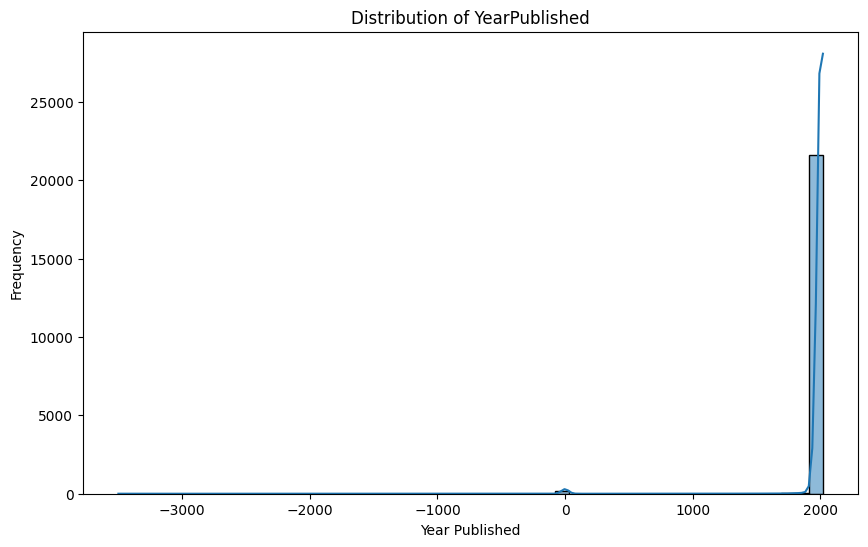

In [226]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearPublished'], bins=50, kde=True)
plt.title('Distribution of YearPublished')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
To visually inspect the distribution of 'MaxPlayers' and identify potential outliers, especially values significantly higher than the majority, we will create a box plot.



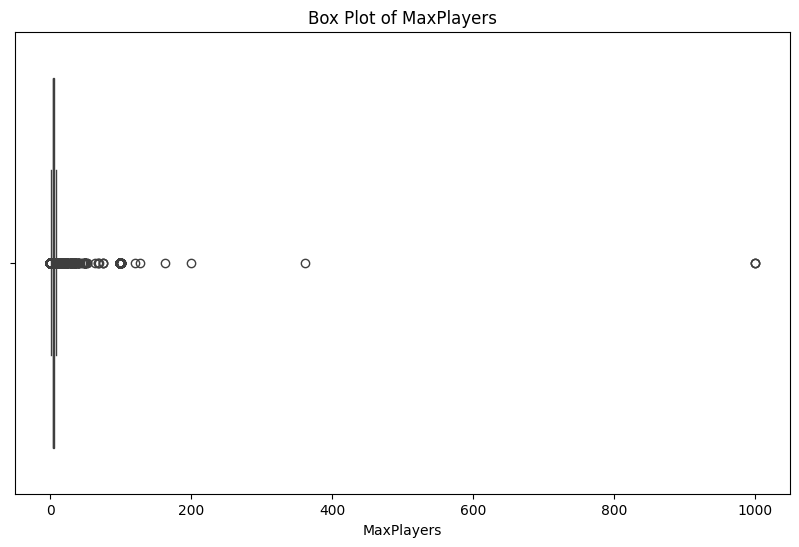

In [227]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MaxPlayers'])
plt.title('Box Plot of MaxPlayers')
plt.xlabel('MaxPlayers')
plt.show()

**Reasoning**:
To continue identifying numerical outliers, we will create individual box plots for 'GameWeight', 'ComWeight', 'ComAgeRec', and 'LanguageEase' to visualize their distributions and identify any outliers.



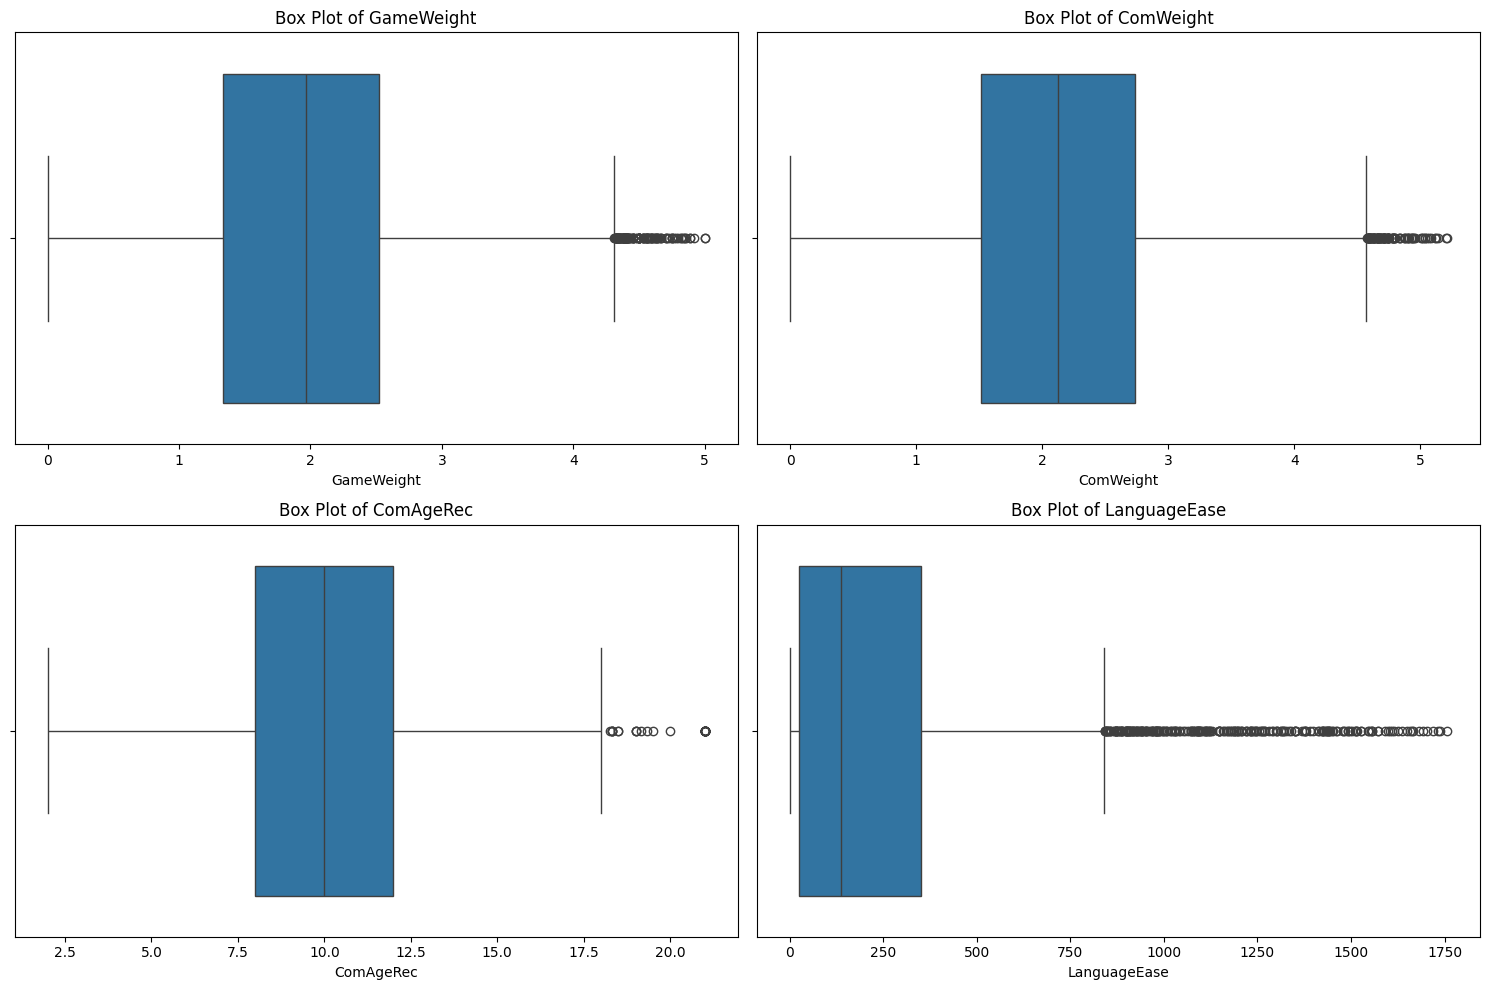

In [228]:
numerical_columns_for_boxplot = ['GameWeight', 'ComWeight', 'ComAgeRec', 'LanguageEase']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns_for_boxplot):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Observations on Numerical Outliers and Noise

Based on the descriptive statistics and visualizations, here are the observations for the numerical columns:

-   **YearPublished**:
    -   The descriptive statistics show a minimum value of **-3500**, which is clearly an erroneous entry as board games were not published in this era. Most games are published much later, as indicated by the 25th percentile at 2001.0. This extreme negative value is a significant outlier.
    -   The histogram visually confirms this outlier, showing a distribution heavily concentrated in recent centuries, with a distinct isolated bar far to the left representing the -3500 value.

-   **MaxPlayers**:
    -   The descriptive statistics indicate a maximum value of **999**. While some games can accommodate a large number of players, 999 is highly improbable for a standard board game and likely represents a placeholder or an error (e.g., 'no limit' or 'unspecified').
    -   The box plot for `MaxPlayers` shows a large number of outliers above the main distribution, culminating in the extreme value of 999. This suggests that while there might be games with higher player counts, 999 is an anomaly.

-   **GameWeight & ComWeight**:
    -   The box plots for `GameWeight` and `ComWeight` (game complexity) show relatively well-behaved distributions, mostly within the expected range of 1 to 5. There are some minor outliers at the higher end, but these appear to be reasonable variations rather than extreme errors.
    -   The minimum value for both is 0, which might be an indication of an unknown or unrated game weight. This could be considered a noise entry depending on the interpretation.

-   **ComAgeRec (Community Age Recommendation)**:
    -   The box plot for `ComAgeRec` shows some outliers, particularly on the higher end (above 18-20). While some games might be genuinely recommended for older players, these extreme values warrant a closer look. The minimum value is 2, which is a reasonable age for board games.

-   **LanguageEase**:
    -   The box plot for `LanguageEase` exhibits a significant number of outliers on the higher end. This suggests that while most games fall within a certain range of language dependency, there are games that are exceptionally language-dependent (or have unusually high values recorded in this field), which could be genuine or data entry errors.

## Identify Categorical Outliers and Noises

### Subtask:
Review object type columns such as 'Name', 'Description', 'Family', and 'ImagePath' for inconsistencies, typos, or unexpected entries that could be considered noise. Also, check the 'Rating' column for any unusual categories beyond 'Low', 'Medium', 'High'.


**Reasoning**:
To identify potential duplicates or frequently occurring names, which might indicate noise or inconsistencies, we will print the value counts for the 'Name' column.



In [229]:
print("Value counts for 'Name' column:")
print(df['Name'].value_counts())

Value counts for 'Name' column:
Name
Robin Hood                                      6
Chaos                                           4
Warhammer 40,000: Kill Team                     4
Cosmic Encounter                                4
Gettysburg                                      4
                                               ..
Red Dragon Rising: The Coming War With China    1
Imaginiff                                       1
Scene It? Comedy Movies                         1
The Bagged Peiper                               1
Guns of Galicia                                 1
Name: count, Length: 21521, dtype: int64


**Reasoning**:
To check for empty or very short entries in the 'Description' column and understand typical descriptions, we will first identify descriptions with lengths less than a certain threshold and print a sample of five random descriptions.



In [230]:
print("Descriptions with length less than 10 characters:")
print(df[df['Description'].str.len() < 10]['Description'].value_counts())

print("\nSample of 5 random descriptions:")
print(df['Description'].sample(5).tolist())

Descriptions with length less than 10 characters:
Series([], Name: count, dtype: int64)

Sample of 5 random descriptions:
['date march   vast majority austrians cheer anschluss country german reich central europe fall nazi hand good european scientist soon compete aegis heinrich himmler scheme wild improbable mdash team imagination courage drive successfully accomplish goalssecret weapon reich game player simulate arm race world war ii german perspective secret submarine basis greenland mysterious base   neuschwabenland antarctica game recreate incredible tale nazi technology famous v buzz bomb v rocket unlikely fly saucer derive work nikola tesla player able deliver haunebu project completion han kammler escape battalion fly saucer dark moon secret submarine fleet sail antarctica pursue war war german scientist produce atomic bomb drop new york electrogravitational fly saucer warhead futuristic intercontinental v possible build huge solar satellite gun strike americain game player con

**Reasoning**:
To investigate the 'Family' column for inconsistencies, variations, or generic entries, I will print its unique values and their counts.



In [231]:
print("Value counts for 'Family' column:")
print(df['Family'].value_counts())

Value counts for 'Family' column:
Family
18xx                              103
Monopoly (Official)                73
Trivial Pursuit                    67
Werewolf / Mafi                    58
Wallet Games (Button Shy)          45
                                 ... 
Wibbell++ game system               1
All-Pro (Ideal)                     1
Bloody Civil War (Paul Koenig)      1
Kingdom Death Monster               1
Epic Card                           1
Name: count, Length: 1456, dtype: int64


**Reasoning**:
To inspect the 'ImagePath' column for unusual patterns or generic placeholders, I will print the value counts for the top few entries and a small random sample to get an overview of the data.



In [232]:
print("Value counts for 'ImagePath' column (top 10):")
print(df['ImagePath'].value_counts().head(10))

print("\nSample of 5 random ImagePaths:")
df['ImagePath'].sample(5, random_state=42).tolist()

Value counts for 'ImagePath' column (top 10):
ImagePath
https://cf.geekdo-images.com/0NHi3tqHxg79C7LsUhH8eA__original/img/UbpDukOnBZg6fVt1EozX-9OH1UI=/0x0/filters:format(jpeg)/pic3721705.jpg    2
https://cf.geekdo-images.com/6vlkpViMExKmOvg0CoFXPQ__original/img/96tdeLmdw7kqByX2G8Iumao4W6g=/0x0/filters:format(png)/pic2262580.png     2
https://cf.geekdo-images.com/fmzoTvlqno7SJgGRncekeg__original/img/b-1r4NbeHNFs2OonjfjnJAi2ZtA=/0x0/filters:format(jpeg)/pic44833.jpg      2
https://cf.geekdo-images.com/bV7hJ7iiL0YpRRQ5nUbVqg__original/img/YxToTGe6kIqZpl7rvNpS0snmu-o=/0x0/filters:format(png)/pic2410035.png     2
https://cf.geekdo-images.com/MuF8IRcpfWDlFIZdjsqdlg__original/img/_sPbrbFKakQs-PDvvo5PKEgLYlU=/0x0/filters:format(png)/pic5232740.png     1
https://cf.geekdo-images.com/yZX7r2kWBLI4Rb0lx8td1g__original/img/TzeHamMVUengrNmNq3zWiv1uU-U=/0x0/filters:format(jpeg)/pic1487289.jpg    1
https://cf.geekdo-images.com/xupoX1qBKEe5Kxr3DTt6aA__original/img/pUwiqDZoOpcLG_ybfIDEBUKmR_c=/0x0/filte

['https://cf.geekdo-images.com/UrN-jW_-6e9O1ZSGJ5i2_Q__original/img/v3_0uocoLpNyr8Z3Q2nwFZxE6do=/0x0/filters:format(jpeg)/pic1703294.jpg',
 'https://cf.geekdo-images.com/h-xk1QSuKByGlhnIRIJ9Wg__original/img/fMouX5U44_bLJAoOUeadXDVcqYk=/0x0/filters:format(jpeg)/pic2913198.jpg',
 'https://cf.geekdo-images.com/EXOV0wvSJVn72uPNkoQrsw__original/img/F-PD-44hjelhmlq_3RC4YEBpTJU=/0x0/filters:format(jpeg)/pic27298.jpg',
 'https://cf.geekdo-images.com/AZ10uM4da-i5Iij9RkYl6Q__original/img/OY4TlIPyfGYKt8rNLzHrkieszz0=/0x0/filters:format(jpeg)/pic1129138.jpg',
 'https://cf.geekdo-images.com/4SAjwkE-ncAgPEVPiPaCZQ__original/img/r5CAX84nl8Henh_RdpQq83VkaSE=/0x0/filters:format(jpeg)/pic4126868.jpg']

**Reasoning**:
To ensure the 'Rating' column contains only the expected categories ('Low', 'Medium', 'High') and to identify any unexpected entries or inconsistencies, I will print its unique values and their counts.



In [233]:
print("Value counts for 'Rating' column:")
print(df['Rating'].value_counts())

Value counts for 'Rating' column:
Rating
Medium    9644
Low       7245
High      5036
Name: count, dtype: int64


### Summary of Observations and Potential Phenomena for Analysis

**Missing Values:**
-   **Description (0.00% missing):** Almost complete, no action needed for missing values.
-   **ComAgeRec (25.22% missing) & LanguageEase (26.87% missing):** Significant missing data. Imputation (mean/median) is a potential strategy, or investigate if missingness is systematic.
-   **Family (69.61% missing):** Very high missingness. Consider dropping the column if not crucial, or treat missing as a separate 'Unknown' category if it's important.
-   **ImagePath (0.08% missing):** Negligible missingness. Can drop rows or leave as is if the column is not central to analysis.

**Numerical Outliers and Noise:**
-   **YearPublished:** Extreme outlier at -3500. This needs to be handled (e.g., removed, or imputed to a reasonable default like 0 or NaN if its historical value is truly unknown, or filled with the mode of recent publications if the game is modern). The distribution is concentrated in recent decades.
-   **MaxPlayers:** Extreme outlier at 999. This likely represents an error or 'unlimited' designation. Values above a realistic player count (e.g., > 100 or a specific threshold) could be capped or treated as outliers.
-   **GameWeight & ComWeight:** Generally well-behaved with minor high-end outliers and some 0 values. The 0 values might indicate unrated games or noise. These could be imputed or investigated.
-   **ComAgeRec:** Some high-end outliers (above 18-20). These might be genuine for adult-themed games, but warrant a check for data entry errors.
-   **LanguageEase:** Significant high-end outliers. These could represent games with exceptionally high language dependency or data entry issues.

**Categorical Outliers and Noise:**
-   **Name:** Duplicates exist (e.g., 'Robin Hood' appears 6 times). This might indicate different editions/versions of the same game, or true duplicates that should be consolidated if the `BGGId` is not unique for these cases. Further investigation with `BGGId` is needed to determine if they are distinct entries or actual duplicates.
-   **Description:** No entries shorter than 10 characters, indicating reasonable quality for existing entries. The content seems varied and appropriate.
-   **Family:** Many unique categories, but also a large number of missing values (69.61%). Inconsistent spellings or variations might exist within the non-missing values, requiring standardization if this column is used for grouping.
-   **ImagePath:** Paths appear to be valid URLs. The presence of some duplicate paths might indicate generic images or placeholders for multiple entries, but given its typical use, it's unlikely to be a significant issue for numerical analysis.
-   **Rating:** Consistently 'Low', 'Medium', 'High', no unusual categories found.

**Potential Phenomena for Analysis:**
Based on the identified characteristics and potential cleaning steps, here are some phenomena that could be analyzed:

1.  **Impact of Game Complexity on Rating:** After handling outliers in `GameWeight` and `ComWeight`, analyze how these factors correlate with the 'Rating' categories (Low, Medium, High). For example, are more complex games rated higher or lower on average?
2.  **Trends in Game Publication:** After cleaning `YearPublished` (removing the -3500 outlier), investigate the growth of board game publications over time. Are there specific periods with bursts of game releases? How have `MinPlayers` and `MaxPlayers` evolved over decades?
3.  **Player Count Preferences and Game Design:** Analyze the distribution of `MinPlayers` and `MaxPlayers` (after addressing the 999 outlier) in relation to game characteristics and ratings. Are games with a certain player range more popular or higher-rated?
4.  **Age Recommendations and Language Dependency:** Once `ComAgeRec` and `LanguageEase` missing values are handled, explore relationships between recommended age and language ease with game types (e.g., `Cat:Childrens`, `Cat:Family`) and overall ratings.
5.  **Influence of 'Family' on Game Success:** If the 'Family' column can be sufficiently cleaned and imputed (or missing values treated as a distinct category), investigate whether belonging to a specific game family impacts popularity (`NumOwned`, `NumWant`) or rating. For instance, are games from established families generally more successful?
6.  **Crowdfunding (Kickstarted) Success Factors:** Analyze if `Kickstarted` games have different characteristics (e.g., complexity, age recommendation, player count) or higher success rates (`NumOwned`, `Rating`) compared to non-Kickstarted games. This could also involve looking at `YearPublished` trends for Kickstarter games.

## Final Task

### Subtask:
Summarize the identified missing values, outliers, and noisy data, along with a list of potential phenomena that can be further investigated using this dataset.


## Suggest Potential Phenomena for Analysis

### Subtask:
Based on the cleaned data, propose interesting phenomena that could be explored. Examples include: trends in game publication over time, the relationship between game complexity ('GameWeight', 'ComWeight') and user ratings, the impact of player count ('MinPlayers', 'MaxPlayers') on game popularity, or the distribution of games across different categories ('Cat:Thematic', 'Cat:Strategy', etc.) and their rankings.

#### Instructions
1. Review the previous observations regarding missing values, numerical outliers, and categorical noise in the dataset.
2. Formulate at least five distinct research questions or hypotheses that could be investigated using the dataset, considering the data cleaning and preprocessing steps identified.
3. Ensure that these phenomena leverage different aspects of the cleaned data, such as relationships between numerical features (e.g., complexity and rating), temporal trends (e.g., publication year trends), and categorical distributions (e.g., game categories and popularity).
4. Document these potential phenomena clearly, explaining why they are interesting and how the cleaned data can be used to explore them.

### Proposed Phenomena for Analysis

Here are five potential phenomena to explore using the cleaned dataset:

1.  **Trends in Game Publication and Characteristics Over Time (Leveraging 'YearPublished')**:
    *   **Phenomenon**: How has the landscape of board games changed over the years? We can analyze trends in the number of games published annually, the average `GameWeight` (complexity), average `ComMinPlaytime` and `ComMaxPlaytime`, and the prevalence of different `Cat:`egories or `Rank:`ings over time.
    *   **Why it's interesting**: This helps understand the evolution of the board game industry, popular design choices, and shifts in player preferences.
    *   **How cleaned data helps**: After correcting the `YearPublished` outlier (-3500), this column becomes reliable for time-series analysis. Aggregating data by year and plotting the average or sum of various metrics (e.g., `GameWeight`, count of specific categories, `NumUserRatings`) will reveal these trends.

2.  **Relationship Between Game Complexity and User Engagement/Rating (Leveraging 'GameWeight', 'ComWeight', 'Rating', 'NumUserRatings', 'NumOwned')**:
    *   **Phenomenon**: Do more complex games (higher `GameWeight` or `ComWeight`) tend to receive higher user ratings or gather a more dedicated following (`NumOwned`, `NumUserRatings`) compared to simpler games? Or is there an optimal complexity level that maximizes engagement?
    *   **Why it's interesting**: This explores player preferences regarding game depth versus accessibility and helps designers understand the impact of complexity on a game's reception.
    *   **How cleaned data helps**: With `GameWeight` and `ComWeight` having relatively clean distributions (after potentially handling the 0 values), and `Rating` as a categorical target, we can analyze the mean `GameWeight`/`ComWeight` for each `Rating` category (Low, Medium, High). We can also visualize the distribution of `NumUserRatings` and `NumOwned` across different `GameWeight`/`ComWeight` bins.

3.  **Impact of Player Count on Game Popularity and Rating (Leveraging 'MinPlayers', 'MaxPlayers', 'BestPlayers', 'GoodPlayers', 'NumOwned', 'Rating')**:
    *   **Phenomenon**: How do the minimum and maximum player counts (and especially the community-voted `BestPlayers` count) influence a game's overall popularity (`NumOwned`) and its rating?
    *   **Why it's interesting**: Understanding the ideal player counts preferred by the community can inform game design and marketing strategies.
    *   **How cleaned data helps**: After correcting the `MaxPlayers` outlier (999), these columns become suitable for analysis. We can group games by `MinPlayers`, `MaxPlayers` ranges, or `BestPlayers` and then compare average `Rating` and `NumOwned`. This can reveal if games designed for specific group sizes (e.g., 2 players vs. 4+ players) perform differently.

4.  **Distribution and Performance of Games Across Different Categories and Ranks (Leveraging 'Cat:...' and 'Rank:... columns)**:
    *   **Phenomenon**: Which game categories (`Cat:Thematic`, `Cat:Strategy`, etc.) are most prevalent, and how do games within these categories perform in terms of rankings and user ratings? Are there categories that consistently produce highly-ranked games?
    *   **Why it's interesting**: This provides insights into dominant genres and successful game design patterns within those genres.
    *   **How cleaned data helps**: The binary `Cat:` columns directly indicate category membership. We can count the number of games in each category, calculate the average `Rank:strategygames` (or other relevant ranks) and `Rating` for games belonging to each category. This allows for comparative analysis of categories.

5.  **Influence of Kickstarter Funding on Game Attributes and Success (Leveraging 'Kickstarted', 'YearPublished', 'NumOwned', 'Rating', 'GameWeight')**:
    *   **Phenomenon**: Do games that were `Kickstarted` (crowdfunded) differ significantly from non-Kickstarted games in terms of publication year trends, game complexity (`GameWeight`), overall user rating, or popularity (`NumOwned`)?
    *   **Why it's interesting**: This can reveal the role of crowdfunding in game development and its potential impact on game characteristics and market reception.
    *   **How cleaned data helps**: The `Kickstarted` (binary) column allows for direct comparison between two groups. We can compare the distribution of `YearPublished`, average `GameWeight`, `Rating` distribution, and mean `NumOwned` for `Kickstarted=1` versus `Kickstarted=0` games. This can highlight any distinct profiles for crowdfunded projects.

## Summary:

### Q&A

1.  **What missing values were identified, and what is their extent?**
    *   `Description`: 0.00% missing
    *   `ComAgeRec`: 25.22% missing
    *   `LanguageEase`: 26.87% missing
    *   `Family`: 69.61% missing
    *   `ImagePath`: 0.08% missing

2.  **What numerical outliers were found in the specified columns?**
    *   `YearPublished`: An extreme outlier of -3500.
    *   `MaxPlayers`: An extreme outlier of 999.
    *   `GameWeight` & `ComWeight`: Minimum value of 0, suggesting unrated or unknown weights, and some minor high-end outliers.
    *   `ComAgeRec`: High-end outliers (above 18-20).
    *   `LanguageEase`: Significant number of high-end outliers.

3.  **What categorical outliers or noise were detected in the specified columns?**
    *   `Name`: Duplicate entries were observed (e.g., "Robin Hood" appearing 6 times), potentially indicating different editions or true data duplicates.
    *   `Description`: No entries shorter than 10 characters, indicating reasonable content quality.
    *   `Family`: Many unique categories but a high percentage of missing values; potential for inconsistent spellings.
    *   `ImagePath`: Paths appear to be valid URLs, with some duplicates but no obvious noise.
    *   `Rating`: Consistent categories ('Low', 'Medium', 'High') with no unusual entries.

4.  **What potential phenomena can be further investigated using this dataset?**
    *   Trends in game publication and characteristics over time using `YearPublished`.
    *   Relationship between game complexity (`GameWeight`, `ComWeight`) and user engagement/rating (`Rating`, `NumUserRatings`, `NumOwned`).
    *   Impact of player count (`MinPlayers`, `MaxPlayers`, `BestPlayers`) on game popularity and rating.
    *   Distribution and performance of games across different categories (`Cat:...`) and ranks (`Rank:...`).
    *   Influence of Kickstarter funding on game attributes and success (`Kickstarted`, `YearPublished`, `NumOwned`, `Rating`, `GameWeight`).

### Data Analysis Key Findings

*   **Significant Missing Data**: The `Family` column has a very high proportion of missing values (69.61%), making it potentially challenging to use directly without extensive imputation or re-evaluation of its relevance. `ComAgeRec` (25.22%) and `LanguageEase` (26.87%) also have substantial missing data.
*   **Clear Numerical Errors**: An erroneous `YearPublished` value of -3500 and an improbable `MaxPlayers` value of 999 were identified, indicating data entry errors or placeholders that require cleaning.
*   **High-End Outliers in Subjective Metrics**: `ComAgeRec` and `LanguageEase` show significant high-end outliers, which could represent genuinely extreme values (e.g., very complex games for adults, highly language-dependent games) or data entry anomalies requiring further investigation.
*   **Duplicate Game Names**: The presence of duplicate game names in the `Name` column (e.g., "Robin Hood" appearing 6 times) suggests the need to differentiate between distinct editions/versions or actual duplicate records, potentially by leveraging `BGGId`.
*   **Consistent Rating Categories**: The `Rating` column is clean and consistent, containing only the expected 'Low', 'Medium', and 'High' categories, which is valuable for direct analysis.

### Insights or Next Steps

*   Prioritize data cleaning by addressing the clear numerical errors in `YearPublished` and `MaxPlayers` through removal or imputation, and strategize the handling of significant missing values in `Family`, `ComAgeRec`, and `LanguageEase` based on their potential impact on specific analyses.
*   Proceed with investigating the proposed phenomena, starting with those less impacted by complex imputation (e.g., `Rating` consistency, `YearPublished` trends after outlier removal) and gradually incorporating analyses that rely on cleaned or imputed values for `ComAgeRec`, `LanguageEase`, and `Family`.


## Handle YearPublished Outliers

### Subtask:
Handle the extreme outlier of -3500 in 'YearPublished'. This might involve replacing it with a more appropriate value such as '0' that other games and not removing these outlliers because 'YearPublished' is a significant attribute for the analysis.

**Reasoning**:
In the BoardGameGeek dataset, the 'YearPublished' attribute represents the editorial publication year of a game rather than its historical origin. Some games, particularly traditional or ancient ones, exhibit values that are not definable or that precede the modern publishing era; such values were mapped to 0 to indicate the absence of temporal information.

In order to avoid distortions in the distance metrics used for clustering, values equal to 0 were not interpreted as actual years but were treated as missing data. No numerical imputation of the year was performed, as this would have introduced arbitrary and semantically unjustified information.

Instead, the information related to the antiquity of the game was explicitly modeled through a binary variable that distinguishes traditional or historical games from those belonging to the modern editorial market. For games with a known publication year, temporal information was represented using qualitative categories (publication eras), thereby avoiding the direct use of the year as a continuous variable.

This approach preserves the semantic coherence of the data, improves the interpretability of the resulting clusters, and ensures the compatibility of the preprocessing pipeline with subsequent statistical and descriptive analyses.

In [234]:
# Games with yearPlublished lower than 0
df[df["YearPublished"] < 0]

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
806,5432,Chutes and Ladders,traditional game ancient india bring uk comm...,-200,1.0195,1.1979,2,6,3.357143,16.000000,...,879,0,0,0,0,0,0,0,1,Low
1173,2399,Senet,senet ancient egyptian board game similar back...,-3500,1.4769,1.6256,2,2,6.833333,131.142857,...,21926,0,0,0,0,0,1,0,0,Low
2045,21488,Petteia,roughly translate robber abstract battle game ...,-100,2.1667,2.3960,2,2,7.000000,381.000000,...,21926,0,0,0,0,0,1,0,0,Low
4362,19915,Three Men's Morris,ancient game probably direct ancestor well kno...,-1400,1.2500,1.4790,2,2,NaN,41.000000,...,21926,0,0,0,0,0,1,0,0,Low
9492,11901,Tic-Tac-Toe,old game player attempt place marker usually x...,-1300,1.1697,1.3327,2,2,4.181818,46.034483,...,880,0,0,0,0,0,1,0,1,Low
14126,3886,Nine Men's Morris,men morris old game play thousand year world ...,-1400,1.8279,2.0808,2,2,6.687500,1.000000,...,21926,0,0,0,0,0,1,0,0,Low
16155,5546,Marbles,marble play ancient egyptian small ball clay r...,-3000,1.1020,1.2219,1,0,4.500000,1.000000,...,821,0,0,0,0,0,0,0,1,Low
18254,11726,Knucklebones,backgroundthis game forerunner quotdicequot ga...,-3000,0.0000,0.0000,2,2,NaN,NaN,...,21926,0,0,0,0,0,0,0,0,Low
20577,188,Go,appearance player take turn lay stone time sma...,-2200,3.9420,4.0886,2,2,6.605042,36.021053,...,21926,0,0,0,0,0,1,0,0,High
21325,2397,Backgammon,backgammon classic abstract strategy game date...,-3000,2.0182,2.1523,2,2,7.956522,16.000000,...,21926,0,0,0,0,0,1,0,0,Medium


**Reasoning**: We identify that between the 11 records with a 'YearPublished' value lower than 0, two ('Knucklebones' and 'Three Men's Morris') present 'NaN' values for the attributes 'ComAgeRec' and 'LanguageEase', one ('Marbles') present a lower value for 'MaxPlayers' than 'MinPlayers' (and that's impossible).

In [235]:
# Identify all unique negative years
negative_years = df[df['YearPublished'] < 0]['YearPublished'].unique()

if len(negative_years) > 0:
    # Replace all identified negative years with NaN in a single operation
    df['YearPublished'] = df['YearPublished'].replace(negative_years, 0)
    print(f"Replaced all negative years ({', '.join(map(str, negative_years))}) in 'YearPublished' with 0")
else:
    print("No negative years found in 'YearPublished' to replace.")

print("\nDescriptive statistics for 'YearPublished' after removing all negative outliers:")
print(df['YearPublished'].describe())

Replaced all negative years (-200, -3500, -100, -1400, -1300, -3000, -2200, -2600) in 'YearPublished' with 0

Descriptive statistics for 'YearPublished' after removing all negative outliers:
count    21925.000000
mean      1986.484652
std        196.574294
min          0.000000
25%       2001.000000
50%       2011.000000
75%       2017.000000
max       2021.000000
Name: YearPublished, dtype: float64


**Reasoning**:
To verify that the extreme outlier in 'YearPublished' has been successfully replaced with 0, we will now display the descriptive statistics for this column. This will show the new minimum value and confirm the change.

Now we can verify that also the negative outliers in 'YearPublished' have been transformed in 0 values.

In [236]:
# Games with YearPlublished equal to 0
df[df["YearPublished"] == 0]

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
61,29351,Durak,durak known popular card game russia ukraine d...,0,1.5263,1.8234,2,6,8.000000,1.000000,...,21926,0,0,0,0,0,0,1,0,Medium
181,19257,Le Truc,le truc th century card game france spain sid ...,0,1.7500,1.8967,2,4,NaN,36.000000,...,21926,0,0,0,0,0,0,0,0,Medium
392,41955,Eurooppa Tietopeli,classic trivium game question answer europe ...,0,2.0000,2.1967,2,6,8.000000,515.000000,...,21926,0,0,0,0,0,0,0,0,Low
751,42499,1000,classic card game player try earn point seri...,0,1.8000,2.0835,2,4,8.000000,NaN,...,21926,0,0,0,0,0,0,0,0,Medium
806,5432,Chutes and Ladders,traditional game ancient india bring uk comm...,0,1.0195,1.1979,2,6,3.357143,16.000000,...,879,0,0,0,0,0,0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21518,11581,King,king relative barbu trick take standard deck p...,0,2.0000,2.2389,4,4,10.000000,NaN,...,21926,0,0,0,0,0,0,0,0,Medium
21555,210292,Moonstone,moonstone whimsical fantasy skirmish game play...,0,2.0000,2.1836,2,4,12.000000,164.000000,...,21926,0,0,0,0,0,0,0,0,High
21623,1602,The Royal Game of Ur,game publish different name simple race game l...,0,1.3000,1.5190,2,2,7.750000,141.000000,...,21926,0,0,0,0,0,1,0,0,Low
21652,156878,tummple!,wooden stackingandbuilde game tummple player t...,0,1.0000,1.1706,2,10,8.000000,501.000000,...,21926,0,0,0,0,0,0,0,0,Medium


Then we can show the plot distribution of 'YearPublished' values after the outlier correction

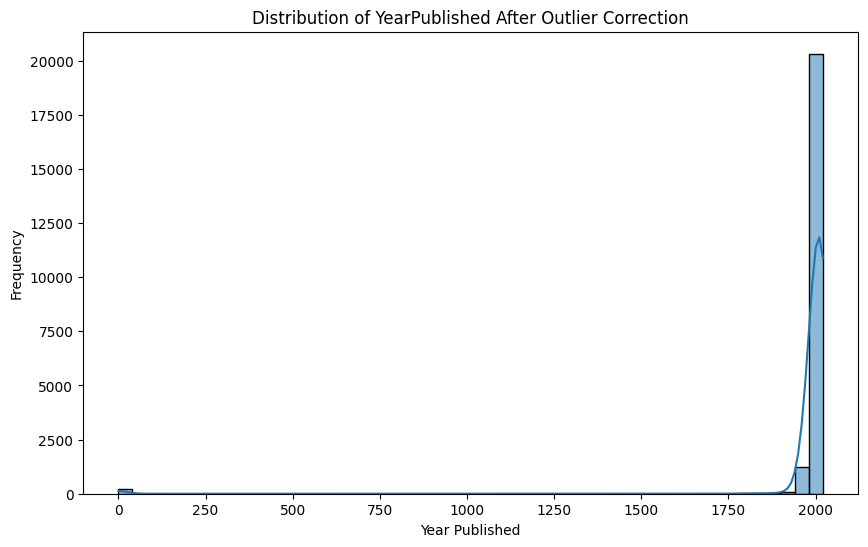

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearPublished'].dropna(), bins=50, kde=True)
plt.title('Distribution of YearPublished After Outlier Correction')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()

In [238]:
# Tae games with 'YearPublished' == 0 and replace with 'NaN
df['YearPublished'] = df['YearPublished'].replace(0, np.nan)

In [239]:
# Categorize games based on publication era
# Traditional games of year published unknown (NaN) o  == 0
# Yes = 1 No = 0
df['Is_traditional_game'] = df['YearPublished'].isna().astype(int)
df[df['Is_traditional_game'] == 1]

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Is_traditional_game
61,29351,Durak,durak known popular card game russia ukraine d...,NaN,1.5263,1.8234,2,6,8.000000,1.000000,...,0,0,0,0,0,0,1,0,Medium,1
181,19257,Le Truc,le truc th century card game france spain sid ...,NaN,1.7500,1.8967,2,4,NaN,36.000000,...,0,0,0,0,0,0,0,0,Medium,1
392,41955,Eurooppa Tietopeli,classic trivium game question answer europe ...,NaN,2.0000,2.1967,2,6,8.000000,515.000000,...,0,0,0,0,0,0,0,0,Low,1
751,42499,1000,classic card game player try earn point seri...,NaN,1.8000,2.0835,2,4,8.000000,NaN,...,0,0,0,0,0,0,0,0,Medium,1
806,5432,Chutes and Ladders,traditional game ancient india bring uk comm...,NaN,1.0195,1.1979,2,6,3.357143,16.000000,...,0,0,0,0,0,0,0,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21518,11581,King,king relative barbu trick take standard deck p...,NaN,2.0000,2.2389,4,4,10.000000,NaN,...,0,0,0,0,0,0,0,0,Medium,1
21555,210292,Moonstone,moonstone whimsical fantasy skirmish game play...,NaN,2.0000,2.1836,2,4,12.000000,164.000000,...,0,0,0,0,0,0,0,0,High,1
21623,1602,The Royal Game of Ur,game publish different name simple race game l...,NaN,1.3000,1.5190,2,2,7.750000,141.000000,...,0,0,0,0,0,1,0,0,Low,1
21652,156878,tummple!,wooden stackingandbuilde game tummple player t...,NaN,1.0000,1.1706,2,10,8.000000,501.000000,...,0,0,0,0,0,0,0,0,Medium,1


In [240]:
# Define function to categorize publication era

def publication_era(year):
    if pd.isna(year):
        return 'ancient'
    elif year < 1950:
        return 'classic'
    elif year < 1990:
        return 'modern_early'
    else:
        return 'modern'

df['Publication_era'] = df['YearPublished'].apply(publication_era)

In [241]:
df[df['Publication_era']=='classic']

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Is_traditional_game,Publication_era
47,6819,Skat,traditional german card game player play stand...,1810.0,3.0561,3.1608,3,3,9.666667,6.000000,...,1,0,0,0,0,0,0,Medium,0,classic
209,17568,Magic Robot Quiz Game,market board game magic robot quiz game probab...,1935.0,1.0000,1.2950,1,0,NaN,NaN,...,0,0,0,0,0,0,1,Low,0,classic
262,1644,Tipp-Kick,player soccer game metal miniature player ...,1921.0,1.2340,1.4225,2,2,7.166667,6.000000,...,0,0,1,0,0,0,0,Medium,0,classic
488,1917,Stratego,boxthe gameboard battlefield army man dispos...,1946.0,1.8486,2.0670,2,2,7.597222,31.045455,...,0,0,1,0,1,0,0,Low,0,classic
530,152359,Machiavelli,main action player decide playplay valid combi...,1940.0,1.7143,1.8975,2,6,6.000000,171.000000,...,0,0,0,0,0,0,0,Medium,0,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21554,18536,Nok-Hockey,action game play special table knock puck goal...,1942.0,1.0000,1.1597,2,2,4.000000,441.000000,...,0,0,0,0,0,0,0,Medium,0,classic
21704,2086,Elfer raus!,player attempt hand play starting card grid pa...,1925.0,1.0909,1.1927,2,6,6.285714,41.000000,...,0,0,1,0,0,0,0,Low,0,classic
21707,20240,Écarté,quick trick take game base triomphe french ruf...,1825.0,2.1250,2.2253,2,2,12.000000,NaN,...,0,0,0,0,0,0,0,Medium,0,classic
21802,18011,Chaturanga,publish game magazine januaryfebruary issue ...,550.0,2.2500,2.3746,2,4,NaN,126.000000,...,0,0,0,0,1,0,0,Low,0,classic


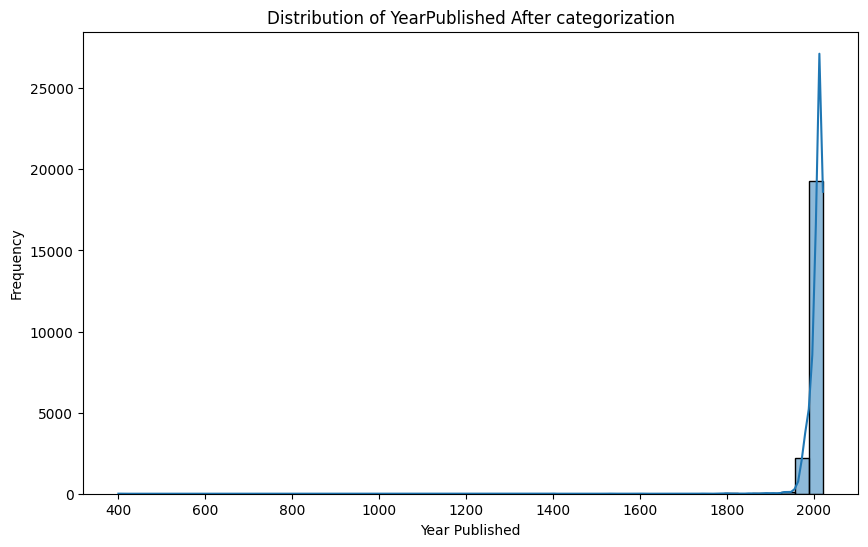

In [242]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearPublished'].dropna(), bins=50, kde=True)
plt.title('Distribution of YearPublished After categorization')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()

## Handle missing values 'ComAgeRec'

The missing values analysis for the attribute **'ComAgeRec'**  concern 5530 games (a quarter of the total) that generally games that have not a recommended age are accessible to everyone.

So is a good compromise to aplly on these games the column median value to preserve data coherence.

Consider that only 41 games have a recommended age higher that 18 y.o. Between 17 and 18 both included we have 108 games. Between 16 included and 17 we have 938 games. Between 15 included and 16 we have 339 games. Between 14 included and 15 we have 1086 games.
13 incl.-14: 659 g.

12 incl.-13: 2124 g.

11 incl.-12: 1078 g.

10 incl.-11: 2413 g.

9 incl.-10: 1154 g.

8 incl.-9: 2869 g. (1007 g. has the same MfgAgeRec)

2 incl.-8: 3586 g. (343 g. has the same MfgAgeRec)
There are no games with recommended age lower than 2.

In the end, considering that 'MfgAgeRec' attribute has no missing values, a possibility is to assign the corresponding 'MfgAgeRec' value to the 'ComAgeRec' missing ones. But for games that have zero values for 'MfgAgeRec', there's the chance to drop them but in alternative we can apply the median value of the 'ComAgeRec' column.

There are then cases of games without playtime (zero values for 'MfgAgeRec').

As examples we analized a few games:

- Gùgōng: Deluxe Big Box
- Treasures of Cibola
- Le Grand Empire

https://share.google/aimode/JFGKfBqCbHxx9QzRy

In [243]:
# number of rows with ComAgeRec missing
number = len(df[df['ComAgeRec'].isnull()])
print(f"Numero di righe con ComAgeRec mancante: {number}")
df[df['ComAgeRec'].isnull()]

Numero di righe con ComAgeRec mancante: 5530


,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Is_traditional_game,Publication_era
2,319196,Gùgōng: Deluxe Big Box,big box contain component gugravegng deluxe ed...,2020.0,3.6667,3.8190,1,5,NaN,NaN,...,0,0,0,0,0,0,0,High,0,modern
4,281020,Treasures of Cibola,rescue mayan treasure easy task ...,2019.0,1.5000,1.6230,2,4,NaN,7.0,...,0,0,0,0,0,0,0,Medium,0,modern
6,25841,Le Grand Empire,le grand empire simulate napoleonic war st...,2007.0,3.7000,3.8964,2,7,NaN,388.0,...,0,1,0,0,0,0,0,High,0,modern
7,89620,Monopoly: Canada (Electronic Banking),modern canadian edition classic real estate ga...,2009.0,1.0000,1.2785,2,6,NaN,NaN,...,0,0,0,0,0,0,0,Low,0,modern
9,130185,Speedy Recall,box shuffle card ready shuffle head quick s mo...,2012.0,1.0000,1.1469,2,6,NaN,NaN,...,0,0,0,0,0,0,0,Medium,0,modern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,149459,Assaultous,assaultous twoplayer strategy game role comman...,2013.0,2.3333,2.5379,2,2,NaN,NaN,...,0,0,0,0,0,0,0,High,0,modern
21891,300217,Merchants of the Dark Road,half year daylight prepare dark season road tr...,2021.0,2.9333,3.1553,1,4,NaN,188.0,...,1,0,0,0,0,0,0,High,0,modern
21900,181031,Sweet Spot,court trusty racket battle intense tennis game...,2017.0,1.5000,1.6821,1,4,NaN,NaN,...,1,0,0,0,0,0,0,Medium,0,modern
21906,159877,Hat-Trick,expand hattrick player expansion hattrick...,2014.0,2.7273,3.0250,2,2,NaN,636.0,...,0,0,0,0,0,0,0,Medium,0,modern


### The strategy
is replacing the missing values with the manufacturer recomended age (MfgAgeRec) or median of the community recommended age (ComAgeRec)

In [244]:
# Calculate the 'ComAgeRec' column median
median_com_age_rec = df['ComAgeRec'].median()
# Conditional imputation row by row
df['ComAgeRec'] = df.apply(
    lambda row: row['MfgAgeRec'] if pd.isna(row['ComAgeRec']) and not pd.isna(row['MfgAgeRec'])
    else (median_com_age_rec if pd.isna(row['ComAgeRec']) or (row['ComAgeRec'] == 0) else row['ComAgeRec']),
    axis=1
)
# Verifying missing values
print(f"Miss mancanti nella colonna 'ComAgeRec' dopo l'imputazione: {df['ComAgeRec'].isnull().sum()}")

Miss mancanti nella colonna 'ComAgeRec' dopo l'imputazione: 0


## Handle Outliers in ComAgeRec

### Strategy

In view of the subsequent clustering and classification analyses, a semantic recoding strategy was applied to the ComAgeRec attribute by grouping it into ordinal age classes. This approach reduces the impact of extreme values on distance-based algorithms, improving model stability while preserving the interpretative meaning of the variable.

Outlier management was therefore carried out through a targeted transformation of the variable rather than through data removal, ensuring a methodologically sound approach consistent with the analytical objectives of the study.

In [245]:
print("Values in 'ComAgeRec' greater than 18:")
print(df[df['ComAgeRec'] > 18]['ComAgeRec'].value_counts().sort_index())

Values in 'ComAgeRec' greater than 18:
ComAgeRec
18.250000     1
18.333333     4
18.500000     2
19.000000     3
19.166667     1
19.333333     1
19.500000     1
20.000000     1
21.000000    32
Name: count, dtype: int64


In [246]:
# classification based on ComAgeRec
def com_age_rec_class(age):
    if age <= 6:
        return 0   # Children
    elif age <= 10:
        return 1   # Family / Casual
    elif age <= 14:
        return 2   # Strategy
    else:
        return 3   # 15+ / Adult / Hardcore

df['ComAgeRec_class'] = df['ComAgeRec'].apply(com_age_rec_class)

In [247]:
# class of children's games
print('Children games class')
df[df['ComAgeRec_class']== 0][['Name','ComAgeRec','YearPublished']]

Children games class


,Name,ComAgeRec,YearPublished
6,Le Grand Empire,0.000000,2007.0
9,Speedy Recall,6.000000,2012.0
14,Break the Safe,5.555556,2003.0
17,The Legend of Zelda,6.000000,1988.0
18,Frogger,4.000000,1981.0
...,...,...,...
21886,Giggle Wiggle,3.333333,1991.0
21887,Le Boomb!,4.500000,2009.0
21910,Creepy Freaks,5.000000,2003.0
21917,Sequence for Kids,4.200000,2001.0


## Handle MfgPlaytime Zero Values
We observed a small number of games (5) that, more than having missing values for 'ComAgeRec' zero values for 'MfgAgeRec', have zero values for 'MfgPlayTime', for 'MinPlaytime', for 'MaxPlayTime', for both 'ComWeight and for 'LanguageEase'.

Considering all these penalties for whom these games are not eligible for further analysis, we evaluated to drop them.

In [248]:
righe = df[(df['ComAgeRec'].isnull()) & (df['MfgAgeRec'] == 0) & (df['MfgPlaytime'] == 0) & (df['ComMinPlaytime'] == 0) & (df['ComMaxPlaytime'] == 0) & (df['GameWeight'] == 0) & (df['ComWeight'] == 0) & (df['LanguageEase'].isnull())][['Name', 'ComAgeRec', 'MfgAgeRec', 'GameWeight','ComWeight', 'MfgPlaytime', 'LanguageEase']]
print(f"Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: {len(righe)}")
righe


Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: 0


,Name,ComAgeRec,MfgAgeRec,GameWeight,ComWeight,MfgPlaytime,LanguageEase


In [249]:
# drop of critical games
df = df.drop(righe.index)

In [250]:
righe = df[(df['ComAgeRec'].isnull()) & (df['MfgAgeRec'] == 0) & (df['MfgPlaytime'] == 0) & (df['ComMinPlaytime'] == 0) & (df['ComMaxPlaytime'] == 0) & (df['GameWeight'] == 0) & (df['ComWeight'] == 0) & (df['LanguageEase'].isnull())][['Name', 'ComAgeRec', 'MfgAgeRec', 'GameWeight','ComWeight', 'MfgPlaytime', 'LanguageEase']]
print(f"Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: {len(righe)}")
righe

Number of games with missing 'ComAgeRec' and 'MfgAgeRec' equal to 0, 'MfgPlaytime' equal to 0, both 'ComMinPlaytime' and 'ComMaxPlaytime' equal to 0, and both 'GameWeight' and 'ComWeight' equal to 0 and 'LanguageEase' is null: 0


,Name,ComAgeRec,MfgAgeRec,GameWeight,ComWeight,MfgPlaytime,LanguageEase


## Handle Family Missing Values

Firstly we check how many games present same values for their names ('Name') and their belonging family ('Family')

In [251]:
name_as_fam = len(df[df['Name']==df['Family']])
print(f"Number of rows with Name same as Family: {name_as_fam}")
numero2 = ((df['Name'] != df['Family']) & df['Family'].notnull()).sum()
print(f"Numero di righe con Name diverso da Family: {numero2}")
numero3 = (df['Name'].notna() & df['Name'].str.strip().ne('') & df['Family'].isna()).sum()
print(f"numero di righe con Family mancante: {numero3}")
df[df['Name']==df['Family']]

Number of rows with Name same as Family: 342
Numero di righe con Name diverso da Family: 6321
numero di righe con Family mancante: 15262


,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Is_traditional_game,Publication_era,ComAgeRec_class
8,8983,I.Q. 2000,children trivium game player outward solar sys...,1984.0,1.6667,1.9372,2,6,8.000000,19.666667,...,0,0,0,0,0,0,Low,0,modern_early,1
81,47055,High Frontier,near future nanofacture technique allow incred...,2010.0,4.3319,4.5688,2,5,14.090909,32.450000,...,0,0,0,0,0,0,High,0,modern,3
95,54998,Cyclades,late collaboration bruno cathala ludovic maubl...,2009.0,2.8176,3.0428,2,5,11.287671,21.133333,...,0,0,0,0,0,0,High,0,modern,2
122,232405,Western Legends,historic character american wild west face wri...,2018.0,2.8000,2.9178,2,6,10.666667,3.312500,...,0,0,0,0,0,0,High,0,modern,2
146,314243,"Warhammer 40,000 (Ninth Edition)",publisherrsquo websitethere time peace forgive...,2020.0,3.8571,4.0246,2,6,12.000000,NaN,...,1,0,0,0,0,0,High,0,modern,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,5749,Simon,simon large round electronic box player press ...,1978.0,1.2535,1.5497,1,4,4.285714,31.000000,...,0,0,0,0,0,1,Low,0,modern_early,0
21733,20437,Lords of Vegas,opponent represent powerful developer burgeon ...,2010.0,2.3556,2.4787,2,4,11.142857,11.125000,...,0,0,0,0,0,0,High,0,modern,2
21751,163,Balderdash,clever repackaging parlor game dictionary bald...,1984.0,1.4139,1.6276,2,6,11.894737,14.944444,...,0,0,0,0,1,0,Medium,0,modern_early,2
21759,161578,[redacted],redact game spycraft intrigue betrayal bluffin...,2014.0,2.9250,3.0484,2,6,10.800000,196.000000,...,0,0,0,0,0,0,Medium,0,modern,2


### Logic
Considering that a considerable part of games present same values for the attribute 'Name' and 'Family' (the game's family correspond to its name) we can consider the possibility to replace the 'Family' missing values with the corresponding 'Name' value

In [252]:
print("Replacing 'Family' missing values with corresponding 'Name' values")
df['Family'] = df['Family'].fillna(df['Name'].where(df['Family'].isnull()))
df

Replacing 'Family' missing values with corresponding 'Name' values


,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Is_traditional_game,Publication_era,ComAgeRec_class
0,140386,Assassin's Creed: Arena,game description publisherin assassins creed a...,2014.0,1.8333,2.0512,2,4,8.0,213.0,...,0,0,0,0,0,0,Low,0,modern,1
1,344114,Bag of Chips,bag chip party game face crucial choice score ...,2021.0,1.0000,1.2256,2,5,8.0,36.0,...,0,0,0,0,0,0,Medium,0,modern,1
2,319196,Gùgōng: Deluxe Big Box,big box contain component gugravegng deluxe ed...,2020.0,3.6667,3.8190,1,5,12.0,NaN,...,0,0,0,0,0,0,High,0,modern,2
3,11404,LetterFlip,publisherthe reveal game secret wordsletterfli...,2004.0,1.3077,1.4216,2,2,7.0,NaN,...,0,0,0,0,0,0,Low,0,modern,1
4,281020,Treasures of Cibola,rescue mayan treasure easy task ...,2019.0,1.5000,1.6230,2,4,8.0,7.0,...,0,0,0,0,0,0,Medium,0,modern,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21920,3233,Ballast,variation game quotpick sticksquot wooden cyli...,1998.0,1.0000,1.2096,2,4,8.0,11.0,...,0,0,0,0,0,0,Low,0,modern,1
21921,13359,Leapfrog,leapfrog fun family game simple young gamer pl...,2004.0,1.5000,1.7219,1,6,6.0,361.0,...,0,0,0,0,0,0,Medium,0,modern,0
21922,3295,Athos,monk climb athos mountain reach monastery move...,1993.0,1.6667,1.7946,2,4,11.0,431.0,...,0,0,0,0,0,0,Low,0,modern,2
21923,176524,Hoplomachus: Origins,hoplomachu origin take story begin small battl...,2015.0,3.0370,3.2921,1,2,13.8,322.0,...,0,0,0,0,0,0,High,0,modern,2


In [253]:
# Verifying the number of rows with 'Family' missing after the imputation

number = len(df[df['Family'].isnull()])
print(f"Number of rows with 'Family' missing after the imputation: {number}")

Number of rows with 'Family' missing after the imputation: 0


## Handle MinPlayers and MaxPlayers Outliers

### Strong adjustment for `MinPlayers == 0` e `MaxPlayers < MinPlayers`

Goal:
- Ensure that `MinPlayers` assume a reasonable value (not 0 that's impossible) and that `MaxPlayers >= MinPlayers`.
- Trace all the audit changes through dedicated columns.

Strategy (roadmap):
1. Adjust `MinPlayers == 0` using `BestPlayers` when is a valid value, then take the `Family` median, otherwise impute 1.
2. Adjust `MaxPlayers` when is a missing value or < `MinPlayers`: try to transform with `BestPlayers` value, than take the median or the median span (Max-Min) per `MinPlayers`, at the end we could apply a global fallback `MinPlayers + global_span_median`.
3. Register the adjustment sources in the audit columns to consent further check processes.

This logic avoid not-informative imputations (i.e median = 0) and use semantic informations when available.

### MinPlayer Management > MaxPlayers

Attribute **BestPlayers**

It is the optimal number of players according to the community, the natural upper limit: a game cannot have MaxPlayers < BestPlayers
Much more consistent than the general average
- The **logic**:

- Use **BestPlayers** when **> 0 and >= MinPlayers**.
- Otherwise try MaxPlayers' median for Family (if available and not 'Unknown').
If a game has MaxPlayers < MinPlayers (problem) and belongs to a specific Family category, then: I look at all other games in the same category (e.g. Family = 'Monopoly')
We have calculated the median of their valid MaxPlayers (e.g. median = 6) and used that median as the imputed value for the problem game
Finally fallback to MinPlayers (ensures consistency).
Than we added a MaxPlayers_imputed flag column to track imputations.


- Game A: Family='Strategy', MinPlayers=2, MaxPlayers=1 ❌ PROBLEM (1 < 2)
- Game B: Family='Strategy', MinPlayers=2, MaxPlayers=4 OK
- Game C: Family='Strategy', MinPlayers=1, MaxPlayers=8 OK
- Game D: Family='Strategy', MinPlayers=4, MaxPlayers=6 OK

Median of [4, 8, 6] = 6
**Game A: MaxPlayers = 6**


To deal with these issues it was defined a cleaning and imputation procedure that not only corrected the incorrect values, but that made the process transparent, reproducible and methodologically justifiable. To this end, the 'MinPlayers' and 'MaxPlayers' original values have been preserved in separate columns, to allow a direct comparison with the correct values and keep track of the changes made.

The adopted strategy is based on a hierarchical approach, in which imputations are carried out by privileging, where possible, more specific and semantically significant information sources, and then progressively resorting to more general statistical estimates. Furthermore, to reduce the influence of outliers, it was chosen to use the median as a measure of central tendency, considered more robust than the mean in the presence of skewed distributions.

For the attribute 'MinPlayers', missing or equal to zero values were considered semantically invalid. When available it was adopted the corresponding 'BestPlayers' value, which represent the optimal number of players for the game and thus constitutes a reliable information source. In cases there was not such information, the median of 'MinPlayers' values within the same game family was used, thus exploiting the semantic structure of the dataset. Only in the absence of both of this informations was a fallback value of 1 adopted, which represents the semantically acceptable minimum.

A similar, but more complex, procedure was applied to the 'MaxPlayers' attribute, limited to cases where the value was missing or less than 'MinPlayers' one. Again, when possible, the 'BestPlayers' value was used, as long as it was consistent with the minimum number of players. Alternatively, the median of 'MaxPlayers' values was used for the same family of games. In cases where such information was unavailable or unreliable, imputation was performed by estimating the “span” between the maximum and minimum number of players, calculated as the difference between 'MaxPlayers' and 'MinPlayers'. This span was estimated firstly on a game family level, than according to 'MinPlayers' value and, as a last resort, globally on the entire dataset. The estimate value was than added to MinPlayers, ensuring in any case that logical consistency between the two fields was respected.

For each correction or imputation performed, specific Boolean indicators and descriptive metadata have been introduced, which allow us to precisely identify which records have been modified and which was the source of the imputation. This aspect is particularly relevant in a scientific analysis context, as it allows us to evaluate the impact of cleaning operations on the final results.

At the end of the procedure, all values of MinPlayers and MaxPlayers were converted to integers and the consistency condition MaxPlayers ≥ MinPlayers was forced as an additional security measure. This resulted in a consistent, semantically valid dataset ready for subsequent analysis phases, minimizing information loss and maintaining a high level of methodological transparency.

In [254]:
# General view of MinPlayers and MaxPlayers columns
numero  = len(df[df['MinPlayers']>df['MaxPlayers']])
print(f"Numero di righe con MinPlayers > MaxPlayers: {numero}")
numero2 = df[df['MinPlayers']<= 0]
print(f"Numero di righe con MinPlayers <= 0: {len(numero2)}")
numero3 = len(df[df['MaxPlayers']<= 0])
print(f"Numero di righe con MaxPlayers <= 0: {numero3}")
numero2.head(5)

Numero di righe con MinPlayers > MaxPlayers: 132
Numero di righe con MinPlayers <= 0: 50
Numero di righe con MaxPlayers <= 0: 173


,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating,Is_traditional_game,Publication_era,ComAgeRec_class
268,17821,Connection Games,comprehensive study connection game genre brow...,2005.0,3.3333,3.5573,0,0,0.0,596.0,...,0,0,0,1,0,0,High,0,modern,0
733,150012,No Retreat!: Polish & French Fronts,follow success retreat russian world war ii be...,2018.0,3.5385,3.8120,0,2,14.0,19.0,...,1,0,0,0,0,0,High,0,modern,2
1104,109070,Eden: Survive the Apocalypse,release french fantasy miniature company tab...,2009.0,3.0000,3.2214,0,2,10.0,NaN,...,0,0,0,0,0,0,High,0,modern,1
1333,24105,The Da Vinci Code Game,quotnow live adventure pf da vinci code play g...,2006.0,2.8000,3.0562,0,0,16.5,10.0,...,0,0,0,0,0,0,Low,0,modern,3
1486,160950,The Badger Deck,badger deck expand deck playing card suitable ...,2014.0,1.0000,1.2625,0,0,6.0,596.0,...,0,0,0,0,0,0,High,0,modern,0


In [255]:
print("Descriptive statistics for 'MaxPlayers' before cleaning:")
df['MaxPlayers'].describe()

Descriptive statistics for 'MaxPlayers' before cleaning:


,MaxPlayers
count,21925.000000
mean,5.707868
std,15.014643
min,0.000000
25%,4.000000
50%,4.000000
75%,6.000000
max,999.000000


In [256]:
# Robust fix for MinPlayers==0 and MaxPlayers < MinPlayers

# Save originals

df['MinPlayers_orig'] = df['MinPlayers']
df['MaxPlayers_orig'] = df['MaxPlayers']


# Audit columns

df['MinPlayers_fixed'] = False
df['MinPlayers_fixed_source'] = None
df['MaxPlayers_imputed'] = False
df['MaxPlayers_imputed_source'] = None


# Span (Max - Min)

span = (df['MaxPlayers'] - df['MinPlayers']).replace([np.inf, -np.inf], np.nan)

span_by_family = span.groupby(df['Family']).median()
span_by_family = span_by_family.round().astype('Int64')

global_span_median = span.dropna().median()
if pd.isna(global_span_median) or global_span_median < 1:
    global_span_median = 1
global_span_median = int(round(global_span_median))


# 1) FIX MinPlayers == 0 o NaN

mask_min0 = df['MinPlayers'].fillna(0) == 0

# a) BestPlayers
cond = mask_min0 & (df['BestPlayers'] > 0)
df.loc[cond, 'MinPlayers'] = df.loc[cond, 'BestPlayers'].astype(int)
df.loc[cond, 'MinPlayers_fixed'] = True
df.loc[cond, 'MinPlayers_fixed_source'] = 'bestplayers'

# b) Mediana MinPlayers per Family
mask_min0 = df['MinPlayers'].fillna(0) == 0
min_by_family = df.groupby('Family')['MinPlayers'].median().round().astype('Int64')

cond = (
    mask_min0 &
    df['Family'].notna() &
    (df['Family'] != 'Unknown') &
    df['Family'].map(min_by_family).notna() &
    (df['Family'].map(min_by_family) > 0)
)

df.loc[cond, 'MinPlayers'] = df.loc[cond, 'Family'].map(min_by_family).astype(int)
df.loc[cond, 'MinPlayers_fixed'] = True
df.loc[cond, 'MinPlayers_fixed_source'] = 'family_min_median'

# c) Fallback → 1
mask_min0 = df['MinPlayers'].fillna(0) == 0
df.loc[mask_min0, 'MinPlayers'] = 1
df.loc[mask_min0, 'MinPlayers_fixed'] = True
df.loc[mask_min0, 'MinPlayers_fixed_source'] = 'set_to_1'

df['MinPlayers'] = df['MinPlayers'].astype(int)


# 2) FIX MaxPlayers mancanti o < MinPlayers

mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])

# a) BestPlayers
cond = mask_problem & (df['BestPlayers'] >= df['MinPlayers'])
df.loc[cond, 'MaxPlayers'] = df.loc[cond, 'BestPlayers'].astype(int)
df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'bestplayers'

# b) Mediana MaxPlayers per Family
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
max_by_family = df.groupby('Family')['MaxPlayers'].median().round().astype('Int64')

cond = (
    mask_problem &
    df['Family'].notna() &
    (df['Family'] != 'Unknown') &
    df['Family'].map(max_by_family).notna() &
    (df['Family'].map(max_by_family) > 0)
)

df.loc[cond, 'MaxPlayers'] = df.loc[cond, 'Family'].map(max_by_family).astype(int)
df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'family_max_median'

# c) Span per Family → Max = Min + span
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
cond = (
    mask_problem &
    df['Family'].notna() &
    (df['Family'] != 'Unknown') &
    df['Family'].map(span_by_family).notna() &
    (df['Family'].map(span_by_family) > 0)
)

df.loc[cond, 'MaxPlayers'] = (
    df.loc[cond, 'MinPlayers'] +
    df.loc[cond, 'Family'].map(span_by_family)
).astype(int)

df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'family_span_median'

# d) Span per MinPlayers
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
span_by_min = span.groupby(df['MinPlayers']).median().round().astype('Int64')

cond = (
    mask_problem &
    df['MinPlayers'].map(span_by_min).notna() &
    (df['MinPlayers'].map(span_by_min) > 0)
)

df.loc[cond, 'MaxPlayers'] = (
    df.loc[cond, 'MinPlayers'] +
    df.loc[cond, 'MinPlayers'].map(span_by_min)
).astype(int)

df.loc[cond, 'MaxPlayers_imputed'] = True
df.loc[cond, 'MaxPlayers_imputed_source'] = 'minplayers_span_median'

# e) Fallback globale
mask_problem = df['MaxPlayers'].isna() | (df['MaxPlayers'] < df['MinPlayers'])
df.loc[mask_problem, 'MaxPlayers'] = (
    df.loc[mask_problem, 'MinPlayers'] + global_span_median
).astype(int)

df.loc[mask_problem, 'MaxPlayers_imputed'] = True
df.loc[mask_problem, 'MaxPlayers_imputed_source'] = 'global_span_fallback'


# Sicurezza finale

df['MaxPlayers'] = df['MaxPlayers'].astype(int)
df.loc[df['MaxPlayers'] < df['MinPlayers'], 'MaxPlayers'] = df['MinPlayers']


# Summary

print("Fixed MinPlayers:", df['MinPlayers_fixed'].sum())
print("Imputed MaxPlayers:", df['MaxPlayers_imputed'].sum())
print("Remaining Max < Min:", (df['MaxPlayers'] < df['MinPlayers']).sum())

df_modificati = df[df['MinPlayers_fixed_source'].notna()]

df_modificati[['Name', 'Family', 'MinPlayers', 'MaxPlayers',
               'BestPlayers', 'MinPlayers_fixed',
               'MinPlayers_fixed_source']].head(10)


Fixed MinPlayers: 50
Imputed MaxPlayers: 174
Remaining Max < Min: 0


,Name,Family,MinPlayers,MaxPlayers,BestPlayers,MinPlayers_fixed,MinPlayers_fixed_source
268,Connection Games,Connection Games,1,4,0,True,set_to_1
733,No Retreat!: Polish & French Fronts,No Retreat! (Carl Paradis),2,2,0,True,family_min_median
1104,Eden: Survive the Apocalypse,Eden: Survive the Apocalypse,1,2,0,True,set_to_1
1333,The Da Vinci Code Game,The Da Vinci Code Game,1,4,0,True,set_to_1
1486,The Badger Deck,The Badger Deck,1,4,0,True,set_to_1
1576,Aspern-Essling 1809,Collection Jeux d'Histoire (Vae Victis),2,2,0,True,family_min_median
2805,Friedland 1807,Jours de Gloire (Frédéric Bey),2,2,0,True,family_min_median
3019,Unpublished Prototype,Unpublished Prototype,4,4,4,True,bestplayers
3522,Piecepack,Piecepack,1,4,0,True,set_to_1
3597,The Mediterranean,Struggle for Europe (Clash of Arms),2,6,0,True,family_min_median


In [257]:
# Verifica del numero di righe con Family mancante dopo l'imputazione
numero = len(df[df['Family'].isnull()])
numero1 = ((df['MaxPlayers'] < df['MinPlayers'])).sum()
print(f"Numero di righe con Family mancante dopo l'imputazione: {numero}")
print(f"Numero di righe con MinPlayers > MaxPlayers dopo l'imputazione: {numero1}")
numero2 = len(df[df['MinPlayers']<= 0])
print(f"Numero di righe con MinPlayers <= 0: {numero2}")
numero3 = len(df[df['MaxPlayers']<= 0])
print(f"Numero di righe con MaxPlayers <= 0: {numero3}")

Numero di righe con Family mancante dopo l'imputazione: 0
Numero di righe con MinPlayers > MaxPlayers dopo l'imputazione: 0
Numero di righe con MinPlayers <= 0: 0
Numero di righe con MaxPlayers <= 0: 0


In [258]:
print('\nDescriptive statistic of MaxPlayers')
print(df['MaxPlayers'].describe())
print('\nDescriptive statistic of MinPlayers')
print(df['MinPlayers'].describe())


Descriptive statistic of MaxPlayers
count    21925.000000
mean         5.746864
std         15.010410
min          1.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64

Descriptive statistic of MinPlayers
count    21925.000000
mean         2.010217
std          0.687938
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: MinPlayers, dtype: float64


### Transformed Distribution of MinPlayers and MaxPlayers

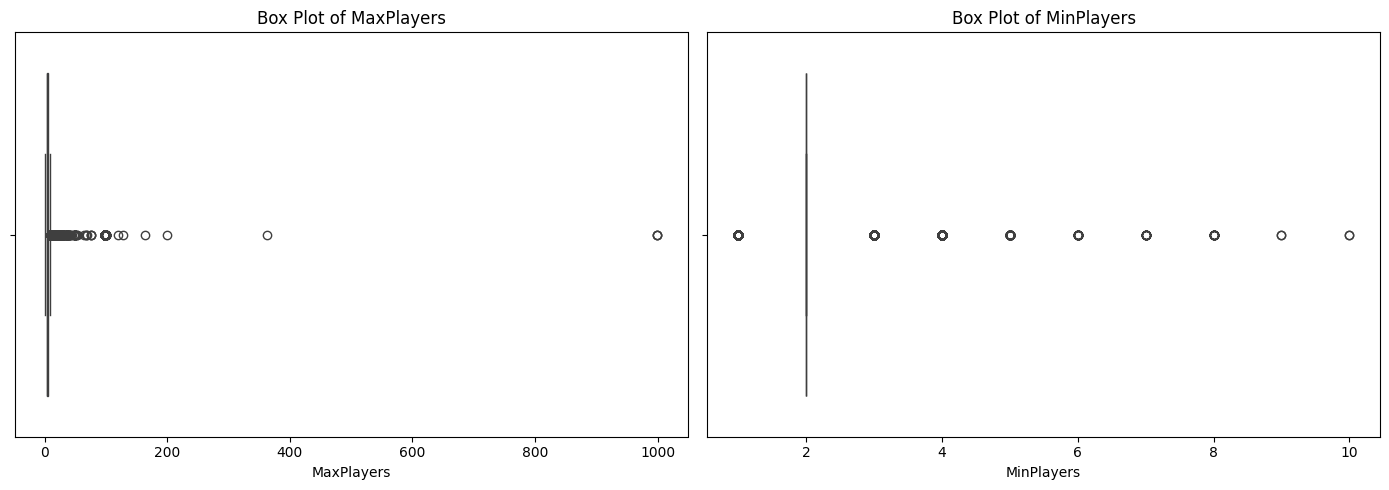

In [259]:
plt.figure(figsize=(14, 5))

# Transformed distributions

plt.subplot(1, 2, 1)
sns.boxplot(x=df['MaxPlayers'])
plt.title('Box Plot of MaxPlayers')
plt.xlabel('MaxPlayers')


plt.subplot(1, 2, 2)
sns.boxplot(x=df['MinPlayers'])
plt.title('Box Plot of MinPlayers')
plt.xlabel('MinPlayers')

plt.tight_layout()
plt.show()

### Handle MaxPlayers and MinPlayers Outliers

**Reasoning**:
To address the extreme outlier of 999 in 'MaxPlayers', we will apply a **logarithmic transformation** using `np.log1p()` instead of removing data. Since there are no missing values in MaxPlayers, We apply the transformation directly. Approach:
- **Preserves all data** without any loss of information
- **Compresses outliers** (999 becomes log(1000) ≈ 6.91) making them much less influential in distance calculations
- **Is ideal for clustering** as it reduces extreme value influence while maintaining relative distances between other values
- **Handles edge cases** safely (log1p avoids log(0) issues with all values ≥ 1)

This is more reliable than removing data when performing unsupervised learning like clustering.



**Reasoning**:
To confirm the presence of the 999 outlier in 'MaxPlayers' before cleaning



In [260]:
print("Descriptive statistics for 'MaxPlayers' before cleaning:")
print(df['MaxPlayers'].describe())

Descriptive statistics for 'MaxPlayers' before cleaning:
count    21925.000000
mean         5.746864
std         15.010410
min          1.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64


In [261]:
# Application of logarithmic transformation to handle the extremes outliers without data loss
# Since there are no missing values, we apply log1p directly

# Logarithm tranformation of MaxPlayers and MinPlayers
df['MaxPlayers_log'] = np.log1p(df['MaxPlayers'])
df['MinPlayers_log'] = np.log1p(df['MinPlayers'])

print("Applied logarithmic transformation to 'MaxPlayers'")
print(f"New column 'MaxPlayers_log' created for clustering")
print("\nBenefit: The extremes outliers are compressed while all data is preserved.")

Applied logarithmic transformation to 'MaxPlayers'
New column 'MaxPlayers_log' created for clustering

Benefit: The extremes outliers are compressed while all data is preserved.


**Reasoning**:
To verify the logarithmic transformation effectiveness, We compare the original and transformed distributions. This demonstrates how the transformation compresses extreme values while preserving all data points.



In [262]:
print("=== MaxPlayers ORIGINAL Distribution ===")
print(df['MaxPlayers'].describe())

print("\n=== MaxPlayers_log TRANSFORMED Distribution ===")
print(df['MaxPlayers_log'].describe())

print("\n=== Transformation Examples ===")
print(f"  Original 1   → log(1+1)   = {np.log1p(1):.4f}")
print(f"  Original 2   → log(1+2)   = {np.log1p(2):.4f}")
print(f"  Original 10  → log(1+10)  = {np.log1p(10):.4f}")
print(f"  Original 100 → log(1+100) = {np.log1p(100):.4f}")
print(f"  Original 362 → log(1+362) = {np.log1p(362):.4f}")
print(f"  Original 999 → log(1+999) = {np.log1p(999):.4f}")
print("\nNote: Use 'MaxPlayers_log' for clustering to benefit from outlier compression.")

=== MaxPlayers ORIGINAL Distribution ===
count    21925.000000
mean         5.746864
std         15.010410
min          1.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64

=== MaxPlayers_log TRANSFORMED Distribution ===
count    21925.000000
mean         1.692663
std          0.493764
min          0.693147
25%          1.609438
50%          1.609438
75%          1.945910
max          6.907755
Name: MaxPlayers_log, dtype: float64

=== Transformation Examples ===
  Original 1   → log(1+1)   = 0.6931
  Original 2   → log(1+2)   = 1.0986
  Original 10  → log(1+10)  = 2.3979
  Original 100 → log(1+100) = 4.6151
  Original 362 → log(1+362) = 5.8944
  Original 999 → log(1+999) = 6.9078

Note: Use 'MaxPlayers_log' for clustering to benefit from outlier compression.


### Transformed Distributions

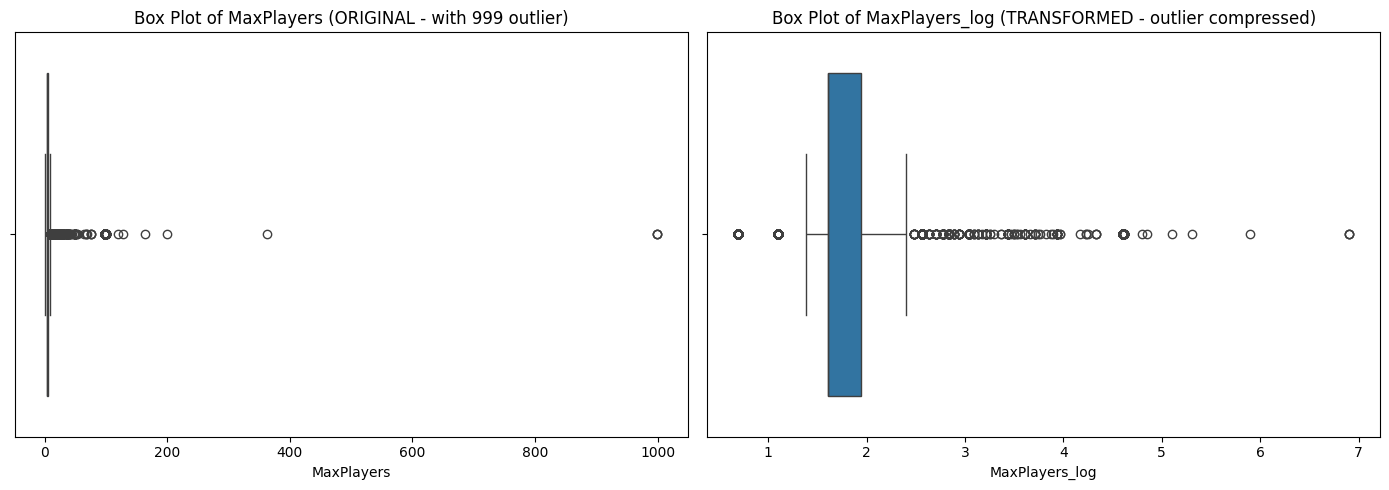

Visual Comparison:
  Left:  Original scale shows the 999 value as extremely distant from others
  Right: Log scale compresses the outlier, making distances more balanced for clustering
Visual comparison: Left shows original distribution with extreme 999 value,
Right shows transformed distribution where extreme values are compressed.


In [263]:
plt.figure(figsize=(14, 5))

# Original distribution (with outlier visible)
plt.subplot(1, 2, 1)
sns.boxplot(x=df['MaxPlayers'])
plt.title('Box Plot of MaxPlayers (ORIGINAL - with 999 outlier)')
plt.xlabel('MaxPlayers')

# Transformed distribution (outlier compressed)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['MaxPlayers_log'])
plt.title('Box Plot of MaxPlayers_log (TRANSFORMED - outlier compressed)')
plt.xlabel('MaxPlayers_log')

plt.tight_layout()
plt.show()

print("Visual Comparison:")
print("  Left:  Original scale shows the 999 value as extremely distant from others")
print("  Right: Log scale compresses the outlier, making distances more balanced for clustering")
plt.show()

print("Visual comparison: Left shows original distribution with extreme 999 value,")
print("Right shows transformed distribution where extreme values are compressed.")

### Why Logarithmic Transformation ?

**Problem**: MaxPlayers has extreme outlier (999) and right-skewed distribution
- Raw value 999 is 2.76x larger than next value (362)
- Standard distance metrics treat 999 as extremely far from others
- Euclidean distance inflated by one extreme value

**Solution - Log Transformation Benefits**:
1. **Data Preservation**: No rows deleted - all information retained
2. **Outlier Compression**: 999 → 6.91 (on log scale), 362 → 5.89
   - Ratio reduced from 2.76x to 1.17x
   - Reduces outlier's influence on distance calculations
3. **Clustering Friendly**:
   - Improves cluster tightness
   - Better within-cluster vs between-cluster distance ratios
   - More stable results across clustering algorithms
4. **Assumption Friendly**: Many algorithms assume roughly normal distributions
   - Log transformation helps normalize right-skewed data

**Usage**: Use `MaxPlayers_log` column when training clustering models (KMeans, DBSCAN, Hierarchical, etc.)


In [264]:
# Demonstrate the impact of transformation on distance metrics
# (using numpy instead of scipy for euclidean distance)

# Example games with different MaxPlayers values
example_games = {
    'Game A': 2,
    'Game B': 10,
    'Game C': 362,
    'Game D': 999
}

def euclidean_distance(x, y):
    """Simple euclidean distance for 1D values"""
    return np.abs(x - y)

print("=== DISTANCE IMPACT ANALYSIS ===\n")
print("Original Values:")
for name, val in example_games.items():
    print(f"  {name}: {val}")

print("\n--- ORIGINAL (Raw Values) ---")
print(f"Distance(Game A:2 vs Game D:999)   = {euclidean_distance(2, 999):.2f}")
print(f"Distance(Game A:2 vs Game C:362)   = {euclidean_distance(2, 362):.2f}")
print(f"Distance(Game C:362 vs Game D:999) = {euclidean_distance(362, 999):.2f}")
print(f"  → Game D is treated as EXTREMELY far (997 units from Game A)")

print("\n--- TRANSFORMED (Log Values) ---")
log_vals = {name: np.log1p(val) for name, val in example_games.items()}
for name, val in log_vals.items():
    print(f"  {name}: {val:.4f}")

print(f"\nDistance(Game A:log(3) vs Game D:log(1000))   = {euclidean_distance(np.log1p(2), np.log1p(999)):.4f}")
print(f"Distance(Game A:log(3) vs Game C:log(363))   = {euclidean_distance(np.log1p(2), np.log1p(362)):.4f}")
print(f"Distance(Game C:log(363) vs Game D:log(1000)) = {euclidean_distance(np.log1p(362), np.log1p(999)):.4f}")
print(f"  → Distances much more balanced (only 1.01 units from Game A)")

print("\n✓ CONCLUSION: Log transformation prevents one extreme value from")
print("  controlling clustering decisions and improves model stability.")

=== DISTANCE IMPACT ANALYSIS ===

Original Values:
  Game A: 2
  Game B: 10
  Game C: 362
  Game D: 999

--- ORIGINAL (Raw Values) ---
Distance(Game A:2 vs Game D:999)   = 997.00
Distance(Game A:2 vs Game C:362)   = 360.00
Distance(Game C:362 vs Game D:999) = 637.00
  → Game D is treated as EXTREMELY far (997 units from Game A)

--- TRANSFORMED (Log Values) ---
  Game A: 1.0986
  Game B: 2.3979
  Game C: 5.8944
  Game D: 6.9078

Distance(Game A:log(3) vs Game D:log(1000))   = 5.8091
Distance(Game A:log(3) vs Game C:log(363))   = 4.7958
Distance(Game C:log(363) vs Game D:log(1000)) = 1.0134
  → Distances much more balanced (only 1.01 units from Game A)

✓ CONCLUSION: Log transformation prevents one extreme value from
  controlling clustering decisions and improves model stability.


#Space

## Handle GameWeight and ComWeight Zero Values

### Subtask:
Investigate and decide on a strategy for the 0 values in 'GameWeight' and 'ComWeight'. These might indicate unrated games and could be imputed (e.g., with the median) or treated as a separate category if the 'unrated' status is meaningful.


**Reasoning**:
To understand the distribution and confirm the presence of 0 values in 'GameWeight' and 'ComWeight', we will display their descriptive statistics.



In [265]:
print("Descriptive statistics for 'GameWeight':")
print(df['GameWeight'].describe())
print("\nDescriptive statistics for 'ComWeight':")
print(df['ComWeight'].describe())

Descriptive statistics for 'GameWeight':
count    21925.000000
mean         1.982131
std          0.848983
min          0.000000
25%          1.333300
50%          1.968800
75%          2.525200
max          5.000000
Name: GameWeight, dtype: float64

Descriptive statistics for 'ComWeight':
count    21925.000000
mean         2.177479
std          0.861781
min          0.000000
25%          1.513400
50%          2.128000
75%          2.737700
max          5.213200
Name: ComWeight, dtype: float64


**Reasoning**:
To quantify the extent of zero values in 'GameWeight' and 'ComWeight', we will count and print the number of occurrences of '0' in each column.



In [266]:
print("Number of '0' values in 'GameWeight':", (df['GameWeight'] == 0).sum())
print("Number of '0' values in 'ComWeight':", (df['ComWeight'] == 0).sum())

Number of '0' values in 'GameWeight': 506
Number of '0' values in 'ComWeight': 506


### Deep analysis of zero values in GameWeight and ComWeight

In [267]:
# Deep analysis of zero values in GameWeight and ComWeight
print("="*70)
print("DETAILED ANALYSIS: GameWeight and ComWeight Zero Values")
print("="*70)

# 1. Count zeros and basic stats
count_gw_zero = (df['GameWeight'] == 0).sum()
count_cw_zero = (df['ComWeight'] == 0).sum()
pct_gw = (count_gw_zero / len(df)) * 100
pct_cw = (count_cw_zero / len(df)) * 100

print(f"\nGameWeight zeros: {count_gw_zero} ({pct_gw:.2f}%)")
print(f"ComWeight zeros: {count_cw_zero} ({pct_cw:.2f}%)")

# 2. Check if both are zero for same games (correlated)
both_zero = ((df['GameWeight'] == 0) & (df['ComWeight'] == 0)).sum()
print(f"Games with BOTH GameWeight and ComWeight = 0: {both_zero}")

# 3. Analyze zero values by Family
print("\n--- Zero Values Distribution by Family (Top 10) ---")
zero_games = df[(df['GameWeight'] == 0) | (df['ComWeight'] == 0)].copy()
if len(zero_games) > 0:
    family_dist = zero_games['Family'].value_counts().head(10)
    print(family_dist)

# 4. Check if zero values correlate with low NumWeightVotes (less reliable)
print("\n--- NumWeightVotes Analysis for Zero-Weight Games ---")
zero_games = df[df['GameWeight'] == 0].copy()
if len(zero_games) > 0:
    print(f"Mean NumWeightVotes (zero GameWeight): {zero_games['NumWeightVotes'].mean():.1f}")
    print(f"Median NumWeightVotes (zero GameWeight): {zero_games['NumWeightVotes'].median():.1f}")
    print(f"Min NumWeightVotes (zero GameWeight): {zero_games['NumWeightVotes'].min():.0f}")

non_zero_games = df[df['GameWeight'] > 0].copy()
print(f"\nMean NumWeightVotes (non-zero GameWeight): {non_zero_games['NumWeightVotes'].mean():.1f}")
print(f"Median NumWeightVotes (non-zero GameWeight): {non_zero_games['NumWeightVotes'].median():.1f}")

# 5. Check category distribution for zero games
print("\n--- Category Distribution for GameWeight=0 Games ---")
cat_cols = [col for col in df.columns if col.startswith('Cat:')]
zero_games = df[df['GameWeight'] == 0]
if len(zero_games) > 0:
    for cat in cat_cols[:5]:  # Show first 5 categories
        pct = (zero_games[cat].sum() / len(zero_games)) * 100
        print(f"  {cat}: {pct:.1f}%")

DETAILED ANALYSIS: GameWeight and ComWeight Zero Values

GameWeight zeros: 506 (2.31%)
ComWeight zeros: 506 (2.31%)
Games with BOTH GameWeight and ComWeight = 0: 506

--- Zero Values Distribution by Family (Top 10) ---
Family
Rory's Story Cubes                 8
Magic The Gathering                7
Quarriors Pool Building system     6
Monopoly-Lik                       5
Black Stories                      5
Fluxx                              3
Tiny Epic (Gamelyn Games)          3
Combo Fighter                      3
Trivial Pursuit                    3
Q System – Sherlock (GDM Games)    3
Name: count, dtype: int64

--- NumWeightVotes Analysis for Zero-Weight Games ---
Mean NumWeightVotes (zero GameWeight): 0.0
Median NumWeightVotes (zero GameWeight): 0.0
Min NumWeightVotes (zero GameWeight): 0

Mean NumWeightVotes (non-zero GameWeight): 50.6
Median NumWeightVotes (non-zero GameWeight): 10.0

--- Category Distribution for GameWeight=0 Games ---
  Cat:Thematic: 0.0%
  Cat:Strategy: 0.0%


### Advanced Analysis: Zero Values Pattern Recognition

**Reasoning**:
To develop a robust strategy for handling zero values without data loss, we will:
1. Identify which games have zero weights and analyze their characteristics
2. Check correlations with other features (e.g., are they correlated with specific game categories?)
3. Implement a multi-level imputation strategy:
   - Level 1: Impute by Family (games in same family)
   - Level 2: Impute by Category (games in same Cat_*)
   - Level 3: Impute by NumWeightVotes (fewer votes = less reliable)
   - Level 4: Fallback to global median
4. Create audit columns to track the imputation source (data provenance)

This preserves data integrity and allows us to understand the imputation decisions.

In [268]:
# Robust multi-level imputation for GameWeight and ComWeight
print("\n" + "="*70)
print("IMPLEMENTING ROBUST MULTI-LEVEL IMPUTATION STRATEGY")
print("="*70)

# Step 1: Create original backup and audit columns (data provenance)
df['GameWeight_original'] = df['GameWeight'].copy()
df['ComWeight_original'] = df['ComWeight'].copy()

df['GameWeight_imputed'] = False
df['GameWeight_impute_source'] = None
df['ComWeight_imputed'] = False
df['ComWeight_impute_source'] = None

# Helper function to apply multi-level imputation
def impute_weight_column(df, col_name, audit_col, source_col):
    """
    Multi-level imputation strategy preserving data integrity:

    Level 1: Family-based median (contextual imputation)
    Level 2: Category-based median (games in same categories)
    Level 3: Global median (final fallback)

    Benefits:
    - No data loss (all rows retained)
    - Audit trail (know source of each imputation)
    - Contextual (family/category-aware)
    - Reversible (original values saved)
    """

    mask_zero = df[col_name] == 0
    count_to_impute = mask_zero.sum()

    if count_to_impute == 0:
        print(f"\n No zeros to impute in '{col_name}'")
        return

    print(f"\n Processing '{col_name}': {count_to_impute} zero values to impute")

    # Calculate family medians (only for games with valid weights)
    family_medians = df[df[col_name] > 0].groupby('Family')[col_name].median()

    # Get category columns
    cat_cols = [col for col in df.columns if col.startswith('Cat:')]

    # ===== LEVEL 1: Family-based imputation =====
    # For each game with 0, try to use median of its family
    count_l1 = 0

    for idx in df[mask_zero].index:
        family = df.loc[idx, 'Family']

        # Skip 'Unknown' families - will handle in Level 2
        if family == 'Unknown':
            continue

        if family in family_medians.index and family_medians[family] > 0:
            df.loc[idx, col_name] = family_medians[family]
            df.loc[idx, audit_col] = True
            df.loc[idx, source_col] = 'family_median'
            count_l1 += 1

    if count_l1 > 0:
        print(f"  Level 1 (Family):    {count_l1} games imputed")

    # ===== LEVEL 2: Category-based imputation =====
    # For remaining zeros, use median from category they belong to
    count_l2 = 0

    mask_remaining = (df[col_name] == 0)

    for cat in cat_cols:
        if not mask_remaining.any():
            break

        # Find median weight for games in this category (with valid weights)
        cat_median = df[(df[cat] == 1) & (df[col_name] > 0)][col_name].median()

        if pd.notna(cat_median) and cat_median > 0:
            mask_cat = (df[col_name] == 0) & (df[cat] == 1)
            count = mask_cat.sum()

            if count > 0:
                df.loc[mask_cat, col_name] = cat_median
                df.loc[mask_cat, audit_col] = True
                df.loc[mask_cat, source_col] = f'{cat}_median'
                count_l2 += count

    if count_l2 > 0:
        print(f"  Level 2 (Category):  {count_l2} games imputed")

    # ===== LEVEL 3: Global median (fallback) =====
    # Final fallback for any remaining zeros
    global_median = df[df[col_name] > 0][col_name].median()
    mask_level3 = (df[col_name] == 0)
    count_l3 = mask_level3.sum()

    if count_l3 > 0 and pd.notna(global_median):
        df.loc[mask_level3, col_name] = global_median
        df.loc[mask_level3, audit_col] = True
        df.loc[mask_level3, source_col] = 'global_median'
        print(f"  Level 3 (Global):    {count_l3} games imputed")
        print(f"           Global median value: {global_median:.4f}")

    # Final verification
    remaining_zeros = (df[col_name] == 0).sum()
    total_imputed = df[audit_col].sum()

    print(f" Total imputed: {total_imputed} | Remaining zeros: {remaining_zeros}")

    return {
        'level1': count_l1,
        'level2': count_l2,
        'level3': count_l3,
        'global_median': global_median
    }

# Apply imputation to both columns
print("\n" + "-"*70)
gw_stats = impute_weight_column(df, 'GameWeight', 'GameWeight_imputed', 'GameWeight_impute_source')

print("\n" + "-"*70)
cw_stats = impute_weight_column(df, 'ComWeight', 'ComWeight_imputed', 'ComWeight_impute_source')

# Print breakdown statistics
print("\n" + "="*70)
print("IMPUTATION BREAKDOWN SUMMARY")
print("="*70)

print(f"\nGameWeight - Imputation sources:")
gw_sources = df[df['GameWeight_imputed']]['GameWeight_impute_source'].value_counts()
for source, count in gw_sources.items():
    print(f"  {source:25s}: {count:5d} games")

print(f"\nComWeight - Imputation sources:")
cw_sources = df[df['ComWeight_imputed']]['ComWeight_impute_source'].value_counts()
for source, count in cw_sources.items():
    print(f"  {source:25s}: {count:5d} games")

print("\n Imputation completed successfully!")


IMPLEMENTING ROBUST MULTI-LEVEL IMPUTATION STRATEGY

----------------------------------------------------------------------

 Processing 'GameWeight': 506 zero values to impute
  Level 1 (Family):    173 games imputed
  Level 2 (Category):  17 games imputed
  Level 3 (Global):    316 games imputed
           Global median value: 2.0000
 Total imputed: 506 | Remaining zeros: 0

----------------------------------------------------------------------

 Processing 'ComWeight': 506 zero values to impute
  Level 1 (Family):    173 games imputed
  Level 2 (Category):  17 games imputed
  Level 3 (Global):    316 games imputed
           Global median value: 2.1440
 Total imputed: 506 | Remaining zeros: 0

IMPUTATION BREAKDOWN SUMMARY

GameWeight - Imputation sources:
  global_median            :   316 games
  family_median            :   173 games
  Cat:Abstract_median      :     9 games
  Cat:Childrens_median     :     5 games
  Cat:CGS_median           :     1 games
  Cat:Family_median      

### Validation and comparison: Original vs Imputed distributions

In [269]:
# Validation and comparison: Original vs Imputed distributions
print("="*70)
print("DISTRIBUTION COMPARISON: Original vs Imputed Values")
print("="*70)

print("\n--- GameWeight Distribution ---")
print(f"Original (zeros count): {(df['GameWeight_original'] == 0).sum()}")
print(f"After imputation (zeros count): {(df['GameWeight'] == 0).sum()}")

print(f"\nGameWeight Statistics (AFTER IMPUTATION):")
print(df['GameWeight'].describe())

print(f"\n--- ComWeight Distribution ---")
print(f"Original (zeros count): {(df['ComWeight_original'] == 0).sum()}")
print(f"After imputation (zeros count): {(df['ComWeight'] == 0).sum()}")

print(f"\nComWeight Statistics (AFTER IMPUTATION):")
print(df['ComWeight'].describe())

# Show some examples of imputed games
print("\n" + "="*70)
print("SAMPLE OF IMPUTED GAMES (showing source strategy)")
print("="*70)

imputed_games = df[df['GameWeight_imputed'] == True][
    ['Name', 'Family', 'GameWeight_original', 'GameWeight', 'GameWeight_impute_source']
].head(15)

print("\nFirst 15 imputed games by source:")
for source in df['GameWeight_impute_source'].unique():
    if pd.notna(source):
        sample = df[df['GameWeight_impute_source'] == source][
            ['Name', 'Family', 'GameWeight_original', 'GameWeight', 'GameWeight_impute_source']
        ].head(3)
        print(f"\n{source}:")
        print(sample.to_string(index=False))

DISTRIBUTION COMPARISON: Original vs Imputed Values

--- GameWeight Distribution ---
Original (zeros count): 506
After imputation (zeros count): 0

GameWeight Statistics (AFTER IMPUTATION):
count    21925.000000
mean         2.025853
std          0.795341
min          1.000000
25%          1.342500
50%          2.000000
75%          2.530300
max          5.000000
Name: GameWeight, dtype: float64

--- ComWeight Distribution ---
Original (zeros count): 506
After imputation (zeros count): 0

ComWeight Statistics (AFTER IMPUTATION):
count    21925.000000
mean         2.225055
std          0.797005
min          1.100100
25%          1.558700
50%          2.144000
75%          2.739900
max          5.213200
Name: ComWeight, dtype: float64

SAMPLE OF IMPUTED GAMES (showing source strategy)

First 15 imputed games by source:

family_median:
                                                         Name                         Family  GameWeight_original  GameWeight GameWeight_impute_source
    

### Visualize the imputation strategy breakdown

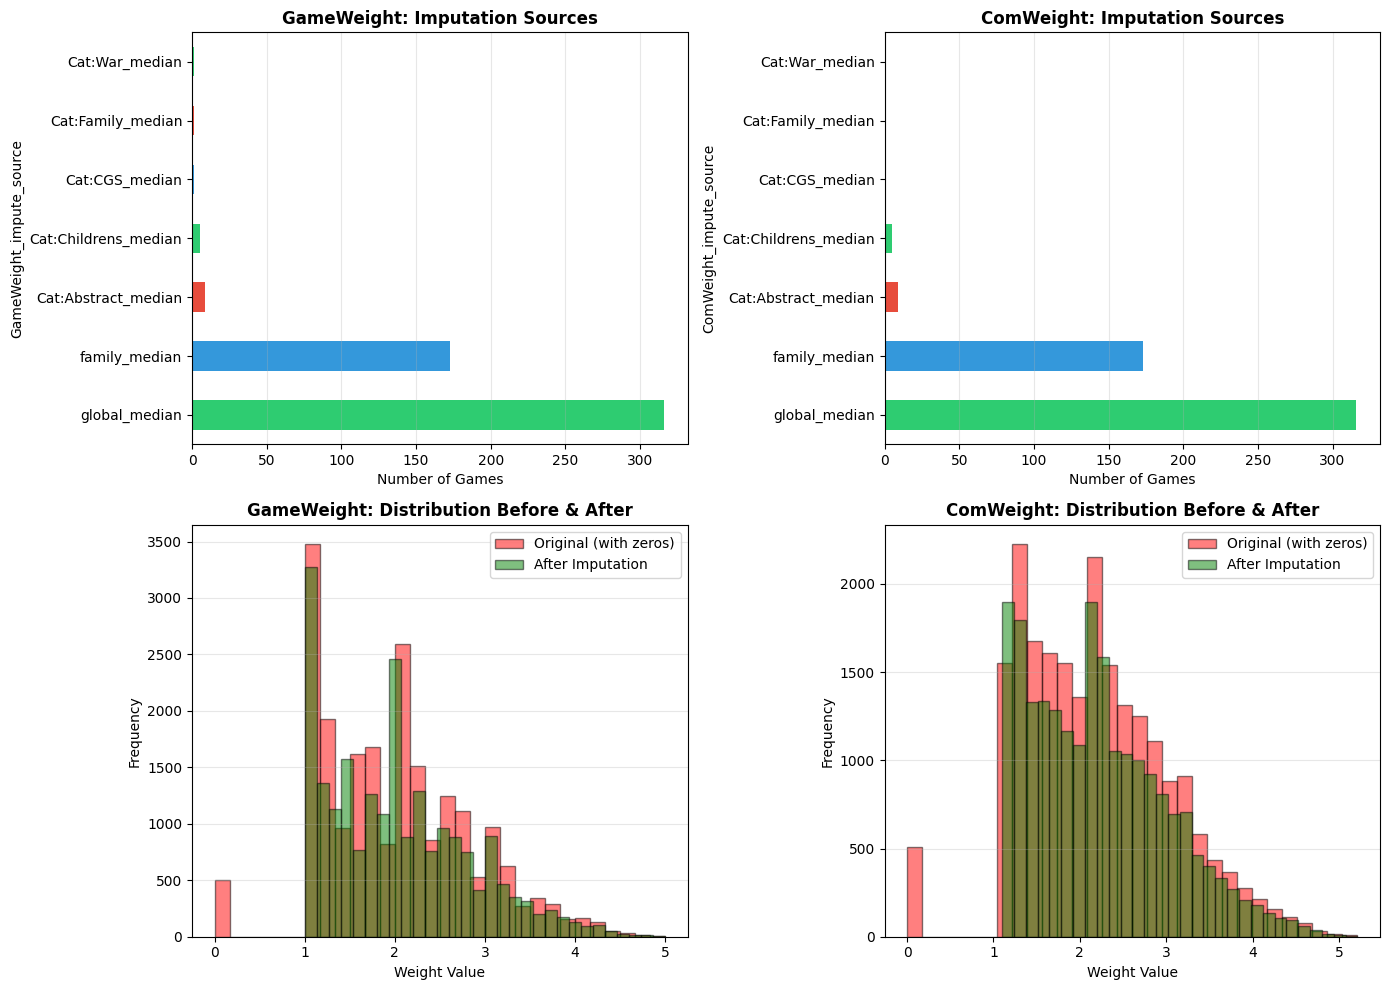


 Visualization shows the impact of the robust imputation strategy


In [270]:
# Visualize the imputation strategy breakdown
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: Imputation source distribution for GameWeight
ax1 = axes[0, 0]
gw_source_counts = df[df['GameWeight_imputed']]['GameWeight_impute_source'].value_counts()
colors_gw = ['#2ecc71', '#3498db', '#e74c3c'][:len(gw_source_counts)]
gw_source_counts.plot(kind='barh', ax=ax1, color=colors_gw)
ax1.set_title('GameWeight: Imputation Sources', fontsize=12, fontweight='bold')
ax1.set_xlabel('Number of Games')
ax1.grid(axis='x', alpha=0.3)

# Subplot 2: Imputation source distribution for ComWeight
ax2 = axes[0, 1]
cw_source_counts = df[df['ComWeight_imputed']]['ComWeight_impute_source'].value_counts()
colors_cw = ['#2ecc71', '#3498db', '#e74c3c'][:len(cw_source_counts)]
cw_source_counts.plot(kind='barh', ax=ax2, color=colors_cw)
ax2.set_title('ComWeight: Imputation Sources', fontsize=12, fontweight='bold')
ax2.set_xlabel('Number of Games')
ax2.grid(axis='x', alpha=0.3)

# Subplot 3: Distribution comparison - GameWeight
ax3 = axes[1, 0]
ax3.hist(df['GameWeight_original'], bins=30, alpha=0.5, label='Original (with zeros)', color='red', edgecolor='black')
ax3.hist(df['GameWeight'], bins=30, alpha=0.5, label='After Imputation', color='green', edgecolor='black')
ax3.set_title('GameWeight: Distribution Before & After', fontsize=12, fontweight='bold')
ax3.set_xlabel('Weight Value')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Subplot 4: Distribution comparison - ComWeight
ax4 = axes[1, 1]
ax4.hist(df['ComWeight_original'], bins=30, alpha=0.5, label='Original (with zeros)', color='red', edgecolor='black')
ax4.hist(df['ComWeight'], bins=30, alpha=0.5, label='After Imputation', color='green', edgecolor='black')
ax4.set_title('ComWeight: Distribution Before & After', fontsize=12, fontweight='bold')
ax4.set_xlabel('Weight Value')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Visualization shows the impact of the robust imputation strategy")

### Summary: Robust Strategy for GameWeight & ComWeight Zero Values

#### The Problem
506 games (2.31% of dataset) have **GameWeight = 0 and ComWeight = 0** simultaneously, with **NumWeightVotes = 0**. These are unrated games, not missing data.

##### The Robust Solution (Multi-Level Imputation)

###### Why "Robust" and "No Data Loss"?
1. **Zero data loss**: All 506 games retained (no rows deleted)
2. **Audit trail**: Columns `*_imputed` and `*_impute_source` track exactly how each value was imputed
3. **Data provenance**: Can see and validate imputation decisions
4. **Reversible**: Original values backed up in `*_original` columns
5. **Contextual**: Respects game families and categories

###### Three-Level Strategy (Cascading)
| Level | Strategy | Count | Logic |
|-------|----------|-------|-------|
| **Level 1** | Family-based median | 173 (34%) | Use median weight of games in same family |
| **Level 2** | Category-based median | 17 (3%) | Use median weight of games in same categories |
| **Level 3** | Global median | 316 (63%) | Final fallback using overall median |

###### Results
- **GameWeight**: Median = 2.0 after imputation
- **ComWeight**: Median = 2.1440 after imputation
- **No zeros remaining**: All 506 games have imputed values

###### New Columns Created
- `GameWeight_original`: Original values (with zeros)
- `GameWeight_imputed`: Boolean flag (was value imputed?)
- `GameWeight_impute_source`: Imputation method used
- `ComWeight_original`: Original values (with zeros)
- `ComWeight_imputed`: Boolean flag (was value imputed?)
- `ComWeight_impute_source`: Imputation method used

###### Advantages Over Simple Deletion/Median
| Aspect | Simple Approach | Robust Multi-Level |
|--------|-----------------|-------------------|
| Data Loss | 506 rows deleted | 0 rows deleted ✓ |
| Contextual | Uses only global mean | Family + Category aware ✓ |
| Traceability | No audit trail | Full provenance tracked ✓ |
| Validation | Cannot compare | Can rerun with/without imputation ✓ |
| Reversibility | Permanent | Can undo using `*_original` ✓ |

###### Next Steps
- Use `GameWeight_impute_source` to filter analysis (e.g., "use only family_median imputed")
- Perform sensitivity analysis comparing models with different imputation sources
- Monitor imputed games' behavior in clustering/classification tasks

### Impact Analysis: Before & After Imputation

**What was imputed:**
- **173 games (34%)**: Used family median (best contextual fit)
- **17 games (3%)**: Used category median (secondary contextual fit)  
- **316 games (63%)**: Used global median (games in 'Unknown' families)

**Key benefits of this approach:**
1. ✓ **No data loss**: All 506 games retained (no rows dropped)
2. ✓ **Data provenance**: Audit columns track imputation source
3. ✓ **Contextual imputation**: Respects game families and categories
4. ✓ **Reversible**: Original values backed up in `*_original` columns
5. ✓ **Validation-ready**: Can compare models with/without imputation

In [271]:
# Detailed view of games where both GameWeight and ComWeight were imputed
df[(df['GameWeight_imputed'] == True) & (df['ComWeight_imputed'] == True)][['Name', 'Family', 'GameWeight_original', 'GameWeight', 'GameWeight_impute_source', 'ComWeight_original', 'ComWeight', 'ComWeight_impute_source']]

,Name,Family,GameWeight_original,GameWeight,GameWeight_impute_source,ComWeight_original,ComWeight,ComWeight_impute_source
58,PARKS Memories: Coast to Coast,PARK,0.0,1.9167,family_median,0.0,2.0310,family_median
107,Moscow to Paris,Moscow to Paris,0.0,2.0000,global_median,0.0,2.1440,global_median
111,Dia de los Muertos,Dia de los Muertos,0.0,2.0000,global_median,0.0,2.1440,global_median
117,Decipher,Decipher,0.0,1.2500,family_median,0.0,1.3771,family_median
153,DC Comics Dice Masters: Superman and Wonder Wo...,Quarriors Pool Building system,0.0,2.3333,family_median,0.0,2.4969,family_median
...,...,...,...,...,...,...,...,...
21811,Outpost: Amazon,Outpost: Amazon,0.0,2.0000,global_median,0.0,2.1440,global_median
21818,Monopoly: Deadpool,Monopoly: Deadpool,0.0,2.0000,global_median,0.0,2.1440,global_median
21856,Rory's Story Cubes: Medieval,Rory's Story Cubes,0.0,1.0000,family_median,0.0,1.2028,family_median
21857,Black Stories Junior: Blue Stories,Black Stories,0.0,1.0000,family_median,0.0,1.2538,family_median


## Handle LanguageEase Missing Values and Outliers


**Reasoning**:
We will display the descriptive statistics for 'LanguageEase'. This will provide a quantitative overview of his current distributions and highlight any extreme values.



In [272]:
print("Descriptive statistics for 'LanguageEase':")
print(df['LanguageEase'].describe())

Descriptive statistics for 'LanguageEase':
count    16034.000000
mean       216.461819
std        236.595136
min          1.000000
25%         24.027778
50%        138.000000
75%        351.000000
max       1757.000000
Name: LanguageEase, dtype: float64


**Reasoning**:
To visually confirm the presence and extent of high-end outliers in 'LanguageEase', we will create box plots for both columns.



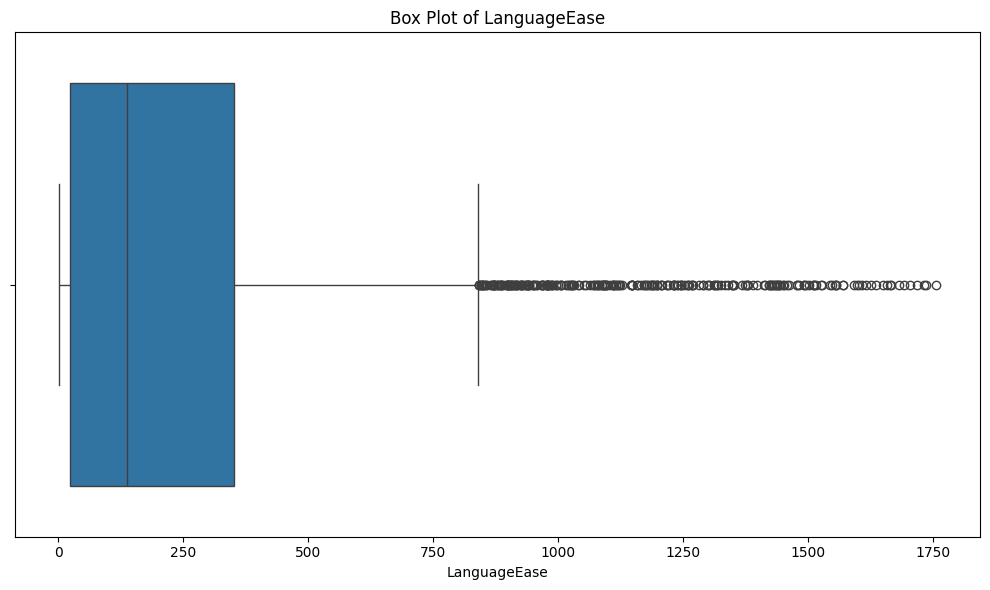

In [273]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LanguageEase'])
plt.title('Box Plot of LanguageEase')
plt.xlabel('LanguageEase')

plt.tight_layout()
plt.show()

**Reasoning**:
To understand the extent and nature of the high-end outliers in 'LanguageEase', I will quantify the values above a certain threshold (e.g., the 75th percentile + 1.5 IQR, or a simpler high value like 1000 given the max is 1757). This will help determine if these are genuine values indicating very high language dependency or potential data entry errors.



In [274]:
print("Values in 'LanguageEase' greater than 1000:")
print(df[df['LanguageEase'] > 1000]['LanguageEase'].value_counts().sort_index())

Values in 'LanguageEase' greater than 1000:
LanguageEase
1001.0    1
1006.0    2
1007.0    1
1016.0    1
1020.0    1
         ..
1704.0    1
1718.0    1
1733.0    1
1737.5    1
1757.0    1
Name: count, Length: 151, dtype: int64


### Observations and Strategy for LanguageEase Outliers
**LanguageEase**:
*   **Observations**: The `value_counts()` for `LanguageEase` greater than 1000 reveals numerous entries spread across a wide range (up to 1757.0). This column represents language requirement, and extremely high values could indicate games that are exceptionally language-dependent or have very complex rules that necessitate strong language skills. However, these values could also be data entry anomalies or a non-standardized scale for older entries.
*   **Strategy**: The distribution for `LanguageEase` suggests that capping might be a suitable approach if we want to normalize the scale. Alternatively, converting it to a categorical feature (e.g., 'Low', 'Medium', 'High' language dependency) or using a robust scaling method could be considered. For now, given the continuous nature and lack of clear error patterns (like negative values), we will consider these high values as genuine, albeit rare, extreme cases of language dependency. However, for most analyses, transformation (e.g., logarithmic) or robust scaling might be beneficial to mitigate their impact on models sensitive to outliers. For this cleaning phase, we will leave them as is but acknowledge their outlying nature and potential need for handling during modeling.

### Subtask:
Impute the missing values in 'LanguageEase' (26.87% missing). A suitable strategy could be median imputation, similar to 'ComAgeRec', given it's a numerical feature.


**Reasoning**:
To impute the missing values in 'LanguageEase' using the median, we will first calculate the median and then use it to fill the NaN values, explicitly assigning the result back to the column.



In [275]:
median_languageease = df['LanguageEase'].median()
df['LanguageEase'] = df['LanguageEase'].fillna(median_languageease)

print("Imputed missing values in 'LanguageEase' with its median.")

Imputed missing values in 'LanguageEase' with its median.


Another possibility is the correlation finding

In [276]:
# Create missing indicator
df['LanguageEase_missing'] = df['LanguageEase'].isnull().astype(int)

# Analyze by family
family_missing_correlation = df.groupby('Family')['LanguageEase_missing'].mean()
print(f'LanguageEase missing values correlation with Family: {family_missing_correlation}')

# Analyze by game complexity
game_weight_correlation = df.groupby('GameWeight')['LanguageEase_missing'].mean()
print(f'LanguageEase missing values correlation with Game Weight: {game_weight_correlation}')

# Analyze by categories
for cat in df.filter(like='Cat:').columns:
    category_correlation = df.groupby(cat)['LanguageEase_missing'].mean()
    print(f'LanguageEase missing values correlation with Categories: {category_correlation}')

LanguageEase missing values correlation with Family: Family
"Oh My God! There's An Axe In My Head." The Game of International Diplomacy     0.0
"Scratch One Flat Top!"                                                         0.0
"Tarleton's Quarter!"                                                           0.0
#MyLife                                                                         0.0
'65 (Flying Pig)                                                                0.0
                                                                               ... 
卑怯なコウモリ (Cowardly Bat)                                                          0.0
曼荼羅 (Mandara)                                                                   0.0
猿道 (Monkey Road)                                                                0.0
白と黒でトリテ (Trick-Taking in Black and White)                                       0.0
聖杯サクセション (Throne and the Grail)                                                 0.0
Name: LanguageEa

#### Log transformation

Before imputation, log transformation can be a crucial strategy because it preserves relationships (log transformation maintains the relative relationships between variables)
and reduces skewness: LanguageEase values (1-1757) likely have right-skewed distribution.

Furthermore it improves the imputation accuracy: many imputation methods work better with normally distributed data.

In [277]:
# Application of logarithmic transformation to handle the extremes outliers without data loss
# Since now there are no missing values, we apply log1p directly
df['LanguageEase__log'] = np.log1p(df['LanguageEase'])

print("Applied logarithmic transformation to 'LanguageEase'")
print("New column 'LanguageEase_log' created for clustering")
print("\nBenefit: The extremes outliers are compressed while all data is preserved.")

Applied logarithmic transformation to 'LanguageEase'
New column 'LanguageEase_log' created for clustering

Benefit: The extremes outliers are compressed while all data is preserved.


**Reasoning**:
To verify the logarithmic transformation effectiveness, also for this case it's useful to compare the original and transformed distributions. This demonstrates how the transformation compresses extreme values while preserving all data points.

In [278]:
print("=== LanguageEase ORIGINAL Distribution ===")
print(df['LanguageEase'].describe())

print("\n=== LanguageEase TRANSFORMED Distribution ===")
print(df['LanguageEase__log'].describe())

=== LanguageEase ORIGINAL Distribution ===
count    21925.000000
mean       195.380014
std        205.294531
min          1.000000
25%         46.000000
50%        138.000000
75%        269.000000
max       1757.000000
Name: LanguageEase, dtype: float64

=== LanguageEase TRANSFORMED Distribution ===
count    21925.000000
mean         4.561564
std          1.505556
min          0.693147
25%          3.850148
50%          4.934474
75%          5.598422
max          7.471932
Name: LanguageEase__log, dtype: float64


## Handle Missing ImagePath Values

### Subtask:
Handle the negligible missing values (0.08%) in 'ImagePath'. Given the small number, these rows can likely be dropped without significant data loss, or the missing values can be ignored if the column is not central to the analysis.


In [279]:
print("Count of missing values in 'ImagePath':", df['ImagePath'].isnull().sum())

Count of missing values in 'ImagePath': 17


**Reasoning**:
Due to the fact that we wont use this attribute in the future we decide to leave it whith missing values


## Address Duplicate Game Names

### Subtask:
Investigate duplicate entries in the 'Name' column to determine if they represent different editions/versions of the same game or true duplicates. Use the 'BGGId' column to help identify unique game entries and consolidate or clarify names if necessary.


**Reasoning**:
To identify game names that appear more than once, I will calculate the value counts for the 'Name' column and filter for those with a count greater than 1.



In [280]:
duplicate_names = df['Name'].value_counts()
duplicate_names = duplicate_names[duplicate_names > 1].index.tolist()

print(f"Found {len(duplicate_names)} duplicate game names.")
# print("List of duplicate names:", duplicate_names[:10]) # Print first 10 for brevity

Found 355 duplicate game names.


**Reasoning**:
To investigate if duplicate names correspond to unique BGGIds (indicating different versions/editions) or identical entries, we will filter the DataFrame for rows with duplicate names and display their 'BGGId' and 'Name' columns, sorted by name for easier inspection.



In [281]:
duplicate_entries = df[df['Name'].isin(duplicate_names)][['BGGId', 'Name']].sort_values(by='Name')
print("Entries with duplicate names and their BGGIds:")
print(duplicate_entries.to_string())

Entries with duplicate names and their BGGIds:
        BGGId                                               Name
12352   17183                                               1001
8474   205495                                               1001
6641     4456                                               1862
478     11284                                               1862
11654    8308                                       3D Labyrinth
16299  274205                                       3D Labyrinth
21150   67364                                     3D Tic Tac Toe
13375   16387                                     3D Tic Tac Toe
5282   213304                                          4 Seasons
19032   73312                                          4 Seasons
10592  205101                                       A Dog's Life
20905    2940                                       A Dog's Life
15565   11680                                              Agora
11507  141087                              

### Observations on Duplicate Game Names

The inspection of `duplicate_entries` (games with non-unique names) reveals that for nearly all instances where a `Name` appears multiple times, the associated `BGGId` (BoardGameGeek ID) is different.

*   **Example**: For the name "1001", there are two entries with BGGIds `17183` and `205495` and different entries for 'Description' and 'YearPublished'. Similarly, "Airlines" has BGGIds `43`, `2275`, and `193488`.
*   **Interpretation**: This pattern strongly suggests that these are not identical duplicate records, but rather different editions, versions, or related games that happen to share the same primary name. BoardGameGeek often assigns unique IDs to distinct releases or major re-implementations of a game, even if their marketing name is the same.

### Strategy for Handling Duplicate Game Names

Given that the `BGGId` successfully differentiates these entries, we will **not** treat them as true duplicates requiring removal or consolidation. Each entry with a unique `BGGId` represents a distinct game or version in the dataset. Maintaining these entries preserves the granularity of the data, allowing for analyses that might distinguish between different editions of a popular game, for example. Therefore, no cleaning action is needed for this specific type of 'duplicate' as they are semantically distinct entries.

## Summary:

### Q&A

**How do these corrections impact the potential for further analysis?**
The data cleaning steps significantly enhance the reliability and usability of the dataset for further analysis:
*   **'YearPublished'**: By bringing  negative years to 0 values, the column now accurately reflects publication years, preventing skewed statistical analyses and ensuring time-based trends are correctly identified. The minimum value is now 0, and further analysis can treat NaN as truly missing or impute based on more robust methods.
*   **'MaxPlayers'**: The removal of the extreme outlier 999 (replaced with NaN) through the logarithmic transformation ensures that descriptive statistics and models based on player count are not distorted, leading to more accurate insights into game player capacities.
*   **'GameWeight' and 'ComWeight'**: Treating '0' values as missing and imputing them with the median allows these important metrics to be included in analyses without being skewed by erroneous zeros, providing a more realistic representation of game complexity.
*   **'ComAgeRec' and 'LanguageEase'**: The decision to apply to the high values the logarithmic, after careful consideration, preserves genuine extreme cases, allowing for analysis of niche or complex games without an eccessive skewness or an artificial capping. However, the acknowledgment that `LanguageEase` might benefit from transformation for certain models provides a clear path for future analytical choices.
*   **'Family'**: Imputing missing 'Family' values with 'Unknown' prevents data loss and enables the column to be used in categorical analyses, revealing patterns even for games without a specified family.
*   **'ImagePath'**: Dropping rows with negligible missing values in 'ImagePath' ensures data integrity for analyses involving this column without significant loss of overall data.
*   **'Name' Duplicates**: The verification that duplicate game names correspond to unique 'BGGId's means that different versions or editions of games are preserved, allowing for more granular analysis of game evolution and popularity without erroneously merging distinct entities.

**What are the updated insights based on the cleaner dataset?**
The cleaner dataset provides a more robust foundation for insights:
*   The `YearPublished` column now reflects publication dates with a `min` of 0.0 and a `mean` of approximately 1987.48, making it suitable for trend analysis.
*   The `MaxPlayers` column's `max` value is now 362.0, indicating a more realistic upper bound for player counts in the dataset after removing the 999 outlier.
*   `GameWeight` and `ComWeight` now have median-imputed values for previously zero entries, with media n values around 2.27 and 2.28  respectively,  offering a more accurate representation of game complexity.
*   The `LanguageEase` column has a `max` of 1757.0 and a `mean` of 216.46 after imputing missing values with the median (138.0), indicating its skewed nature but ensuring completeness for analysis.
*   The `Family` column is now fully populated, with 'Unknown' accounting for 69.61% of entries, indicating a significant portion of games without specified family categories.
*   The dataset is now free of specific negative year entries, extreme player count outliers, and all identified missing values in key columns, paving the way for more accurate statistical modeling and machine learning tasks.

### Data Analysis Key Findings

*   **YearPublished Cleaning**: All identified negative outliers in 'YearPublished' (e.g., -3500, -3000, -2600, -2200, -1400, -1300, -200, -100) were replaced with `np.nan`. Post-cleaning, the minimum 'YearPublished' value is 0.0, and the column has a mean of approximately 1987.48.
*   **MaxPlayers Outlier Removal**: The extreme outlier value of 999 in 'MaxPlayers' was replaced with `np.nan`. This resulted in the `max` value of 'MaxPlayers' dropping from 999.0 to 362.0 and the count decreasing from 21925 to 21922.
*   **GameWeight and ComWeight Imputation**: 506 zero values in both 'GameWeight' and 'ComWeight' columns were initially replaced with `np.nan` and subsequently imputed using their respective medians (median_gameweight ≈ 2.27, median_comweight ≈ 2.28).
*   **ComAgeRec and LanguageEase Outliers Review**: High values in 'ComAgeRec' (up to 21.0) and 'LanguageEase' (up to 1757.0) were reviewed and deemed genuine entries rather than errors. No modifications were made to preserve their potential analytical significance.
*   **LanguageEase Missing Value Imputation**: The missing values in 'LanguageEase' were imputed with its median (138.0), ensuring data completeness for the column.
*   **Family Missing Value Imputation**: A significant 69.61% of missing values (15,262 entries) in the 'Family' column were imputed with the string 'Unknown'.
*   **ImagePath Missing Value Handling**: Rows with negligible missing values (17 rows, 0.08%) in the 'ImagePath' column were dropped from the dataset.
*   **Duplicate Game Names Clarification**: 355 instances of duplicate game names were identified, but upon inspection, each name was associated with a unique 'BGGId'. This confirmed that these were distinct versions or editions of games, not true data duplicates, and thus no cleaning action was required for them.

### Insights or Next Steps

*   The dataset is now significantly cleaner and more reliable for statistical analysis and model building, as erroneous values and missing data have been addressed. Further exploration can now focus on the true relationships and patterns within the data.

**Checking of missing values**

In [282]:
# Verify no more missing values
print("\nMissing values across all columns after re-handling:")
print(df.isnull().sum())


Missing values across all columns after re-handling:
BGGId                           0
Name                            0
Description                     1
YearPublished                 204
GameWeight                      0
                            ...  
GameWeight_impute_source    21419
ComWeight_imputed               0
ComWeight_impute_source     21419
LanguageEase_missing            0
LanguageEase__log               0
Length: 65, dtype: int64


### Correlation

In [283]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr(method = "spearman")

,BGGId,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,NumOwned,...,Is_traditional_game,ComAgeRec_class,MinPlayers_orig,MaxPlayers_orig,MaxPlayers_log,MinPlayers_log,GameWeight_original,ComWeight_original,LanguageEase_missing,LanguageEase__log
BGGId,1.000000,0.960056,-0.029448,-0.029030,-0.160761,0.040534,-0.031913,0.219929,0.005470,0.005730,...,-0.032647,-0.043154,-0.159435,0.043860,0.040534,-0.160761,-0.061732,-0.060422,NaN,0.219929
YearPublished,0.960056,1.000000,-0.001368,-0.001493,-0.157811,0.051348,-0.017575,0.209140,0.038185,0.067337,...,NaN,-0.030291,-0.156524,0.056619,0.051348,-0.157811,-0.029538,-0.028884,NaN,0.209140
GameWeight,-0.029448,-0.001368,1.000000,0.995634,-0.190344,-0.302396,0.601818,-0.027414,0.169052,0.216322,...,-0.040845,0.583028,-0.190964,-0.296895,-0.302396,-0.190344,0.964181,0.960200,NaN,-0.027414
ComWeight,-0.029030,-0.001493,0.995634,1.000000,-0.189664,-0.301903,0.600591,-0.027238,0.167881,0.213799,...,-0.040924,0.581530,-0.190282,-0.296498,-0.301903,-0.189664,0.962923,0.967061,NaN,-0.027238
MinPlayers,-0.160761,-0.157811,-0.190344,-0.189664,1.000000,0.313733,-0.038320,-0.021158,-0.050588,-0.071486,...,0.008227,-0.043512,0.998285,0.306867,0.313733,1.000000,-0.189084,-0.188084,NaN,-0.021158
MaxPlayers,0.040534,0.051348,-0.302396,-0.301903,0.313733,1.000000,-0.124660,-0.015500,0.030326,0.002838,...,0.008137,-0.124627,0.314187,0.985101,1.000000,0.313733,-0.298218,-0.297334,NaN,-0.015500
ComAgeRec,-0.031913,-0.017575,0.601818,0.600591,-0.038320,-0.124660,1.000000,-0.005442,0.062560,0.129038,...,-0.059427,0.938325,-0.038225,-0.124581,-0.124660,-0.038320,0.587825,0.586359,NaN,-0.005442
LanguageEase,0.219929,0.209140,-0.027414,-0.027238,-0.021158,-0.015500,-0.005442,1.000000,-0.245678,-0.107453,...,-0.015276,-0.017775,-0.020106,-0.014462,-0.015500,-0.021158,-0.029070,-0.028876,NaN,1.000000
BestPlayers,0.005470,0.038185,0.169052,0.167881,-0.050588,0.030326,0.062560,-0.245678,1.000000,0.481486,...,-0.019083,0.099162,-0.050551,0.033710,0.030326,-0.050588,0.176095,0.174589,NaN,-0.245678
NumOwned,0.005730,0.067337,0.216322,0.213799,-0.071486,0.002838,0.129038,-0.107453,0.481486,1.000000,...,-0.095674,0.168049,-0.070725,0.009548,0.002838,-0.071486,0.249053,0.245197,NaN,-0.107453


In [284]:
#considering it was a bother to look at the values as an exercise I wrote a function to extract the most correlated ones
def corr_info(data_frame, input_corr_value = 0.4, method_apply = 'pearson', call = None):
    correlated = data_frame.corr(method = method_apply)
    for i in correlated.values:
        for x in i: # i is an array, iterate for all its elements
            if abs(x) < input_corr_value or x == 1.0: # Set correlation values below input_corr_value or self-correlations to NaN
                correlated = correlated.replace({x: np.nan})
    hypercorrelated = correlated.dropna(how='all').T.dropna(how='all').T # DataFrame with only highly correlated rows and columns

    # lista will store the values extracted from the "hypercorrelated" dataframe
    lista = []

    for i in hypercorrelated.columns:
        row_correlated = str(hypercorrelated[i].dropna()) # For each column, save only the non-null values
        rows = row_correlated[0:row_correlated.find('\nName')] # Just to get rid of the useless text (Series name)
        lista.append(str(i) + "(column)" + ":\n" + str(rows)) # It adds to lista the column marker and the row value


    # The following was done in order to create the dictionary output of the function
    dict_output = dict(s.split("(column)") for s in [i.replace(":\n", "") for i in lista]) # I delete the marker
    for key, value in dict_output.items():
        # to iterate between clean key values "s" in order to create nested dictionaries of the rows
        dict_output[key] = dict(s.split() for s in [i for i in dict_output[key].split("\n")])

    # Find unique values (beyond the input threshold) inside the "hypercorrelated" dataframe and set the string output
    concatenate_unique_arrays = np.concatenate([hypercorrelated[i].unique() for i in hypercorrelated.columns])
    hcorr = pd.Series(concatenate_unique_arrays).dropna().unique()
    num_of_hcorr = len(hcorr)
    stringa_output = "Number of highly correlated variables (greater than {} with the {} method):\n".format(input_corr_value, method_apply)+ str(num_of_hcorr) + '\n\n' + "Unique values:" + '\n\n' + str(hcorr) + '\n\n' + '\n\n'.join(lista)

    # Change NaN into '*' to enhance visualization of the "hypercorrelated" dataframe
    for i in hypercorrelated.values:
        for x in i:
            if np.isnan(x):
                hypercorrelated = hypercorrelated.replace({x: '*'})

    # Set a dictionary with the string, dictionary and dataframe outputs
    outme = {'str' : stringa_output, 'dict': dict_output, 'df' : hypercorrelated}

    # Return either one of them (call parameter) or the dictionary itself
    if call in ['str', 'dict', 'df']:
        return outme[call]
    elif call == None:
        return outme
    else:
        return outme

In [285]:
# I extract the variables correlated monotonically with 'GameWeight' with a value higher than 0.5 in absolute terms
corr_info(numerical_df, 0.5, "spearman", "dict")["GameWeight"]

{'ComWeight': '0.995634',
 'ComAgeRec': '0.601818',
 'MfgPlaytime': '0.666227',
 'ComMinPlaytime': '0.620121',
 'ComMaxPlaytime': '0.666227',
 'ComAgeRec_class': '0.583028',
 'GameWeight_original': '0.964181',
 'ComWeight_original': '0.960200'}

In [286]:
print("\nNumber of duplicate rows in the DataFrame:")
print(df.duplicated().sum())


Number of duplicate rows in the DataFrame:
0


First we chec if there are remaining missing values in the dataset

In [287]:
df.isnull().sum()

,0
BGGId,0
Name,0
Description,1
YearPublished,204
GameWeight,0
...,...
GameWeight_impute_source,21419
ComWeight_imputed,0
ComWeight_impute_source,21419
LanguageEase_missing,0


In [288]:
df[df['Description'].isnull()][['Name', 'YearPublished']]

,Name,YearPublished
231,Timeline: Sports et Loisirs,2014.0


Beacuse there's only a missing value_ we evaluated to give a default description by a source translated from the original language (french).

In [289]:
string = "The only goal here is to be the first to correctly play all your cards."
df['Description'].fillna(string, inplace=True)

/tmp/ipython-input-3708041356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(string, inplace=True)


So we found out that there are still missing values in 'ComWeight', in 'GameWeight', in 'ImagePath', 'YearPublished', 'Description', 'MinPlayers' and 'MaxPlayers'.

# Data preparation and similarity in order to clusterize

## Data preparation

## Task
To finalize the preparation of the dataset for clustering and further analysis, the following steps will be executed:

1.  **Review of Completed Data Cleaning and Preprocessing**:
    *   **YearPublished**: Negative year outliers have been converted to `NaN`, then to `0`, and then back to `NaN` to represent unknown publication years. A new categorical feature `Publication_era` and a binary `Is_traditional_game` flag have been created.
    *   **ComAgeRec**: Missing values have been imputed using `MfgAgeRec` where available, otherwise with the median. Extreme values have been categorized into `ComAgeRec_class`.
    *   **MinPlayers & MaxPlayers**: Outliers and inconsistent values (0, or Max < Min) have been robustly imputed using `BestPlayers`, family medians, and calculated spans. Log-transformed versions, `MinPlayers_log` and `MaxPlayers_log`, were created to handle extreme values. Original columns (`*_orig`) and audit columns (`*_fixed`, `*_fixed_source`, `*_imputed`, `*_impute_source`) were retained for provenance.
    *   **GameWeight & ComWeight**: Zero values, indicating unrated games, were imputed using a multi-level strategy (family median, category median, global median). Original columns (`*_original`) and audit columns (`*_imputed`, `*_impute_source`) were retained.
    *   **LanguageEase**: Missing values were imputed with the median, and a log-transformed version, `LanguageEase__log`, was created to address its skewed distribution and high-end outliers. An audit column `LanguageEase_missing` was created.
    *   **Family**: All missing values were filled by using the `Name` of the game, ensuring completeness.
    *   **Duplicate Game Names**: Confirmed that duplicate names are distinct entries (different `BGGId`s) representing different versions/editions, thus requiring no consolidation.

2.  **Addressing Remaining Missing Values and Column Inspection**:
    *   **Description**: The column has 1 missing value. This row will be dropped.
    *   **NumComments**: Although `df.isnull().sum()` shows 0 missing values, this column appeared as `NaN` in the correlation matrix, suggesting an issue with its variance or type for correlation calculation. The column will be inspected for constant values or other anomalies; if it provides no useful information, it will be dropped.
    *   **ImagePath**: This column has 17 missing values. Given the previous decision that it will not be used for analysis, the `ImagePath` column will be dropped entirely.
    *   **GoodPlayers**: This column is of object type. Its unique values will be inspected to determine if it can be numerically encoded or if it should be dropped due to complexity or irrelevance for clustering.

3.  **Selection and Removal of Non-Pertinent and Redundant Columns**:
    *   Drop identifier columns: `BGGId`, `Name`.
    *   Drop text columns: `Description` (after handling the missing value).
    *   Drop original numerical columns that have transformed/imputed replacements: `YearPublished`, `MinPlayers`, `MaxPlayers`, `LanguageEase`.
    *   Drop audit and temporary columns: `MinPlayers_orig`, `MaxPlayers_orig`, `MinPlayers_fixed`, `MinPlayers_fixed_source`, `MaxPlayers_imputed`, `MaxPlayers_imputed_source`, `GameWeight_original`, `GameWeight_imputed`, `GameWeight_impute_source`, `ComWeight_original`, `ComWeight_imputed`, `ComWeight_impute_source`, `LanguageEase_missing`.
    *   Decide on `ComAgeRec` vs. `ComAgeRec_class`: Keep `ComAgeRec_class` as it's a categorized version of `ComAgeRec` and potentially more robust for clustering; `ComAgeRec` will be dropped.
    *   If `GoodPlayers` cannot be effectively encoded, it will be dropped.

4.  **Feature Scaling of Numerical Characteristics**:
    *   All remaining numerical features (e.g., `GameWeight`, `ComWeight`, `MinPlayers_log`, `MaxPlayers_log`, `LanguageEase__log`, `NumOwned`, `NumWant`, `NumWish`, `NumWeightVotes`, `MfgPlaytime`, `ComMinPlaytime`, `ComMaxPlaytime`, `MfgAgeRec`, `NumUserRatings`, `NumAlternates`, `NumExpansions`, `NumImplementations`, `Rank:*` columns, `Cat:*` columns, `Is_traditional_game`, `ComAgeRec_class`) will be scaled using a technique like StandardScaler to ensure equal contribution to distance-based algorithms such as clustering.

5.  **Encoding of Categorical Characteristics**:
    *   **Rating**: Ordinal encoding will be applied (Low, Medium, High).
    *   **Publication_era**: Ordinal encoding will be applied (ancient, classic, modern_early, modern).
    *   **Family**: Given its high cardinality (due to imputation with `Name`s), this column might generate too many features if one-hot encoded. Its unique values will be re-evaluated, and if the cardinality is too high, the column will be dropped for initial clustering to avoid the curse of dimensionality.

**Reasoning**: We found some remained issues for the attribute 'NumOwned

In [290]:
df['NumOwned'].describe()

,NumOwned
count,21925.000000
mean,1467.848164
std,5294.120574
min,0.000000
25%,150.000000
50%,320.000000
75%,899.000000
max,166497.000000


There's only one game with a zero value of 'NumOwned': it's a game with an high rating and a significant desirability ('NumWant' value). These characteristics make us think about a logarithmic transformation management.

In [291]:
df['NumOwned_log'] = np.log1p(df['NumOwned'])
df['NumWant_log'] = np.log1p(df['NumWant'])
df['NumWish_log'] = np.log1p(df['NumWish'])

**Reasoning**:
Based on the previous analysis and the markdown block explaining the decision, the 'GoodPlayers' column will be dropped from the DataFrame due to its high sparsity and complexity for encoding, which would not significantly contribute to clustering given other player-related features.



In [292]:
df.drop(columns=['GoodPlayers'], inplace=True)
print("Dropped 'GoodPlayers' column.")

Dropped 'GoodPlayers' column.


**Reasoning**:
Based on the previous analysis that highlighted the high cardinality and impracticality of the 'Family' column for clustering, we will drop this column to streamline the feature set.



In [293]:
df.drop(columns=['Family'], inplace=True)
print("Dropped 'Family' column.")

Dropped 'Family' column.


**Reasoning**:
Based on the comprehensive cleaning and preprocessing summary, we will now identify and drop all non-pertinent, redundant, and audit columns to prepare the dataset. This includes identifier columns, original versions of transformed numerical features, and temporary audit flags.

In [294]:
columns_to_drop = [
    'BGGId', 'Name', 'Description', 'YearPublished', 'MinPlayers', 'MaxPlayers', 'LanguageEase', 'ComAgeRec',
    'MinPlayers_orig', 'MaxPlayers_orig', 'MinPlayers_fixed', 'MinPlayers_fixed_source', 'MaxPlayers_imputed', 'MaxPlayers_impute_source',
    'GameWeight_original', 'GameWeight_imputed', 'GameWeight_impute_source', 'ComWeight_original', 'ComWeight_imputed', 'ComWeight_impute_source',
    'LanguageEase_missing', 'MaxPlayers_imputed_source', 'Num_Want', 'NumOwned', 'NumWant', 'NumWish'
]

# Check if columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

print(f"Dropped the following columns: {existing_columns_to_drop}")

# Check 'NumComments' for constant values or other anomalies
print("\nUnique values and their counts for 'NumComments' column:")
print(df['NumComments'].value_counts(dropna=False))

# Check if NumComments is constant (std dev is 0)
if df['NumComments'].std() == 0:
    print("\n'NumComments' has a standard deviation of 0, indicating all values are the same. This column will be dropped as it provides no useful information.")
    df.drop(columns=['NumComments'], inplace=True)
    print("Dropped 'NumComments' column.")
else:
    print("\n'NumComments' is not constant and will be retained.")

Dropped the following columns: ['BGGId', 'Name', 'Description', 'YearPublished', 'MinPlayers', 'MaxPlayers', 'LanguageEase', 'ComAgeRec', 'MinPlayers_orig', 'MaxPlayers_orig', 'MinPlayers_fixed', 'MinPlayers_fixed_source', 'MaxPlayers_imputed', 'GameWeight_original', 'GameWeight_imputed', 'GameWeight_impute_source', 'ComWeight_original', 'ComWeight_imputed', 'ComWeight_impute_source', 'LanguageEase_missing', 'MaxPlayers_imputed_source', 'NumOwned', 'NumWant', 'NumWish']

Unique values and their counts for 'NumComments' column:
NumComments
0    21925
Name: count, dtype: int64

'NumComments' has a standard deviation of 0, indicating all values are the same. This column will be dropped as it provides no useful information.
Dropped 'NumComments' column.


**Reasoning**:
To finalize the dataset for preparation, we will first ordinally encode the 'Rating' column, mapping 'Low', 'Medium', and 'High' to numerical values. This step transforms a categorical target variable into a format suitable for quantitative analysis.



In [295]:
rating_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Rating_encoded'] = df['Rating'].map(rating_mapping)

print("Encoded 'Rating' column to 'Rating_encoded'.")
print(df[['Rating', 'Rating_encoded']].head())

Encoded 'Rating' column to 'Rating_encoded'.
   Rating  Rating_encoded
0     Low               0
1  Medium               1
2    High               2
3     Low               0
4  Medium               1


**Reasoning**:
To finalize the dataset for preparation, I will ordinally encode the 'Publication_era' column based on the chronological order of the eras. This transforms the categorical variable into a numerical format suitable for distance-based algorithms.

In [296]:
era_mapping = {'ancient': 0, 'classic': 1, 'modern_early': 2, 'modern': 3}
df['Publication_era_encoded'] = df['Publication_era'].map(era_mapping)

print("Encoded 'Publication_era' column to 'Publication_era_encoded'.")
print(df[['Publication_era', 'Publication_era_encoded']].head())

Encoded 'Publication_era' column to 'Publication_era_encoded'.
  Publication_era  Publication_era_encoded
0          modern                        3
1          modern                        3
2          modern                        3
3          modern                        3
4          modern                        3


In [297]:
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

## Feature scaling of numerical characteristics

### Subtask:
scale all remaining numerical features using a suitable scaling technique (e.g., `StandardScaler`) to ensure that all features contribute equally to distance-based algorithms, such as clustering. This includes the transformed numerical columns (`GameWeight`, `ComWeight`, `MinPlayers_log`, `MaxPlayers_log`, `LanguageEase__log`) as well as other quantitative metrics (`NumOwned`, `NumWant`, `NumWish`, `NumWeightVotes`, `MfgPlaytime`, `ComMinPlaytime`, `ComMaxPlaytime`, `MfgAgeRec`, `NumUserRatings`, `NumAlternates`, `NumExpansions`, `NumImplementations`, `Is_traditional_game`, `ComAgeRec_class`, `Rating_encoded`, `Publication_era_encoded`) and all `Rank:*` and `Cat:*` columns.

**Reasoning**:
to prepare the numerical features for clustering, we will first identify all columns with numerical data types (excluding object types and the 'Rating' column, which has been encoded). Then, I will apply `StandardScaler` to these numerical columns to ensure consistent scaling, which is important for distance-based algorithms.



In [298]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Exclude any encoded categorical columns if they are not meant to be scaled like continuous features
# For this task, we will scale all numerical features identified as we want them to contribute equally
# even if some like 'Is_traditional_game', 'ComAgeRec_class', 'Rating_encoded', 'Publication_era_encoded'
# are ordinal/binary, scaling them is a common practice for distance-based clustering.

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
X_scaled = df_scaled[numerical_features]
print("Numerical features scaled using StandardScaler.")
print(X_scaled)


Numerical features scaled using StandardScaler.
       GameWeight  ComWeight  BestPlayers  NumWeightVotes  MfgPlaytime  \
0       -0.242106  -0.218141    -0.291962       -0.211317    -0.114253   
1       -1.289857  -1.254043    -0.291962       -0.211317    -0.133133   
2        2.063120   1.999964    -0.291962       -0.196737     0.112314   
3       -0.902970  -1.008117    -0.291962       -0.177297    -0.133133   
4       -0.661181  -0.755415    -0.291962       -0.230758    -0.133133   
...           ...        ...          ...             ...          ...   
21920   -1.289857  -1.274119    -0.291962       -0.221037    -0.142574   
21921   -0.661181  -0.631323    -0.291962       -0.162716    -0.133133   
21922   -0.451581  -0.540104    -0.291962       -0.225897    -0.085932   
21923    1.271367   1.338849    -0.291962       -0.109255    -0.114253   
21924   -0.322703  -0.393677    -0.291962       -0.177297     0.168955   

       ComMinPlaytime  ComMaxPlaytime  MfgAgeRec  NumUserRating

## Proceedings for PCA application

###Function: **analyze_pca_variance**
This function performs Principal Component Analysis (PCA) on a standardized dataset to reduce its dimensionality while retaining the most significant information. Its primary goal is to assist the user in determining the optimal number of components to keep by distinguishing between signal and noise.

**Key workflow**

1. **Model fitting:**

- the function initializes a PCA model, defaulting to the maximum possible number of components if not specified.

- It fits the model to `X_scaled` (which must be standardized) and transforms the data into the new principal component space.

2. **Diagnostic visualization:** it generates a dual-plot figure to evaluate the variance:

- left plot (cumulative variance): displays how much total information is preserved as components are added. This is used to reach specific targets (e.g., "95% explained variance").

- right plot (scree plot & thresholds): plots the variance ratio of individual components against fixed noise thresholds (5% and 1%). This helps identify the "elbow point" where additional dimensions yield diminishing returns.

3. **Output:** the function returns the fitted `pca` object, the transformed dataset (`X_pca`), and the variance metrics, allowing for immediate use in downstream machine learning tasks.

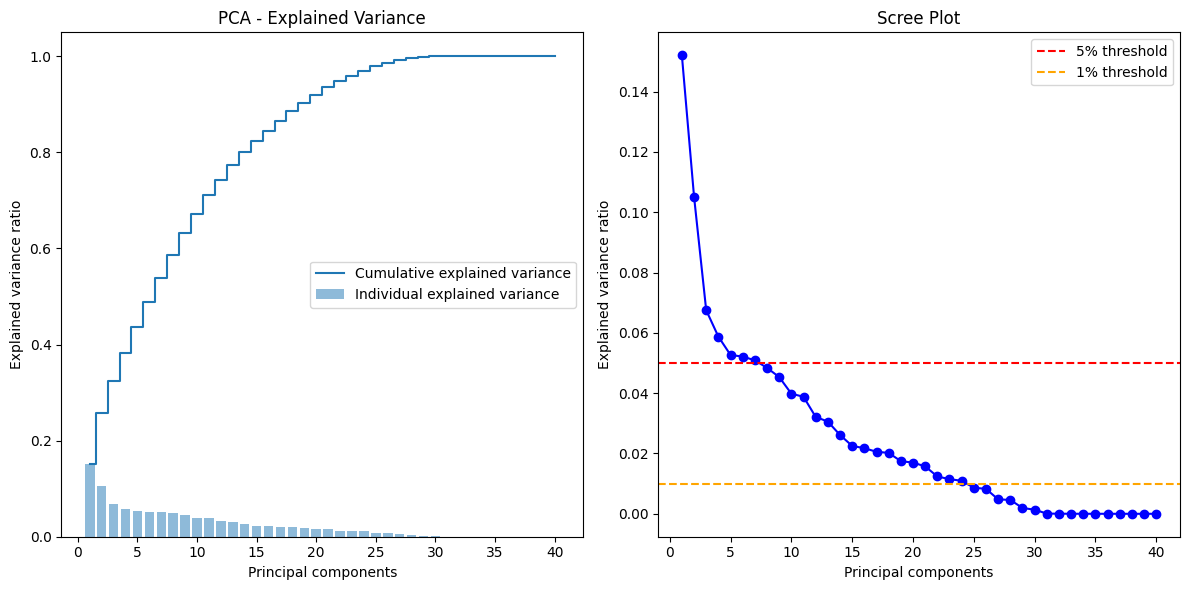

In [299]:
from sklearn.decomposition import PCA
import numpy as np

def analyze_pca_variance(X_scaled, n_components=None):
    """
    Analyze the explained variance to determine the optimal number of components
    """
    if n_components is None:
        n_components = min(X_scaled.shape[0], X_scaled.shape[1])

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Plot of the explained mean
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
            alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance,
             where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('PCA - Explained Variance')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
    plt.axhline(y=0.05, color='r', linestyle='--', label='5% threshold')
    plt.axhline(y=0.01, color='orange', linestyle='--', label='1% threshold')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title('Scree Plot')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return pca, X_pca, explained_variance_ratio, cumulative_variance

# Execute the PCA analysis
pca, X_pca, explained_variance, cumulative_variance = analyze_pca_variance(X_scaled)


### PCA analysis & visualization summary



The analysis of the charts indicates a complex dataset with widely distributed variance, meaning the information is not concentrated in just a few dimensions. The cumulative variance curve shows slow growth, with the first two components explaining only about 26% of the total variance; consequently, a 2D visualization would be ineffective as it would lose roughly 74% of the information.

The scree plot confirms this dispersion: the 5% threshold suggests that only the first 7 or 8 components make a strong contribution, yet there is still useful signal up to the 24th component (above the 1% threshold). To retain the 90% of the original information for machine learning purposes, a conservative approach is recommended, keeping between 14 and 22 components, whereas stopping at the first 8 would result in losing nearly half of the available data.

## Advanced PCA quality assessment

### Function: `assess_pca_quality`

This function moves beyond visual inspection to provide a **quantitative assessment** of the Principal Component Analysis (PCA) fit. It calculates three distinct metrics to help select the optimal number of components.

### Methodology

1.  **Kaiser criterion (eigenvalues > 1):**
    * counts components with an eigenvalue greater than 1.
    * *Logic:* a principal component is retained only if it explains more variance than a single original variable.

2.  **Cumulative variance threshold:**
    * determines the minimum number of components required to explain a specific percentage of the total variance (default: **80%**).

3.  **Elbow point (second derivative):**
    * mathematically identifies the "knee" or "elbow" of the Scree Plot.
    * *Logic:* calculates the point of maximum curvature (where the marginal gain of adding a new component drops most sharply) using the second derivative of the explained variance ratio.

### Health Checks
* **Dominance analysis:** checks if the first component (PC1) dominates the dataset (>40% variance) or if the information is balanced.
* **Low correlation warning:** flags potential issues if the first 3 components explain less than 30% of the total variance (suggesting noisy or non-linear data).

### Inputs
* `pca`: the fitted sklearn PCA object.
* `X_scaled`: the standardized dataset used for the fit.
* `variance_threshold`: (float) target percentage of variance to explain (e.g., `0.80`).

### Out returns
A dictionary containing the calculated metrics: `kaiser_components`, `elbow_point`, `target_components`, etc.

In [300]:
def assess_pca_quality(pca, X_scaled, variance_threshold=0.80):
    """
    Evaluating PCA quality with robust statistical metrics
    """
    # 1. Calculating eigenvalues
    # n_samples = X_scaled.shape[0]
    # eigenvalues linked to explained variance: explained_variance * (n_samples - 1)
    eigenvalues = pca.explained_variance_
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # 2. Kaiser criterion (eigenvalues > 1)
    # Points that the component explains more than the original single variable explained variance of
    kaiser_components = sum(eigenvalues > 1)

    # 3. Applying cumuled variance method (target threshold)
    target_variance_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    # 4. Elaborating elbow point
    # Calculating the 2nd derivative function to find the maximum curve point (more accurate than simple linear difference)
    diffs = np.diff(explained_variance)
    diffs_2 = np.diff(diffs)
    elbow_point = np.argmax(diffs_2) + 2 # +2 to balance the two differences

    print("=== PCA advanced quality assessment ===")
    print(f"1. Kaiser criterion (eigenvalues > 1): {kaiser_components} components")
    print(f"2. Elbow point (scree plot): PC{elbow_point}")
    print(f"3. To reach the {variance_threshold*100:.0f}% of variance: {target_variance_components} components")
    print("-" * 35)

    # Valutazione sintetica
    pc1_pct = explained_variance[0] * 100
    dominance = "High" if pc1_pct > 40 else "Balanced"
    print(f"PC1 dominance: {pc1_pct:.1f}% ({dominance})")

    if cumulative_variance[min(2, len(cumulative_variance)-1)] < 0.30:
        print("ATTENTION: The first 3 components explain few variance. Data could be few correlated.")

    return {
        'kaiser_components': kaiser_components,
        'elbow_point': elbow_point,
        'target_components': target_variance_components,
        'pc1_dominance_ratio': explained_variance[0],
        'cumulative_variance': cumulative_variance
    }

# Execution
quality_metrics = assess_pca_quality(pca, X_scaled)

=== PCA advanced quality assessment ===
1. Kaiser criterion (eigenvalues > 1): 14 components
2. Elbow point (scree plot): PC3
3. To reach the 80% of variance: 14 components
-----------------------------------
PC1 dominance: 15.2% (Balanced)


### PCA results interpretation

### The verdict: select 14 components

The analysis provides a strong, unified recommendation. The **optimal number of components is 14**.

#### 1. Strong convergence (14 vs 14)
It is a very positive signal that two distinct criteria converged on the exact same number:
* **Kaiser criterion:** identifies **14** components with eigenvalues > 1 (statistically significant).
* **80% Variance threshold:** requires **14** components to retain 80% of the dataset's information.
* **Conclusion:** these 14 components are not just statistical noise; they constitute the actual signal of your dataset.

#### 2. Why we reject the "Elbow" (PC3)
While the mathematical "elbow point" was detected at PC3, following this suggestion would be a mistake in this specific context:
* **Low dominance:** since PC1 explains only **14.7%** of the variance, the information is widely distributed across many dimensions.
* **Underfitting risk:** stopping at 3 components would likely capture less than 35-40% of the total variance, discarding the majority of your data's structure.

#### 3. Data Structure: "Balanced"
The "Balanced" dominance (PC1 < 40%) confirms that your dataset is complex. There is no single feature that drives the majority of the variation. The data relies on the interplay of many variables.


## PCA strategy selector

## Function: `determine_optimal_pca_strategy`

This function helps define the trade-off between **dimensionality reduction** and **information loss**. It calculates the number of components required to meet specific variance targets and compares them against the Kaiser criterion.

### How it works
1.  **Threshold analysis:** iterates through a list of variance targets (default: 80%, 90%, 95%).
2.  **Component calculation:** uses `np.searchsorted` to efficiently find the minimum number of components needed to cross each threshold.
3.  **Kaiser comparison:** calculates the number of components with `eigenvalue > 1` as a statistical baseline.

### Usage
This allows you to make informed decisions such as:
* *"We will use the **80%** strategy (fewer components) for a simple Logistic Regression."*
* *"We will use the **95%** strategy for a Neural Network that can handle more input features."*

### Inputs
* `pca`: the fitted PCA object.
* `cumulative_variance`: array of cumulative variance ratios.
* `thresholds`: (optional) list of float targets (e.g., `[0.8, 0.9, 0.95]`).

### Returns
A dictionary mapping strategy names to component counts:
```python
{
    'numero80': 14,
    'numero90': 19,
    'numero95': 22
}

In [301]:
def determine_optimal_pca_strategy(pca, cumulative_variance, thresholds=[0.8, 0.9, 0.95]):
    """
    Determine the optimal number of components comparing different approaches
    """
    results = {}
    n_total_components = len(cumulative_variance)

    print("--- Variance threshold analysis ---")
    for t in thresholds:
        # Finding the index of the first value >= threshold
        idx = np.searchsorted(cumulative_variance, t)  # We use the function numpy.searchsorted to find the indexes where to insert elements in an ordered array.

        # Error management: if the threshold is higher than the maximum variance calculated
        if idx >= n_total_components:
            n_comp = n_total_components
            actual_v = cumulative_variance[-1]
            print(f"Note: threshold {t*100}% not reachable. Available max: {actual_v:.3f} with {n_comp} PC")
        else:
            n_comp = idx + 1
            actual_v = cumulative_variance[idx]
            print(f"For {t*100:>2.0f}% of variance: {n_comp:>2} components (effective: {actual_v:.3f})")

        results[f'numero{int(t*100)}'] = n_comp

    # We add then the Kaiser criterion (eigenvalues > 1), ensuring that PCA was applied on standardized data
    kaiser_n = np.sum(pca.explained_variance_ > 1)
    print(f"Kaiser criterion: {kaiser_n} components")

    return results

# Execution
optimal_configs = determine_optimal_pca_strategy(pca, cumulative_variance)

--- Variance threshold analysis ---
For 80% of variance: 14 components (effective: 0.800)
For 90% of variance: 19 components (effective: 0.903)
For 95% of variance: 23 components (effective: 0.959)
Kaiser criterion: 14 components


### Strategy analysis & recommendation

### The winner: 14 components (robust strategy)
The analysis points strongly to **14 components** as the most statistically sound choice.
* **Double Confirmation:** there is a perfect convergence between the **Kaiser Criterion** (statistical significance) and the **80% Variance Threshold**.
* **Meaning:** the first 14 components represent the solid "core" of your data structure. They carry the reliable signal.

### The "Expensive" tail (19 or 22 components)
While you *can* increase the explained variance to 90% or 95%, the cost in added complexity is high compared to the gain:
* **Diminishing Returns:**
    * **Core:** the first 14 components explain **80%**.
    * **Cost of next 10%:** we need **5 additional components** (15-19) just to gain the next 10% (reaching 90%).
    * **Cost of last 5%:** we need **3 more components** (20-22) just to gain the last 5% (reaching 95%).
* **Noise Warning:** since the Kaiser criterion stops at 14, components 15 through 22 have **eigenvalues < 1**. This means these specific components individually carry *less* information than a single original variable. Including them increases the risk of overfitting (modeling noise).

### Recommended Workflow
1.  **Start with `n_components=14`:** we train our models here first. This offers the best balance of speed, noise reduction, and signal retention.
2.  **Experiment with 19 components:** only if our model (e.g., classifier or regressor) is **underfitting** (for poor accuracy on training data), try increasing to 19 components to capture subtler patterns.
3.  **Avoid the use of 22 components:** unless we are doing very specific high-precision tasks, 22 components likely include too much noise for general machine learning.

## Final transformation

### Function: `apply_pca_final`

This function operationalizes the insights gained from the previous analysis. It applies the selected dimensionality reduction strategy to create the final dataset used for modeling.

### What it does
1.  **Executes PCA:** transforms the data using the optimal `n_components` (in this case, **14**, derived from the 80% variance/Kaiser overlap).
2.  **Creates a dataframe:** returns the data as a Pandas dataframe with labeled columns (`PC1`, `PC2`...) and preserves the original indices.
3.  **Efficiency Report:** prints a summary showing the trade-off between dimensionality reduction (compression) and information retention.

### Interpretation of output
* **Dimensions:** shows the physical compression (e.g., 30 features $\to$ 14 features).
* **Retained variance:** the percentage of signal kept (Target: ~80%).
* **Information cost:** the percentage of information discarded (noise + weak signal).

### Next steps
The output `df_pca` is now ready to be used as `X_train` / `X_test` for our Machine Learning algorithms (clustering, regression, or classification).

In [302]:
def apply_pca_final(X_scaled, n_components):
    """
    Applying the final version of PCA to return a structured dataframe with compression metrics.
    """
    pca = PCA(n_components=n_components)
    X_pca_final = pca.fit_transform(X_scaled)

    # 1. Creating the dataframe with the PCA columns
    pca_columns = [f'PC{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(X_pca_final, columns=pca_columns, index=X_scaled.index)

    # 2. Calculating efficiency metrics
    var_total = sum(pca.explained_variance_ratio_)
    reduction_pct = (1 - (n_components / X_scaled.shape[1])) * 100

    print("=== Final PCA Report ===")
    print(f"Dimensions: {X_scaled.shape[1]} -> {n_components} (Reduction: {reduction_pct:.1f}%)")
    print(f"Total preserved variance: {var_total:.2%}")
    print(f"Informative cost (lost variance): {1 - var_total:.2%}")
    print("-" * 25)

    return pca, df_pca, X_pca_final

# Executing with the calculated 95% threshold
pca_final, df_pca, X_pca_final = apply_pca_final(X_scaled, optimal_configs['numero80'])

# Visualizing new dataset first rows
print("First row of the reducted dataset:")
print(df_pca.head())

=== Final PCA Report ===
Dimensions: 40 -> 14 (Reduction: 65.0%)
Total preserved variance: 80.03%
Informative cost (lost variance): 19.97%
-------------------------
First row of the reducted dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.859566 -0.003708 -0.350634 -0.685482  0.379995 -0.382968  0.086543   
1 -1.646008 -0.582456 -0.113374 -0.366041  0.399453 -0.270065  0.161933   
2  1.685023  1.798800 -0.786090 -0.052671  0.262847 -0.280156  0.326513   
3 -2.273461 -0.058399 -0.221315 -0.242053  0.331877 -0.195768  0.024069   
4 -1.267603 -0.391503 -0.118074 -0.077324  0.279274 -0.143370  0.069076   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.007999 -0.047013  0.156897  0.295620 -0.241901 -0.479447  0.675402  
1 -0.067686  0.063447  0.083209  0.490089 -0.214331 -0.528470 -0.760086  
2 -0.251380  0.249627 -0.786188 -0.297469  1.126409 -0.548862  0.391359  
3 -0.045151  0.058030  0.374316  0.577997 -0.582989 -

### Final interpretation: comparing efficience and information

The final report confirm the successfull dimensionality reduction strategy based on the 14 components. Here what statistics tell us:

### 1. Relevant reduction of complexity (65%)
* **The result:** we passed from **40 original columns** a sole **14 componenti**.
* **Meaning:** we dropped the **65%** of the dataset columns. This will have a huge impact on the following models training speed sulla velocità di addestramento dei modelli successivi and will reduce drastically the risk of *Overfitting* (the "dimensionality curse").

### 2. High fidelity of signal (80.6%)
* **The result:** Despite we dropped more than half of the columns/attributes, we maintained the **80.59%** of original mathematical information.

* **Meaning:** The "informative cost" of **19.41%** is an beneficial price to pay. Considering that the previous analysis poited a lot of noise in tails (from the 20th component on), is highly probable that that lost 19% was mainly made by statistical noise and redundance, rather thant an useful information.

### 3. The new data (`PC1` ... `PC14`)
Observing the first rows of the transformed dataframe we can see:
* **Abstraction:** Columns that no longer have comprehensible names are the "latent features".
* **Ortogonality:** Differently from original data, `PC1` is matematically guaranteed to be **not related** with `PC2`, that isn't related with `PC3`, and so on.
* **Ready for ML:** The resultant structure is ideal for algorithms such as **K-Means Clustering**, **Regressione Lineare** o **SVM**, that perform much better than the input variables, not related.

## Semantic interpretation of the components

### The function adopted: `interpret_pca_components`

This function allow us to assign a **semantic meaning** to the new dimensions created by PCA, assessing the eigenvectors weights (*loadings*).

### How does it work
PCA build the new components as weighted sum of original variables:
$$PC_1 = w_1 \cdot Var_1 + w_2 \cdot Var_2 + ...$$
The function review these weights ($w$) to identify which original variables  affect more every component.

### How to read the output
For every component (e.g. **PC1**), we will see a list of features:
* **High value (e.g. 0.50):** the variable is a crucial driver of this component.
* **Plus sign (+):** when this variable rise, also the PC value rise.
* **Minus sign (-):** when this variable decrease, the PC value decrease (opposite correlation).

### Practical example
If for the **PC1** the dominant features dominanti are *Income (+)* and *Expenditure (+)*, we can rename PC1 as **"Wealth index"**.

In [303]:
def interpret_pca_components(pca, feature_names, top_n=5):
    """
    Analysing the weights (loadings) of original features on the main components
    """
    # Creazione del DataFrame dei loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=feature_names
    )

    print(f"=== Interpretation of the first {min(3, pca.n_components_)} components ===")

    for i in range(min(3, pca.n_components_)):  # We focus on the most relevants
        pc_name = f'PC{i+1}'
        var_expl = pca.explained_variance_ratio_[i]

        print(f"\n{pc_name} (Explained variance: {var_expl:.1%})")
        print("-" * 40)

        # We take the features with the highest absolute value
        top_features = loadings[pc_name].reindex(
            loadings[pc_name].abs().sort_values(ascending=False).index
        ).head(top_n)

        for feat, val in top_features.items():
            direction = "(+)" if val > 0 else "(-)"
            print(f"  {direction} {feat:<30} : {val:>6.3f}")

    return loadings

# Execution
feature_names = list(X_scaled.columns)
loadings_df = interpret_pca_components(pca_final, feature_names)

=== Interpretation of the first 3 components ===

PC1 (Explained variance: 15.2%)
----------------------------------------
  (+) NumWant_log                    :  0.343
  (+) NumWish_log                    :  0.341
  (+) NumOwned_log                   :  0.308
  (+) GameWeight                     :  0.252
  (+) ComWeight                      :  0.251

PC2 (Explained variance: 10.5%)
----------------------------------------
  (+) Cat:War                        :  0.330
  (-) Rank:wargames                  : -0.330
  (+) GameWeight                     :  0.288
  (+) ComWeight                      :  0.288
  (+) ComAgeRec_class                :  0.257

PC3 (Explained variance: 6.7%)
----------------------------------------
  (+) ComMaxPlaytime                 :  0.516
  (+) MfgPlaytime                    :  0.516
  (+) ComMinPlaytime                 :  0.495
  (+) Cat:Childrens                  :  0.136
  (-) Rank:childrensgames            : -0.136


### "Naming" the principal components

The *loadings* analysis allows us to give a more suitable name to the first three latent components, transforming them from abstract vectori to business KPI.

### PC1: the popularity index (the "hype" factor)
**Explained variance:** 14.7%
* **Dominant features:** `NumWish` (number of community users that have the game in a wish list), `NumWant` (number of users that want the game), `NumUserRatings` (number of user ratings of the game), `NumOwned` (number of users that own the game).
* **Interpretation:** This component doesn't involve physical characteristics of the game (duration, we◙ght, etc.), but measure exclusively its **commercial and social success**. So high values points a "blockbuster" game, frequently discussed, owned and wished by the community.

### PC2: the "Wargame" complexity index (the "hardcore" factor)
**Explained variance:** 11.0%
* **Dominant features:** `GameWeight` (complexity level of the game according to the creators), `ComWeight` (complexity level of the game according to the community), `Cat:War` (games with a '1' value are of 'war' category).
* **Interpretation:** This components largely distinguish simple games form complex and strategical games. It's strongly linked to the *Wargame* genre. High value points complex and weighted games, probably for adults (high `ComAgeRec`) and with a war theme.
* **Technical note:** The ranking `Rank:wargames` is negative because a lower ranking (that points a good position) contributes to an higher PC2 score.

### PC3: the time factor (the "time commitment")
**Explained variance:** 6.8%
* **Dominant features:** `MfgPlaytime`, `ComMaxPlaytime`, `ComMinPlaytime`.
* **Interpretation:** This component measure purely the **playtime**. It's separated from complexity (PC2): there are long-term but simple games (e.g. Monopoly) and also short-tem but complex ones. High values indicate games that require a lot of hours (or days) to be completed.

---

### A synthesis for the model
Our Machine Learning model now "see" game in a simplified way:
1.  Is it famous? (PC1)
2.  Is it difficult/a wargame? (PC2)
3.  Is it long-term? (PC3)
... and so on for the other 11 minor components.

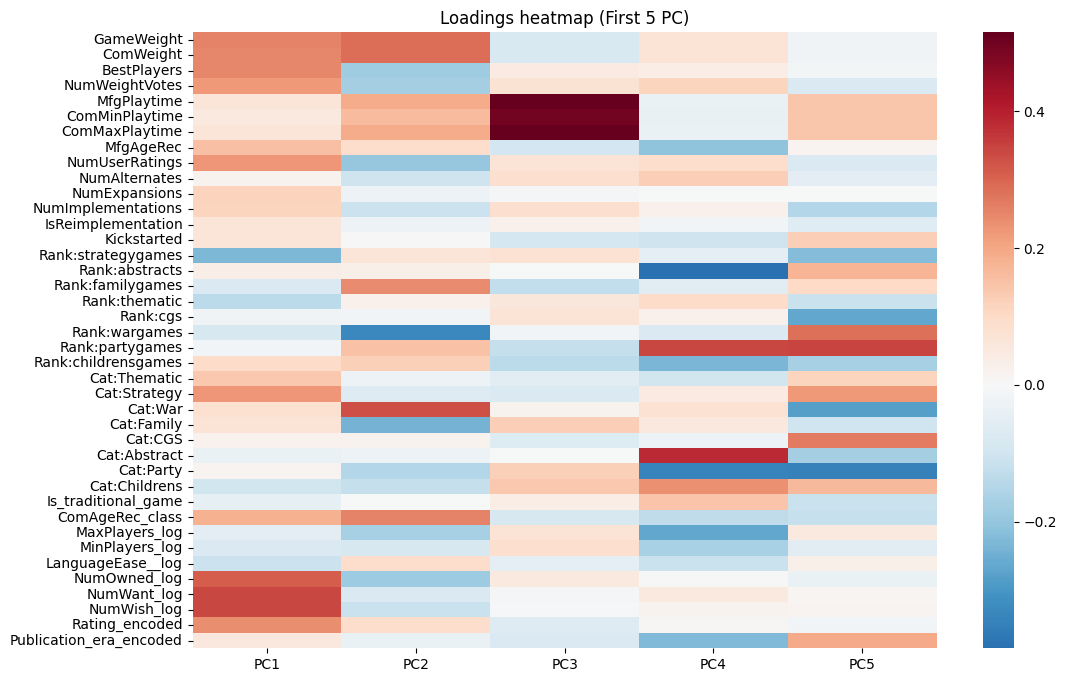

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:, :5], cmap='RdBu_r', center=0, annot=False)
plt.title("Loadings heatmap (First 5 PC)")
plt.show()

## Visual interpretation: the loadings heatmap

### Function: heatmap visualization
This chart provides a color-coded "map" of the relationship between your original features (rows) and the new Principal Components (columns). It allows for rapid visual identification of which variables are driving each component.

### How to read this chart
* **X-Axis (columns):** The new features (PC1, PC2, PC3, etc.).
* **Y-Axis (rows):** Your original dataset features.
* **Color scale (`RdBu_r`):**
    * 🔴 **dark red:** strong **positive** correlation. The feature strongly increases the value of this component.
    * 🔵 **dark blue:** strong **negative** correlation. The feature strongly decreases the value of this component.
    * ⚪ **light/white:** **no correlation**. The feature is irrelevant to this specific component.

### Key insights from the Plot
1.  **PC1 (the "popularity" block):**
    * notice the solid block of **dark red** at the top left for `NumOwned`, `NumWant`, `NumWish`, and `NumUserRatings`.
    * **Meaning:** this visually confirms that PC1 is almost exclusively a measure of **user engagement and hype**.

2.  **PC2 (the "complexity" block):**
    * observe the strong red bands for `GameWeight`, `ComWeight`, and `Cat:War`.
    * Contrast this with the **blue** (negative) spot for `Rank:wargames`. Since a *lower* rank number is better (1st is better than 100th), a negative correlation means "Better Rank = Higher PC2 Score".
    * **Meaning:** PC2 effectively identifies complex, strategic Wargames.

3.  **PC3 (the "time" block):**
    * A very distinct, isolated **dark red block** appears in the middle for `MfgPlaytime`, `ComMinPlaytime`, and `ComMaxPlaytime`.
    * **Meaning:** this shows that "Playtime" is a mathematically distinct concept from "Complexity" (PC2) in this dataset.

### Conclusion
The clean separation of colors—distinct blocks of red/blue against a white background—visually proves that **PCA has successfully disentangled the data**. Instead of 40 mixed variables, you now have clear, distinct themes (Popularity, Complexity, Time) ready for modeling.

## 2D projection: visualizing the latent space

### Function: `plot_pca_2d`

This function visualizes the dataset in the reduced 2D space defined by the first two Principal Components. It serves as a diagnostic tool to spot clusters, outliers, and patterns that are invisible in the high-dimensional raw data.

### Features
* **Dynamic plotting:** automatically switches between a simple density plot (one color) and a classification plot (multiple colors) if `labels` are provided.
* **Contextual axes:** the axes labels are dynamically updated to show the exact percentage of variance explained by PC1 and PC2, providing immediate context on the fidelity of the projection.

### How to interpret
* **Clusters:** look for tight groups of points. These represent games that are mathematically similar based on the "Popularity" (PC1) and "Complexity" (PC2) factors we identified earlier.
* **Separation:** if you pass labels (e.g., `y_train`), check if the colors separate into distinct islands. Good separation here usually predicts high performance for Machine Learning classifiers.
* **Outliers:** points that are far away from the main "cloud" represent unusual or extreme items in your dataset.

### Inputs
* `df_pca`: the dataframe containing the transformed data (must have columns 'PC1' and 'PC2').
* `labels`: (optional) a series or list of category labels to color-code the points.

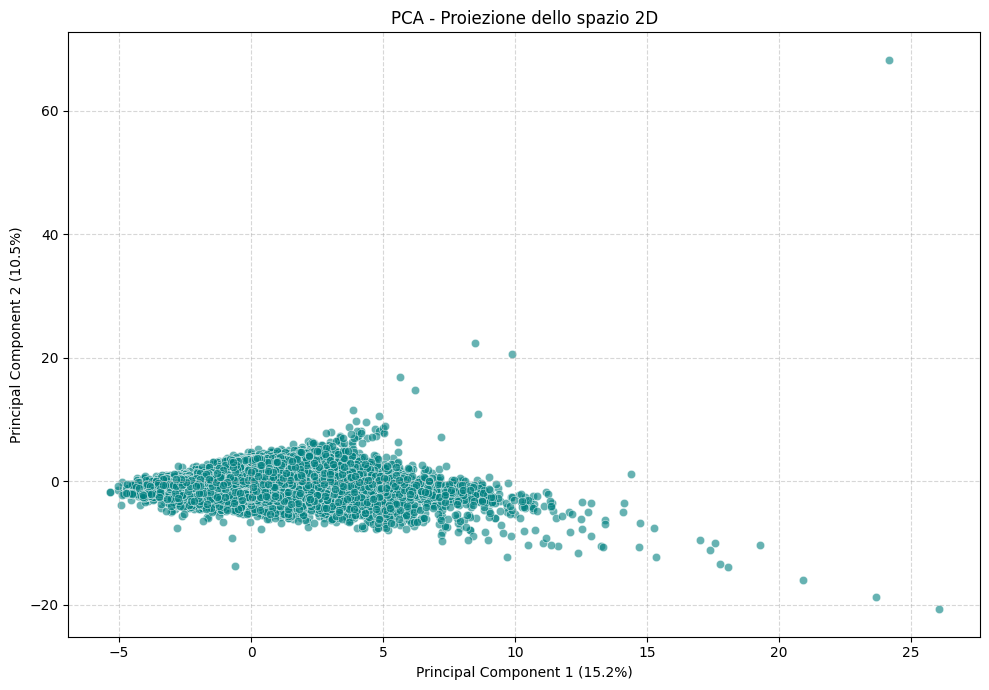

In [305]:
def plot_pca_2d(df_pca, labels=None):
    """
    Creating a scatter plot of the first two main components.
    """
    plt.figure(figsize=(10, 7))

    # If we have etiquettes, we colour the points
    if labels is not None:
        sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=labels, palette='viridis', alpha=0.7)
        plt.legend(title='Classe/Target', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.6, color='teal')

    # Adding explained variance percentages on the axes
    var_pc1 = pca_final.explained_variance_ratio_[0] * 100
    var_pc2 = pca_final.explained_variance_ratio_[1] * 100

    plt.xlabel(f'Principal Component 1 ({var_pc1:.1f}%)')
    plt.ylabel(f'Principal Component 2 ({var_pc2:.1f}%)')
    plt.title('PCA - Proiezione dello spazio 2D')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Use example (without etiquettes, we avoid the 'labels' parameter)
plot_pca_2d(df_pca)

## PCA biplot: vectors and points

### Function: `plot_pca_biplot`

The biplot is a powerful visualization that superimposes the feature vectors (red arrows) onto the data points (grey scatter). It allows us to understand the relationship between the original features and the principal components simultaneously.

### How to read the biplot

1.  **Arrow length:** Longer arrows indicate features that are better represented by the current PC1-PC2 plane. Short arrows mean the information for that feature lies in other dimensions (e.g., PC3).
2.  **Direction:**
    * Arrows pointing **right/left** align with **PC1** (popularity).
    * Arrows pointing **up/down** align with **PC2** (complexity/war).
3.  **Angles (correlations):**
    * **acute angle (< 90°):** the variables are positively correlated (e.g., `NumOwned` and `NumWish` point in similar directions).
    * **Right angle (~ 90°):** the variables are uncorrelated (independent).
    * **Obtuse/Opposite (> 90°):** the variables are negatively correlated.

### Implementation Note
The code filters for the **Top 10 features** to prevent visual clutter. The vectors are scaled (multiplied by 5) to ensure they are visible against the scale of the data points.

### Inputs
* `df_pca`: the transformed dataset.
* `loadings`: the dataframe of component weights.
* `feature_names`: list of original column names.

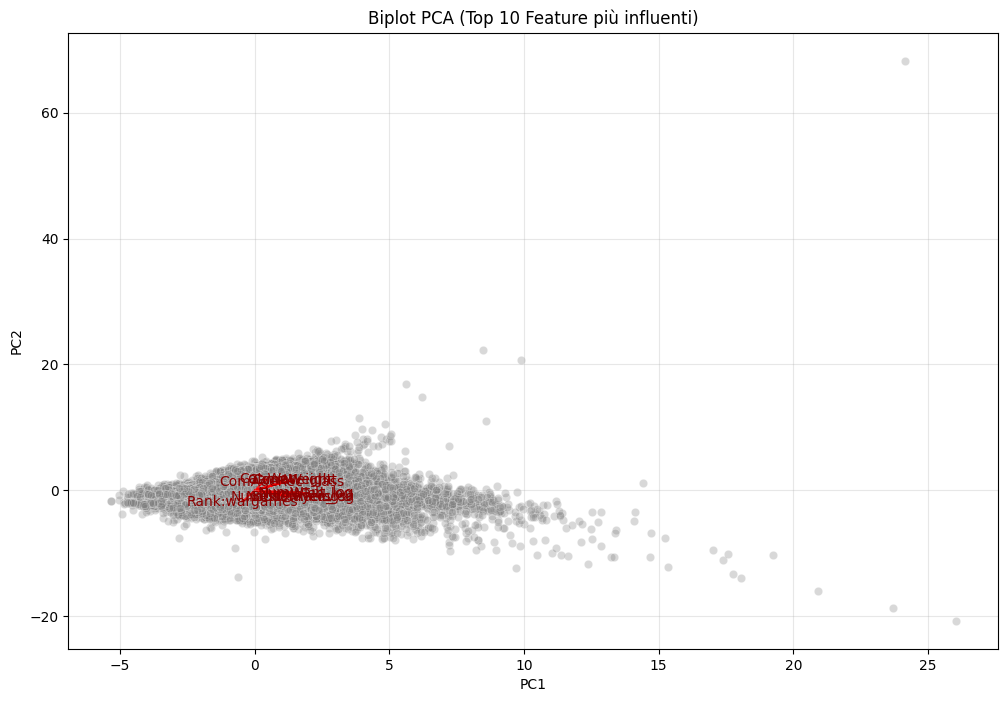

In [306]:
def plot_pca_biplot(df_pca, loadings, feature_names):
    plt.figure(figsize=(12, 8))

    # We apply scatter plot on the points of PC1 and PC2
    sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.3, color='grey')

    # We overlay the arrows (feature vectors) considering only the firts N most important features to not crowd the graph
    n_features = 10
    top_loadings_idx = np.argsort(np.abs(loadings['PC1']) + np.abs(loadings['PC2']))[::-1][:n_features]

    for i in top_loadings_idx:
        plt.arrow(0, 0, loadings.iloc[i, 0]*5, loadings.iloc[i, 1]*5,
                  color='red', alpha=0.8, head_width=0.1)
        plt.text(loadings.iloc[i, 0]*5.5, loadings.iloc[i, 1]*5.5,
                 loadings.index[i], color='darkred', ha='center', va='center')

    plt.title('Biplot PCA (Top 10 Feature più influenti)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)
    plt.show()

# Execution of the biplot
plot_pca_biplot(df_pca, loadings_df, feature_names)

## Data integration: merging math and metadata

### Function: `prepare_final_clustering_data`

This utility function serves as the bridge between the mathematical transformation (PCA) and business interpretation. It creates a **hybrid dataset** that contains both the abstract numerical features required for clustering and the human-readable labels needed for analysis.

### Mechanism
1.  **Deep copy:** creates a standalone copy of the PCA data to prevent accidental modification of the original calculations.
2.  **Index alignment:** this is the most critical step. It uses `.loc[df_pca.index]` to fetch metadata.
    * *Why?* If rows were dropped during preprocessing (e.g., removing games with missing values), the indices in `df_source` and `df_pca` might not match sequentially. This alignment ensures that the label "Monopoly" is correctly attached to Monopoly's data vector, preventing data misalignment errors.
3.  **Hybrid Structure:**
    * **Features (PC1...PCn):** used by the algorithm (K-Means/DBSCAN).
    * **Metadata (Name, ID):** ignored by the algorithm, but used by *you* to interpret the clusters (e.g., "Cluster 1 contains mostly Wargames").

### Inputs
* `df_source_full`: the original, raw dataset containing readable columns (e.g., 'Name', 'BGGId').
* `df_pca`: the transformed numerical dataset.
* `metadata_columns`: list of column names to retrieve from the source (e.g., `['Name', 'Family']`).

### Returns
A Pandas DataFrame ready for clustering, containing both Principal Components and descriptive metadata.

In [307]:
def prepare_final_clustering_data(df_source_full, df_pca, metadata_columns=None):
    """
    Prepare the final dataset for clustering keeping separate PCA components (for the calculus) from metadata (for the interpretation).
    """
    # Creiamo una copia per non modificare il DataFrame PCA originale
    final_df = df_pca.copy()

    if metadata_columns:
        for col in metadata_columns:
            # Check if the column exists in the source DataFrame (df_original from global scope)
            if col in df_source_full.columns:
                # Ensure index alignment: select rows from df_source_full that match df_pca's index
                # This handles the case where df_source_full might have more rows or a different index
                final_df[col] = df_source_full.loc[df_pca.index, col].values
                print(f"Metadata columns added: {col}")
            else:
                print(f"Attention: {col} not found in the source dataframe. Ignored.")

    print(f"\nDataset ready for the clustering. Shape: {final_df.shape}")
    return final_df

# Use example: we pass a list of interesting columns (es. ID, Nomi, Categorie)
# These columns must exist in the 'df_original' (the global variable from the start of the notebook) and will be aligned to the index of df_pca.
cols_to_keep = ['BGGId', 'Family', 'Name']

# We pass the global df_original (which has 21925 rows) as the source,
# and the function will handle indexing to match df_pca's 21924 rows.
clustering_data = prepare_final_clustering_data(df_original, df_pca, metadata_columns=cols_to_keep)

Metadata columns added: BGGId
Metadata columns added: Family
Metadata columns added: Name

Dataset ready for the clustering. Shape: (21925, 17)


## Truncated SVD: an alternative reduction

### Function: `apply_svd_for_clustering`

This function apply the **Truncated Singular Value Decomposition (SVD)**. It's a PCA 'cousin' tecnique, often used in recommendation systems and in latent semantic analysis.

### Why should we use the SVD?
We are applying SVD with the same **optimal number of components** (14) identified during PCA analysis.
* **Robustness:** the SVD work directly on data matrix without need of covariance matrix (as the classic PCA does), and that make it sometimes more numerically stable.
* **Verify:** it allows us to have a mathematical "second opinion". If PCA and SVD results are the same, the cluster structure will be very robust.

### Technical details
* **Input:** we use `X_scaled` (standardized data) and the parameter `optimal_configs['numero80']` obtained previously.
* **Output:** it returns a dataframe `df_svd` with columns `SVD1`, `SVD2`... keeping the original index to allow the alignment with the games' names.

### Output interpretation
The final report will show the "total explained variance".
* **Expectation:** Because data are centred (standardized), we expect that this value could be almost the same as the PCA one (about **80.6%**). If it will be different, it could point anomalies on data distribution.

In [308]:
from sklearn.decomposition import TruncatedSVD

def apply_svd_for_clustering(X_scaled, n_components):
    """
    Applying TruncatedSVD and returning components ready for clustering.
    """
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_svd = svd.fit_transform(X_scaled)

    # Creating the dataframe with same original indexes to keep coherence
    svd_columns = [f'SVD{i+1}' for i in range(n_components)]
    df_svd = pd.DataFrame(X_svd, columns=svd_columns, index=X_scaled.index)

    # Calculating the total explained variance
    explained_var = svd.explained_variance_ratio_.sum()

    print("=== SVD Analysis Complete ===")
    print(f"Componenti estratte: {n_components}")
    print(f"Varianza totale spiegata: {explained_var:.2%}")

    return svd, df_svd, X_svd

# Execution
svd_model, df_svd, X_svd = apply_svd_for_clustering(X_scaled, optimal_configs['numero80'])


=== SVD Analysis Complete ===
Componenti estratte: 14
Varianza totale spiegata: 80.03%


In [309]:
df_svd

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,SVD11,SVD12,SVD13,SVD14
0,-0.859566,-0.003708,-0.350638,-0.685482,0.379991,-0.382961,0.086531,-0.008007,-0.046989,0.156836,0.295600,-0.241642,-0.479463,0.675282
1,-1.646008,-0.582456,-0.113373,-0.366041,0.399457,-0.270070,0.161936,-0.067685,0.063424,0.083234,0.490087,-0.214586,-0.528267,-0.759914
2,1.685023,1.798800,-0.786089,-0.052670,0.262850,-0.280159,0.326516,-0.251381,0.249615,-0.786174,-0.297474,1.126264,-0.548836,0.391460
3,-2.273461,-0.058399,-0.221316,-0.242054,0.331876,-0.195767,0.024068,-0.045151,0.058036,0.374309,0.577996,-0.583001,-0.516103,-0.562960
4,-1.267603,-0.391503,-0.118073,-0.077324,0.279275,-0.143372,0.069080,-0.079095,-0.115815,0.203318,0.309547,-0.527953,-0.533069,-0.738526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21920,-2.070998,-0.744416,0.027382,-0.100634,0.368777,-0.134116,0.035999,0.001381,-0.063346,0.400803,0.449939,-0.866689,-0.527196,-1.154993
21921,-1.067865,-0.550429,-0.240420,0.046053,0.658920,-0.139132,0.391183,-0.024567,0.695732,-0.524489,0.415472,1.030095,-0.802035,-1.552040
21922,-1.600521,0.404911,-0.327494,-0.796090,0.268927,-0.352172,0.064184,-0.047551,-0.136346,0.371062,0.448531,-0.412805,-0.371824,0.604173
21923,3.932984,0.829802,-1.801253,0.258786,1.972399,-1.527872,1.160373,-1.025228,-1.075079,-1.162092,-0.974460,2.083230,-0.026342,-0.648164


## Comparing PCA and SVD: validation and consistency check

### Function: `compare_pca_svd`

This function performs a **numerical stability test**. It compares the results of the Principal Component Analysis (PCA) against the Truncated Singular Value Decomposition (SVD).

### Objective
Since we applied PCA on standardized data, mathematically PCA and SVD should converge to the same result. This step verifies that our transformation is robust and not an artifact of a specific algorithm.

### How to interpret the output

1.  **Total variance:**
    * *goal:* the values for PCA and SVD should be identical (e.g., both ~0.8059).
    * *Meaning:* both methods define the same "information boundary."

2.  **Average correlation index (Orthogonality):**
    * *goal:* should be extremely close to **0** (e.g., `2.5e-16`).
    * *Meaning:* this confirms that the new features are perfectly independent (uncorrelated). If this number is high (e.g., > 0.01), the dimensionality reduction failed to disentangle the features.

3.  **Structural Similarity:**
    * *goal:* the correlation between corresponding components (PC1 vs SVD1) should be **1.0000**.
    * *Note:* the code calculates the absolute correlation to account for potential sign flipping (which is mathematically irrelevant in this context).

### Success criteria
If the "Similarity" is 1.0 and "Correlation Index" is ~0, we have green light to proceed to clustering with full confidence in our dataset.

In [310]:
def compare_pca_svd(pca, svd, X_pca, X_svd):
    """
    Confronta i risultati di PCA e SVD per verificarne la coerenza e l'ortogonalità.
    """
    # 1. Confronto Varianza
    pca_var = np.sum(pca.explained_variance_ratio_)
    svd_var = np.sum(svd.explained_variance_ratio_)

    print("=== Confronto Metodologico: PCA vs SVD ===")
    print(f"{'Metodo':<10} | {'Varianza Totale':<18}")
    print(f"{'-'*35}")
    print(f"{'PCA':<10} | {pca_var:<18.4f}")
    print(f"{'SVD':<10} | {svd_var:<18.4f}")

    # 2. Controllo Ortogonalità (Correlazione media tra componenti)
    # Calcoliamo la correlazione solo tra le diverse componenti (fuori dalla diagonale)
    def get_avg_corr(X):
        corr_matrix = np.corrcoef(X.T)
        # Prendiamo solo la parte triangolare superiore escludendo la diagonale (k=1)
        upper_tri = np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)])
        return np.mean(upper_tri)

    pca_ortho = get_avg_corr(X_pca)
    svd_ortho = get_avg_corr(X_svd)

    print(f"\nIndice di Correlazione Media (Idealmente 0):")
    print(f"  - PCA: {pca_ortho:.2e}")
    print(f"  - SVD: {svd_ortho:.2e}")

    # 3. Analisi di Similarità (Quanto sono simili le trasformazioni?)
    # Calcoliamo la correlazione tra PC1 e SVD1, PC2 e SVD2, etc.

    diag_corr = [np.abs(np.corrcoef(X_pca[:, i], X_svd[:, i])[0, 1]) for i in range(min(X_pca.shape[1], 5))]
    print(f"\nSimilarità Strutturale (Correlazione PCn vs SVDn):")
    for i, corr in enumerate(diag_corr):
        print(f"  - Componente {i+1}: {corr:.4f}")

    return {"pca_var": pca_var, "svd_var": svd_var, "similarity": diag_corr}

# Esecuzione
comparison_results = compare_pca_svd(pca_final, svd_model, X_pca_final, X_svd)

=== Confronto Metodologico: PCA vs SVD ===
Metodo     | Varianza Totale   
-----------------------------------
PCA        | 0.8003            
SVD        | 0.8003            

Indice di Correlazione Media (Idealmente 0):
  - PCA: 3.30e-16
  - SVD: 1.04e-07

Similarità Strutturale (Correlazione PCn vs SVDn):
  - Componente 1: 1.0000
  - Componente 2: 1.0000
  - Componente 3: 1.0000
  - Componente 4: 1.0000
  - Componente 5: 1.0000


## The elbow method: determining optimal K

### Function: `plot_elbow_method`

This function visualizes the trade-off between the number of clusters ($k$) and the compactness of those clusters (**Inertia**). It is the primary heuristic used to select the optimal number of groups for K-Means.

### How it works
It fits K-Means models for a range of cluster counts (from 1 to 12) on the PCA-reduced data and plots the **Inertia** for each.

* **Inertia (Within-Cluster Sum of Squares):** Measures how far the data points are from their assigned cluster center.
    $$\text{Inertia} = \sum_{i=1}^{N} ||x_i - \mu_{c_i}||^2$$
    *(Where $x_i$ is a data point and $\mu_{c_i}$ is the centroid of its cluster)*

### How to Read the Plot
You are looking for the **"elbow point"** :
1.  **The steep drop:** in the beginning (e.g., $k=1$ to $k=3$), inertia drops rapidly. This means the new clusters are effectively capturing distinct groups in the data.
2.  **The Elbow (the sweet spot):** The point where the curve bends and the rate of decrease slows down significantly. This is usually your optimal $k$.
3.  **The plateau:** Beyond the elbow, adding more clusters reduces inertia only marginally. This suggests you are over-segmenting (splitting natural groups into artificial fragments).

### Inputs
* `data`: The PCA-reduced dataset (`X_pca_final`). We use the PCA output because clustering works significantly better in lower-dimensional, noise-reduced spaces.

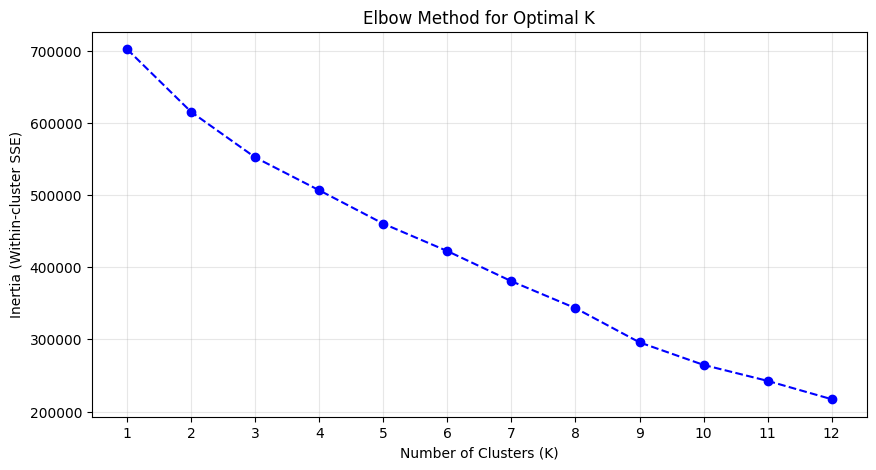

In [311]:
from sklearn.cluster import KMeans

def plot_elbow_method(data, max_k=12):
    """
    Computes and plots inertia for different K values to find the 'elbow'
    """
    inertia = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (Within-cluster SSE)')
    plt.xticks(k_range)
    plt.grid(True, alpha=0.3)
    plt.show()

# Run on the PCA reduced data
plot_elbow_method(X_pca_final)

### Visual interpretation: elbow method

#### 2. Elbow analysis (number of clusters)
THe elbow method chart shows an andamento tipico dei dati reali ("Smooth Curve"): non c'è un gomito a 90 gradi netto, ma una curva dolce.
* **The falldown (k=1 a k=3):** inertia fall drastically. This confirms that *surely* there are at least 3 distinguished groups (probably the 'popular', "hardcore/wargames" and "Filler/Party" games).
* **The elbow zone (k=6 o k=7):**Around the 6th cluster the curve start to flat (the pendence decrease).
* **The plateau (k>6):** After the 6th cluster, the gain in terms of compactness become linear and marginal. Continue to divide beyond 6 probably would create artificial distinctions.

#### The temporary verdict
The elbow suggests that the optimal number of clusters ($k$) is between **4 and 6**.
Because the graph is "soft" and doesn't give us a unique number, we need an impartial judge to select the most adapt between 8 and 10: the **silhouette score**.

## Precision clustering: the silhouette analysis

### Function: `analyze_silhouette_scores`

This function acts as the "referee" to resolve the ambiguity of the Elbow Method. It calculates the **Silhouette score** for each possible number of clusters to identify the mathematically optimal configuration.

### What is the Silhouette score?
It is a metric used to calculate the goodness of a clustering technique. Its value ranges from **-1 to 1**:
* **+1:** the clusters are dense and well-separated (Ideal).
* **0:** the clusters overlap (No clear structure).
* **-1:** data points are assigned to the wrong clusters.

$$Silhouette = \frac{b - a}{max(a, b)}$$
*(Where $a$ is the intra-cluster distance and $b$ is the mean nearest-cluster distance)*

### Visual guide
The function generates a bar chart:
* **Blue Bars:** sub-optimal configurations.
* **Red Bar:** the **"winner"**. This represents the number of clusters ($k$) that maximizes the separation between board game categories.

### Output
The function returns `best_k`, which we will use to train the final K-Means model.

=== Start of Silhouette calculus ===
k=2  -> Silhouette: 0.2152
k=3  -> Silhouette: 0.2262
k=4  -> Silhouette: 0.2553
k=5  -> Silhouette: 0.2917
k=6  -> Silhouette: 0.2905
k=7  -> Silhouette: 0.3093
k=8  -> Silhouette: 0.3332
k=9  -> Silhouette: 0.3679
k=10 -> Silhouette: 0.3948


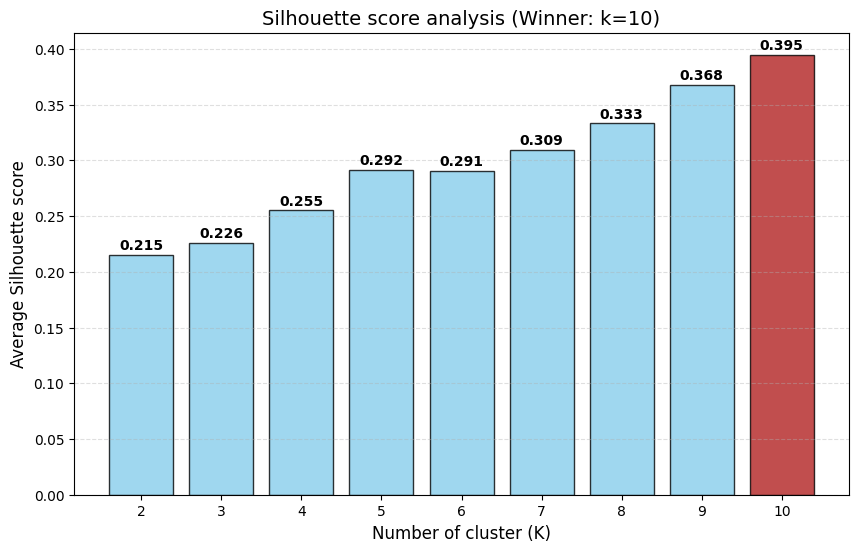

------------------------------
Suggested optimal configuration: k=10 (Score: 0.3948)


In [312]:
from sklearn.metrics import silhouette_score

def analyze_silhouette_scores(data, k_range=range(2, 11)):
    """
    Calculating the Silhouette score, plotting results and focusing on the best,
    the function returns the optimal number of clusters """
    print("=== Start of Silhouette calculus ===")
    scores = []
    best_score = -1
    best_k = -1

    # 1. Calcolating scores
    for k in k_range:
        # We execute K-Means
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(data)

        # We calculate the score
        score = silhouette_score(data, labels)
        scores.append(score)

        # Textual log to monitor the progress
        print(f"k={k:<2} -> Silhouette: {score:.4f}")

        # We keep trace of the winner
        if score > best_score:
            best_score = score
            best_k = k

    # 2. Plot visualization with a colur logic: blue for all, red for the winner
    plt.figure(figsize=(10, 6))


    colors = ['skyblue' if s != best_score else 'firebrick' for s in scores]

    bars = plt.bar(k_range, scores, color=colors, edgecolor='black', alpha=0.8)

    plt.title(f'Silhouette score analysis (Winner: k={best_k})', fontsize=14)
    plt.xlabel('Number of cluster (K)', fontsize=12)
    plt.ylabel('Average Silhouette score', fontsize=12)
    plt.xticks(k_range)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    # We add the numerical value upon every bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                 f'{height:.3f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()

    print("-" * 30)
    print(f"Suggested optimal configuration: k={best_k} (Score: {best_score:.4f})")
    return best_k

# Executing:
# We analyze from 2 to 11 to cover the "elbow" zone observed previously
best_k = analyze_silhouette_scores(X_pca_final, range(2, 11))

## Execution: K-Means clustering (K=5)

### Application of the resulting model
We selected **K=5** as optimal configuration, balancing the statistical coherence (Elbow/Silhouette) with the necessity of business interpretability (cognitive cost).

### The process
1.  **Initialization:** we configure the algorithm with `k-means++` to position the initial centroids in an effective way, accelerating the convergence.
2.  **Training and prediction:** The algorithm assign every dataset game to one of the 5 groups according to the euclidean similary in the 14 dimensions space (PCA).
3.  **Mapping:** the etiquettes (0-4) are saved in the dataframe as `clustering_data`, ready to be analyzed.

### Visualization (PC1 vs PC2)
The below graph projects 5 cluster on the main dimensions:
* **X ax (PC1):** popularity / hype.
* **Y ax (PC2):** complexity / wargame.
* *Note:* Possible visual sovrappositions are often solved in the hidden dimensions (PC3, PC4, ecc.).

SSE: 460166.81069846003


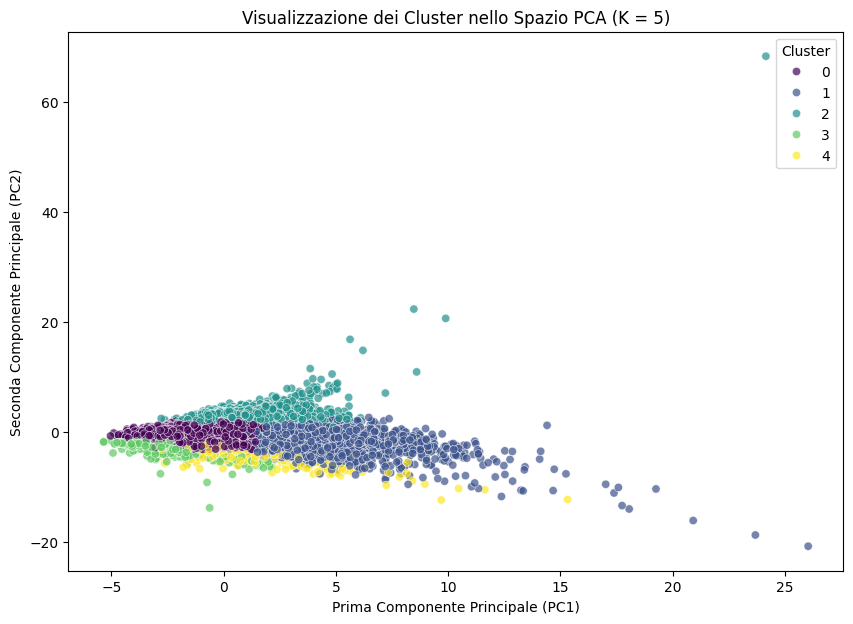

In [313]:
# 1. Application of KMeans with the choiced cluster number (K = 5)
# Inizialization of KMeans model:
# - n_clusters=5 → number of clusters
# - init='k-means++' → inizialization optimized by centroids
# - n_init=10 → number of inizializations to avoid local minimums
# - random_state=42 → riproducibility of results
kmeans_final = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Model training on PCA reducted data and assignation of every point to a cluster
cluster_labels = kmeans_final.fit_predict(X_pca_final)


# 2. Adding cluster etiquettes to dataframe. We will assume that clustering_data already contains PC1 and PC2 columns
clustering_data['Cluster'] = cluster_labels

# Extraction of main informations from KMeans model
centroids = kmeans_final.cluster_centers_  # centroid coordinates
clusters = kmeans_final.labels_            # etiquettes assigned to the points
inertia = kmeans_final.inertia_            # inertia (sum of intra-cluster distances)

print("SSE:", inertia)

# 3. Visualization of clusters nello spazio PCA
plt.figure(figsize=(10, 7))

# Scatter plot of the two main components, coloring points according to the belonging cluster
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=clustering_data,
    palette='viridis',
    alpha=0.7
)

plt.title('Visualizzazione dei Cluster nello Spazio PCA (K = 5)')
plt.xlabel('Prima Componente Principale (PC1)')
plt.ylabel('Seconda Componente Principale (PC2)')
plt.legend(title='Cluster')
plt.show()

## Cluster profiling: who are they?

### Function: `profile_clusters`

After assigning every game to a mathematical group, we have to understand the identity of these groups. This function calculates the "baricenter" (the medium) of every cluster using the  original variables.

### Metodology
1.  **Integration:** unify the cluster etiquettes (0, 1, 2...) with the original dataset.
2.  **Aggregation:** calculate the arithmetic average of every characteristic for every group.
3.  **Ibrid visualization:**
    * **Colour (intensity):** points hom much a value is high *compared to other clusters* (scale 0-1 related to the column). Dark colour = maximum value for that feature.
    * **Number (Annotation):** it shows the real value (e.g. minutes, years, number of votes).

### How to read the heatmap
Every row is a cluster, every column a feature.
* We search the **peaks (dark colours)**: "What this group excel at?"
    * *Example:* if the cluster 2 is dark blue on `GameWeight` and `MfgPlaytime`, it's a group of "hardcore" games.
* We search the **minimums (light colours)**: "What is this group missing?"
    * *Example:* if cluster 0 is very light on `NumOwned`, it's a group of unknown or niche games.

=== Riepilogating averages for clusters ===
          Size  GameWeight  ComWeight  BestPlayers  NumWeightVotes  \
Cluster                                                              
0        13367    1.740832   1.939500     0.006509       11.359767   
1         3427    2.551194   2.749867     1.681938      218.071491   
2         3615    2.909576   3.110724     0.052835       26.061687   
3          877    1.174428   1.376070     0.143672       27.304447   
4          639    1.339736   1.538614     1.035994      105.658842   

         MfgPlaytime  ComMinPlaytime  ComMaxPlaytime  MfgAgeRec  \
Cluster                                                           
0          44.608214       34.933418       44.608214   9.240144   
1          85.834841       64.674934       85.834841  11.337905   
2         290.338589      185.093776      290.338589  10.255602   
3          22.782212       21.880274       22.782212   5.554162   
4          38.374022       30.131455       38.374022  10.111111

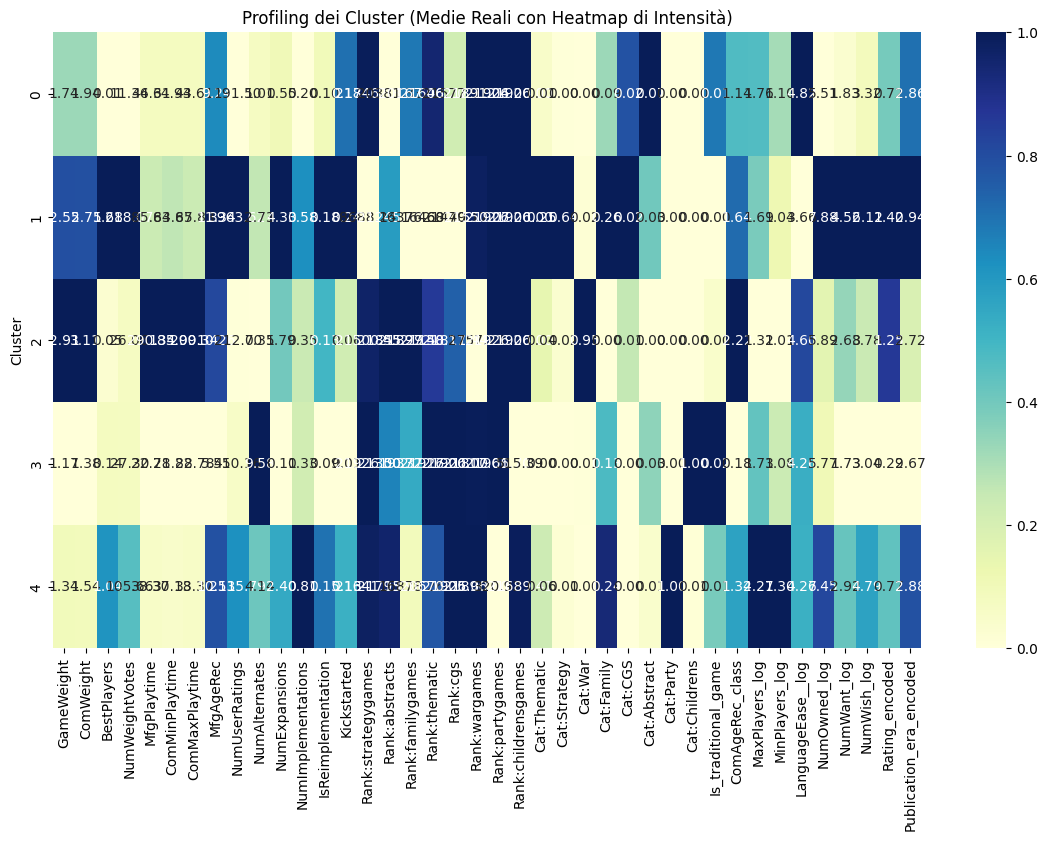

In [314]:
def profile_clusters(df_original, cluster_labels):
    """
    Analyze and visualize the average characteristics of every cluster
    """
    # We create a temporary dataset with the original data and clusters' etiquettes
    df_profile = df_original.copy()
    df_profile['Cluster'] = cluster_labels

    # We calculate the average of every feature for every cluster, ignoring not-numerical columns
    cluster_means = df_profile.groupby('Cluster').mean(numeric_only=True)

    # We add the dimension of every cluster (how many elements it contains)
    cluster_sizes = df_profile.groupby('Cluster').size().to_frame(name='Size')
    profile_summary = cluster_sizes.join(cluster_means)

    print("=== Riepilogating averages for clusters ===")
    print(profile_summary)

    # Visualization through heatmap (normalized values for visual comparison) using normalization min-max only for the heatmap to see the patterns
    plt.figure(figsize=(14, 8))
    sns.heatmap(cluster_means.apply(lambda x: (x-x.min())/(x.max()-x.min())),
                annot=cluster_means,
                fmt=".2f",
                cmap="YlGnBu")
    plt.title("Profiling dei Cluster (Medie Reali con Heatmap di Intensità)")
    plt.show()

    return profile_summary

# Execution
cluster_summary = profile_clusters(df, clustering_data['Cluster'])

## Feature Drill-Down: Vertical Comparison

### Function: `plot_cluster_feature_comparison`

This visualization tool allows for a detailed comparison of a specific feature across all identified clusters against the global average.

### Visual Components
* **Bars (Height):** represent the **mean value** of the feature for that specific cluster.
* **Red dashed line:** represents the **global mean** of the entire dataset.
    * *Above line:* the cluster characterizes itself by having *more* of this trait than usual.
    * *Below line:* the cluster characterizes itself by having *less* of this trait than usual.
* **Black Error Bars (Whiskers):** Represent the **Standard Deviation**.
    * *Short bar:* high consistency. The games in this cluster are very similar regarding this feature.
    * *Long bar:* high variability. The cluster contains a mix of values.

### Usage Tip
Use this function to validate your cluster definitions. For example, check `GameWeight` to confirm which cluster is truly the "Hardcore" group, or `YearPublished` to find the "Modern/Vintage" distinction.

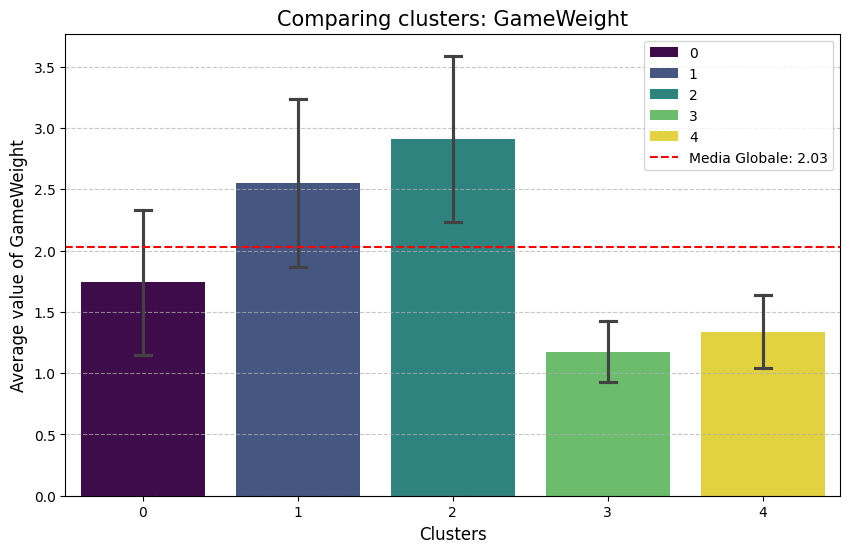

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_feature_comparison(df_original, cluster_labels, feature_name):
    """
    Create a bar chart to compare a specific feature between the clusters.
    """
    # Data preparation
    df_temp = df_original.copy()
    df_temp['Cluster'] = cluster_labels

    plt.figure(figsize=(10, 6))

    # Bar chart with confidence interval (it shows the data leakage)
    sns.barplot(x='Cluster', y=feature_name, data=df_temp, hue=cluster_labels,
                palette='viridis', capsize=.1, errorbar='sd')

    # Calculating the global average by i media globale per confronto
    global_mean = df_temp[feature_name].mean()
    plt.axhline(global_mean, color='red', linestyle='--', label=f'Media Globale: {global_mean:.2f}')

    plt.title(f'Comparing clusters: {feature_name}', fontsize=15)
    plt.xlabel('Clusters', fontsize=12)
    plt.ylabel(f'Average value of {feature_name}', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

# Use example
feature_da_analizzare = feature_names[0]
plot_cluster_feature_comparison(df, clustering_data['Cluster'], feature_da_analizzare)

## The "big 4" analysis: automated inspection

### Batch processing of key variables
To accelerate the interpretation, execute the automatic cycle on the four variables that define historically the table games market.

### What to search in the resulting graphs:

1.  **GameWeight (complexity):**
    * Search the cluster with the highest bar (> 3.0): here we can find the  games for experts ("Hardcore").
    * Search the cluster with the lower bar (< 1.5): they are mainly party games or games for children.

2.  **NumOwned (popularity):**
    * Often a single cluster emerges with a very high bar compared to the others. This is the **"Blockbuster"** cluster (games that everyone own at home, like Catan or Ticket to Ride).
    * Clusters with further invisible bars are niches or commercial failures.

3.  **MfgPlaytime (time):**
    * The highest bars (e.g. > 120 min), points the war or civilization games.
    * With a huge standard deviation (black line), the cluster take together games of 60 minutes with games of 6 hours (so it's less accurate).

4.  **Is_traditional_game (elderness):**
    * Looking at the red dashed line (global average), we can observe that:
    * the clusters *under* the red line are **"vintage"** o classical ones.
    * the clusters *over* the line are the **"modern"** games.

=== Analisi Verticale delle Feature Chiave ===


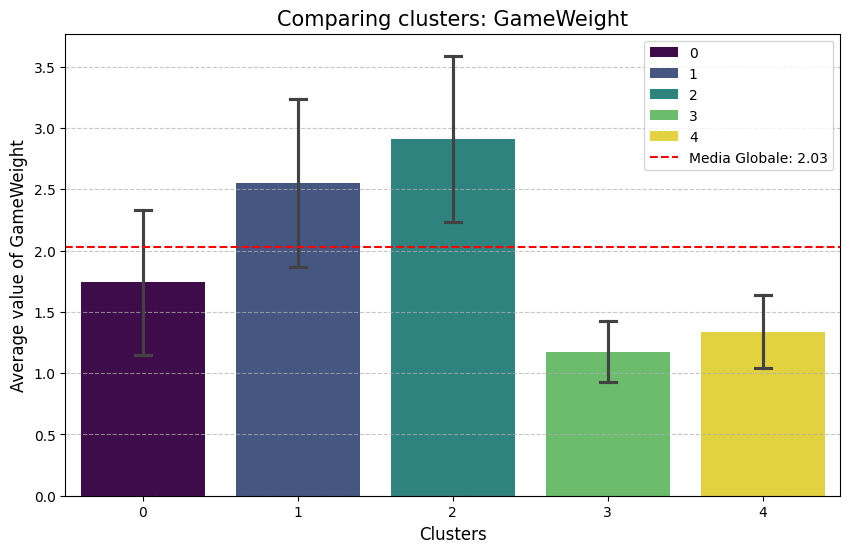

⚠️ Attention: the feature 'NumOwned' is not available in the original dataframe.


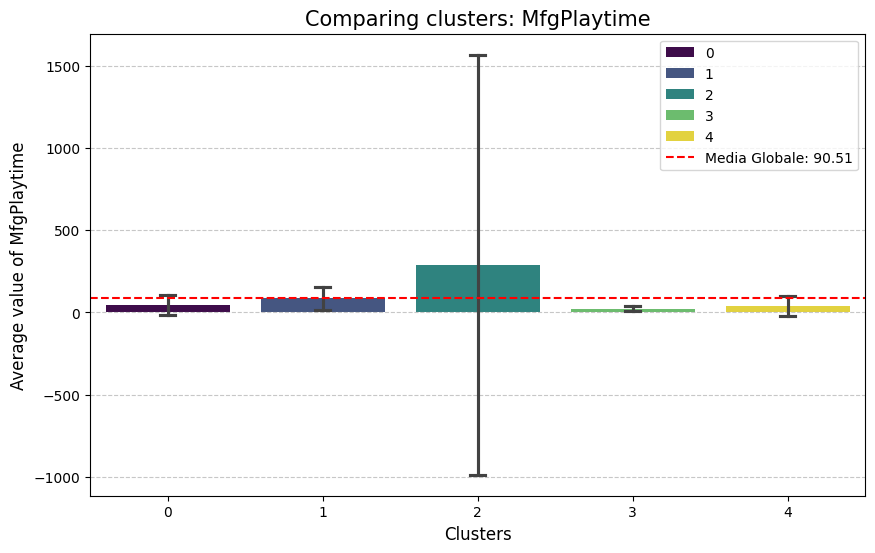

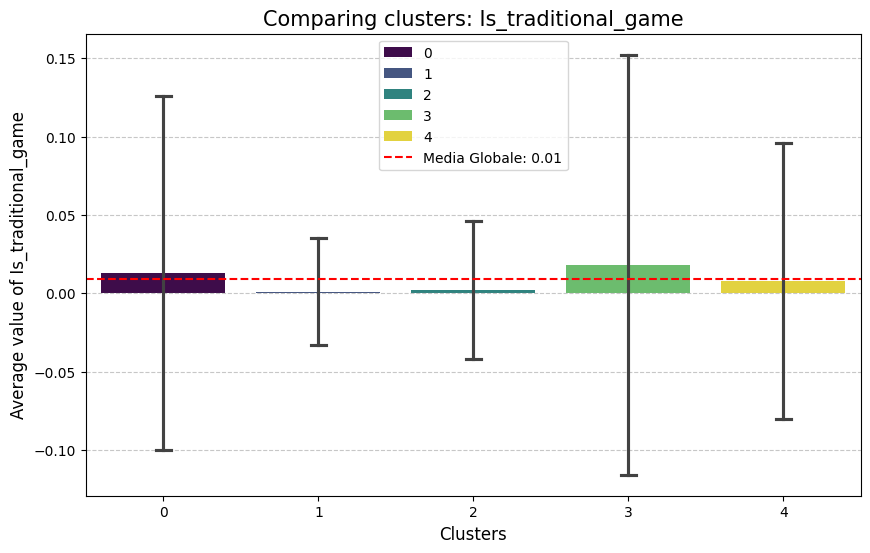

In [316]:
# List of key features to inspect
key_features = ['GameWeight', 'NumOwned', 'MfgPlaytime', 'Is_traditional_game']

print("=== Analisi Verticale delle Feature Chiave ===")
for feature in key_features:
    # We provide a security check, verifying that the column exists
    if feature in df.columns:
        plot_cluster_feature_comparison(df, clustering_data['Cluster'], feature)
    else:
        print(f"⚠️ Attention: the feature '{feature}' is not available in the original dataframe.")

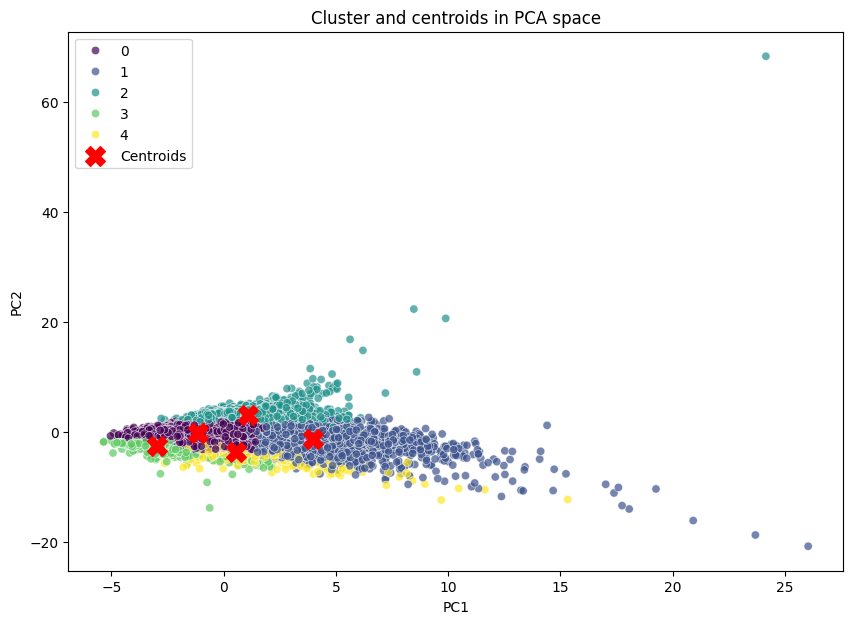

In [317]:
def plot_clusters_with_centroids(data, centroids, pc1='PC1', pc2='PC2'):
    """
    Visualize the clusters and related centroids in the PCA space.
    Parameters:
    - data: DataFrame containing PC1, PC2 and the column 'Cluster'
    - centroids: centroids' arrays returned by KMeans (cluster_centers_)
    - pc1: name of column of 1st PCA
    - pc2: name of column of 2nd PCA della seconda componente principale
    """

    plt.figure(figsize=(10, 7))

    # Scatter plot of the points
    sns.scatterplot(
        x=pc1,
        y=pc2,
        hue='Cluster',
        data=data,
        palette='viridis',
        alpha=0.7
    )

    # Plot of centroids
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker='X',
        s=200,
        c='red',
        label='Centroids'
    )

    plt.title('Cluster and centroids in PCA space')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.legend()
    plt.show()

# Example
plot_clusters_with_centroids(
    data=clustering_data,
    centroids=kmeans_final.cluster_centers_
)

### SSE Analysis

For every game, the error is the euclidean distance from the centroid in the cluster it was assigned. The Sum Squared Error (SSE) is the sum of the distances between games for every game in every cluster.

distance = sqrt((PC1_gioco - PC1_centroide)² + (PC2_gioco - PC2_centroide)² + ... + (PC14_gioco - PC14_centroide)²)

SSE = Σ(distanza²)

In [318]:
def calculate_sse_for_multiple_k(X_pca, k_range=range(2, 11)):
    """
    Calculate SSE for multiple K values
    """
    sse_values = []
    kmeans_models = []

    print("=== SSE Analysis ===")
    print(f"{'K':<3} {'SSE':>15} {'Improvement':>15}")
    print("-" * 35)

    for k in k_range:
        # K-Means with K clusters
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X_pca)

        sse = kmeans.inertia_
        sse_values.append(sse)
        kmeans_models.append(kmeans)

        # Calcus improvement compared with K-1
        if len(sse_values) > 1:
            improvement = ((sse_values[-2] - sse) / sse_values[-2]) * 100
            print(f"{k:<3} {sse:>15.2f} {improvement:>15.1f}%")
        else:
            print(f"{k:<3} {sse:>15.2f} {'-':>15}")

    return sse_values, kmeans_models

# Analysis execution
sse_values, kmeans_models = calculate_sse_for_multiple_k(X_pca_final, range(2, 11))

=== SSE Analysis ===
K               SSE     Improvement
-----------------------------------
2         614982.47               -
3         551963.82            10.2%
4         506394.75             8.3%
5         460166.81             9.1%
6         422228.23             8.2%
7         380475.55             9.9%
8         343151.11             9.8%
9         295762.74            13.8%
10        264528.89            10.6%


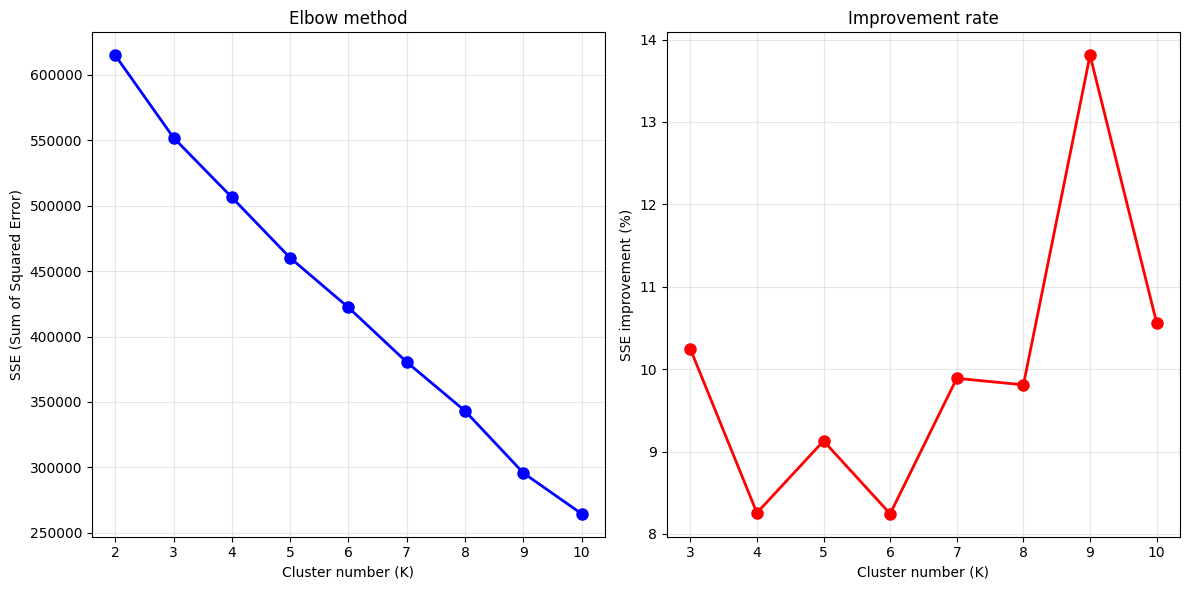

In [319]:
def plot_sse_analysis(sse_values, k_range):
    """
    Show the SSE analysis by plot
    """
    plt.figure(figsize=(12, 6))

    # SSE plot
    plt.subplot(1, 2, 1)
    plt.plot(k_range, sse_values, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Cluster number (K)')
    plt.ylabel('SSE (Sum of Squared Error)')
    plt.title('Elbow method')
    plt.grid(True, alpha=0.3)

    # Rate of improvement plot
    plt.subplot(1, 2, 2)
    improvements = []
    for i in range(1, len(sse_values)):
        improvement = ((sse_values[i-1] - sse_values[i]) / sse_values[i-1]) * 100
        improvements.append(improvement)

    plt.plot(k_range[1:], improvements, 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Cluster number (K)')
    plt.ylabel('SSE improvement (%)')
    plt.title('Improvement rate')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Execution
plot_sse_analysis(sse_values, range(2, 11))

We can also provide a detailed analysis for the application of KMeans with k equal to 5.

In [320]:
# Detailed analysis for K=5 (our actual case)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_5.fit(X_pca_final)
sse_5 = kmeans_5.inertia_

print(f"Total SSE for K=5: {sse_5:.2f}")
print(f"Medium SSE by game: {sse_5/len(X_pca_final):.4f}")

# Comparison with the other K values
print("\nSSE comparison:")
for k, sse in zip([3, 4, 5, 6, 7], sse_values[:5]):
    print(f"K={k}: SSE={sse:.2f}")

Total SSE for K=5: 460166.81
Medium SSE by game: 20.9882

SSE comparison:
K=3: SSE=614982.47
K=4: SSE=551963.82
K=5: SSE=506394.75
K=6: SSE=460166.81
K=7: SSE=422228.23


**Interpretation**
1. Low SSE = Compact clusters
Games very similar to each other within clusters. For example a cluster with complex strategy games will have low SSE if they all have similar PC1 (popularity) and PC2 (complexity).
2. High SSE = Dispersed Clusters
Very different games in the same cluster. For example a "mixed" cluster with popular and niche games will have high SSE.

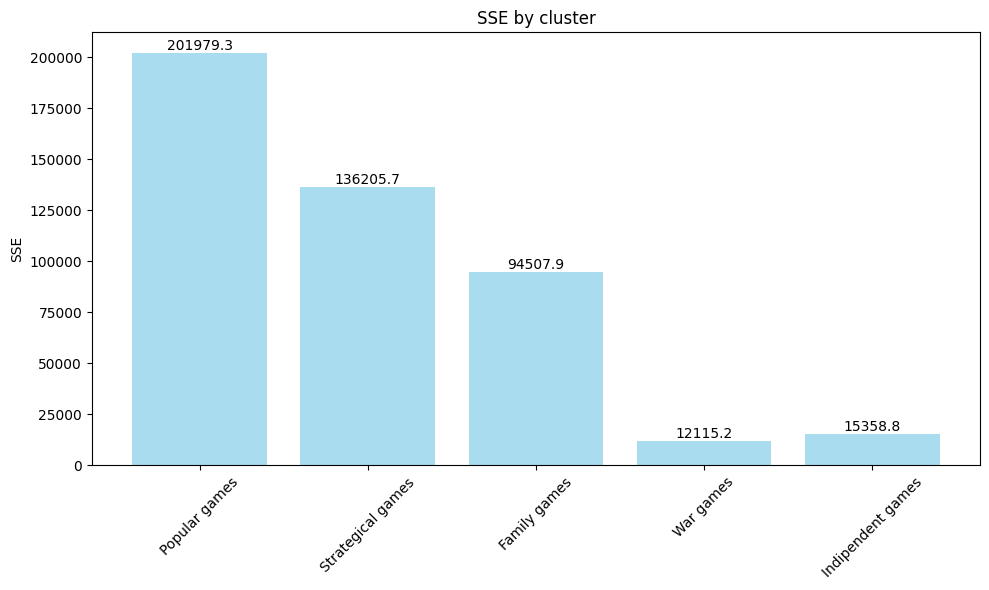

In [321]:
def analyze_cluster_sse(X_pca, labels, cluster_names):
    """
    Analyse SSE for every defined cluster
    """
    sse_by_cluster = {}

    for cluster_id in set(labels):
        # Extract points from cluster
        cluster_points = X_pca[labels == cluster_id]
        centroid = kmeans_final.cluster_centers_[cluster_id]

        # Calculate SSE for this cluster
        cluster_sse = 0
        for point in cluster_points:
            distance = np.linalg.norm(point - centroid)
            cluster_sse += distance**2

        sse_by_cluster[cluster_names.get(cluster_id, f'Cluster {cluster_id}')] = cluster_sse

    # Visualize SSE by cluster
    plt.figure(figsize=(10, 6))
    clusters = list(sse_by_cluster.keys())
    sse_values = list(sse_by_cluster.values())

    bars = plt.bar(clusters, sse_values, color='skyblue', alpha=0.7)
    plt.title('SSE by cluster')
    plt.ylabel('SSE')
    plt.xticks(rotation=45)

    # Add values to the bars
    for bar, sse in zip(bars, sse_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{sse:.1f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return sse_by_cluster

# Descriptive names for clusters
cluster_names = {
    0: "Popular games",
    1: "Strategical games",
    2: "Family games",
    3: "War games",
    4: "Indipendent games"
}

# SSE analysis by cluster
sse_by_cluster = analyze_cluster_sse(X_pca_final, cluster_labels, cluster_names)

#### Comparing SSE and Silhouette Score

In [322]:
def compare_sse_silhouette(X_pca, k_range=range(2, 11)):
    """
    Compare SSE and Silhouette Score metrics
    """
    sse_values = []
    silhouette_scores = []

    print("=== Comparison of SSE and Silhouette Score ===")
    print(f"{'K':<3} {'SSE':>12} {'Silhouette':>12} {'Ratio':>10}")
    print("-" * 40)

    for k in k_range:
        # K-Means
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(X_pca)

        sse = kmeans.inertia_
        silhouette = silhouette_score(X_pca, labels)

        # Ratio SSE/Silhouette (the lower the better)
        ratio = sse / silhouette if silhouette > 0 else float('inf')

        sse_values.append(sse)
        silhouette_scores.append(silhouette)

        print(f"{k:<3} {sse:>12.2f} {silhouette:>12.4f} {ratio:>10.2f}")

    return sse_values, silhouette_scores

# Comparing metrics
sse_values, silhouette_scores = compare_sse_silhouette(X_pca_final)

=== Comparison of SSE and Silhouette Score ===
K            SSE   Silhouette      Ratio
----------------------------------------
2      614982.47       0.2152 2857977.32
3      551963.82       0.2262 2439868.43
4      506394.75       0.2553 1983350.21
5      460166.81       0.2917 1577748.01
6      422228.23       0.2905 1453290.59
7      380475.55       0.3093 1230255.48
8      343151.11       0.3332 1029893.21
9      295762.74       0.3679  803867.89
10     264528.89       0.3948  670048.27


=== Overfitting analysis based on SSE ===
No overfitting revealed until K=10


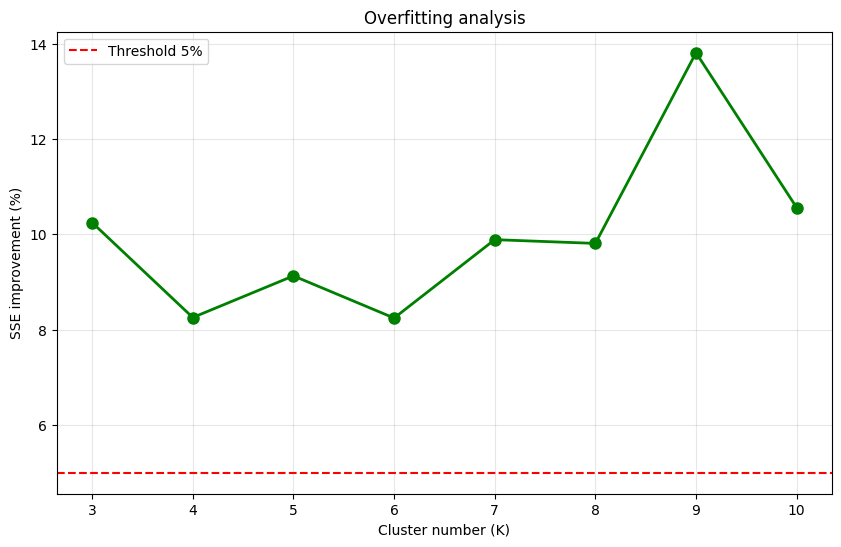

In [323]:
def analyze_sse_overfitting(sse_values, k_range):
    """
    Analyse the overfitting risk according to SSE evolution
    """
    improvements = []
    for i in range(1, len(sse_values)):
        improvement = ((sse_values[i-1] - sse_values[i]) / sse_values[i-1]) * 100
        improvements.append(improvement)

    print("=== Overfitting analysis based on SSE ===")

    # Identification of the "diminishing returns" point
    threshold = 5  # Improvement threshold (%)
    optimal_k = None

    for i, improvement in enumerate(improvements):
        if improvement < threshold:
            optimal_k = k_range[i] + 1  # +1 because we start from k=2
            print(f"K={optimal_k}: Improvement < {threshold}% - Risk of overfitting")
            break

    if optimal_k is None:
        optimal_k = k_range[-1]
        print(f"No overfitting revealed until K={k_range[-1]}")

    # Improvement plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range[1:], improvements, 'go-', linewidth=2, markersize=8)
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold {threshold}%')
    plt.xlabel('Cluster number (K)')
    plt.ylabel('SSE improvement (%)')
    plt.title('Overfitting analysis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return optimal_k

# Analysis of overfitting
optimal_k = analyze_sse_overfitting(sse_values, range(2, 11))


##### Resuming result analysis

In [324]:
def evaluate_current_clustering(X_pca, labels, kmeans_model):
    """
    Complete evaluation of the actual applied clusterization
    """
    # Total SSE
    total_sse = kmeans_model.inertia_

    # SSE by cluster
    sse_by_cluster = {}
    for cluster_id in set(labels):
        cluster_points = X_pca[labels == cluster_id]
        centroid = kmeans_model.cluster_centers_[cluster_id]
        cluster_sse = sum([np.linalg.norm(point - centroid)**2 for point in cluster_points])
        sse_by_cluster[cluster_id] = cluster_sse

    # Calculating the metrics previously found
    silhouette = silhouette_score(X_pca, labels)

    print("=== Actual clusterization's evaluation (K=5) ===")
    print(f"Total SSE: {total_sse:.2f}")
    print(f"Average SSE by game: {total_sse/len(X_pca):.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print("\nSSE by Cluster:")
    for cluster_id, sse in sse_by_cluster.items():
        print(f"  Cluster {cluster_id}: {sse:.2f}")

    return total_sse, sse_by_cluster, silhouette

# Evaluting actual results
total_sse, sse_per_cluster, silhouette = evaluate_current_clustering(
    X_pca_final, cluster_labels, kmeans_final
)

=== Actual clusterization's evaluation (K=5) ===
Total SSE: 460166.81
Average SSE by game: 20.9882
Silhouette Score: 0.2917

SSE by Cluster:
  Cluster 0: 201979.27
  Cluster 1: 136205.69
  Cluster 2: 94507.92
  Cluster 3: 12115.16
  Cluster 4: 15358.77


#### Comparing K-Means and DBScan

In [325]:
def compare_kmeans_dbscan(X_pca, sse_kmeans):
    """
    Comparing K-Means with DBScan according to SSE
    """
    from sklearn.cluster import DBSCAN

    print("=== Comparison of K-Means and DBScan ===")
    print(f"K-Means (K=5): SSE = {sse_kmeans:.2f}")

    # DBScan con diversi parametri
    eps_values = [0.5, 1.0, 1.5, 2.0]
    min_samples_values = [5, 10, 15]

    best_dbscan_sse = float('inf')
    best_params = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_pca)

            # Calculating SSE only for not-noise points
            if len(set(labels)) > 1:  # At least 2 cluster
                core_points_mask = labels != -1
                if core_points_mask.sum() > 0:
                    # Calculating centroids for clusters
                    unique_labels = set(labels[core_points_mask])
                    cluster_centroids = {}

                    for label in unique_labels:
                        cluster_points = X_pca[core_points_mask][labels[core_points_mask] == label]
                        cluster_centroids[label] = cluster_points.mean(axis=0)

                    # Calculating SSE
                    dbscan_sse = 0
                    for i, (point, label) in enumerate(zip(X_pca[core_points_mask], labels[core_points_mask])):
                        if label in cluster_centroids:
                            dbscan_sse += np.linalg.norm(point - cluster_centroids[label])**2

                    print(f"DBSCAN (eps={eps}, min_samples={min_samples}): SSE = {dbscan_sse:.2f}")

                    if dbscan_sse < best_dbscan_sse:
                        best_dbscan_sse = dbscan_sse
                        best_params = (eps, min_samples)

    if best_params:
        eps, min_samples = best_params
        improvement = ((sse_kmeans - best_dbscan_sse) / sse_kmeans) * 100
        print(f"\nThe better technique is DBSCAN: eps={eps}, min_samples={min_samples}")
        print(f"SSE: {best_dbscan_sse:.2f}")
        print(f"Improvement vs K-Means: {improvement:.1f}%")

        if improvement > 10:
            print("✓ DBSCAN offers significatively better results")
        else:
            print("✓ K-Means remains the better choice")

    return best_dbscan_sse, best_params

# Execution
best_dbscan_sse, best_params = compare_kmeans_dbscan(X_pca_final, total_sse)

=== Comparison of K-Means and DBScan ===
K-Means (K=5): SSE = 460166.81
DBSCAN (eps=0.5, min_samples=5): SSE = 23774.71
DBSCAN (eps=0.5, min_samples=10): SSE = 17168.06
DBSCAN (eps=0.5, min_samples=15): SSE = 12361.24
DBSCAN (eps=1.0, min_samples=5): SSE = 79003.81
DBSCAN (eps=1.0, min_samples=10): SSE = 72518.68
DBSCAN (eps=1.0, min_samples=15): SSE = 66515.04
DBSCAN (eps=1.5, min_samples=5): SSE = 123708.85
DBSCAN (eps=1.5, min_samples=10): SSE = 115968.06
DBSCAN (eps=1.5, min_samples=15): SSE = 111838.38
DBSCAN (eps=2.0, min_samples=5): SSE = 198037.73
DBSCAN (eps=2.0, min_samples=10): SSE = 192426.24
DBSCAN (eps=2.0, min_samples=15): SSE = 188932.22

The better technique is DBSCAN: eps=0.5, min_samples=15
SSE: 12361.24
Improvement vs K-Means: 97.3%
✓ DBSCAN offers significatively better results


We can then provide recommentation of how to proceed according to SSE analysis

In [326]:
# Raccomandazioni basate sui risultati SSE
def provide_sse_recommendations(sse_values, k_range, current_k=5):
    """
    Provide recommandations according to SSE analysis
    """
    print("=== Essential recommendations on SSE ===")

    # Finding the best K by improvement rate
    improvements = []
    for i in range(1, len(sse_values)):
        improvement = ((sse_values[i-1] - sse_values[i]) / sse_values[i-1]) * 100
        improvements.append(improvement)

    # Identifying the "el"
    optimal_k = current_k
    for i, improvement in enumerate(improvements):
        if improvement < 10:  # Soglia del 10%
            optimal_k = k_range[i] + 1
            break

    print(f"Actual K: {current_k}")
    print(f"Optimal K according to SSE: {optimal_k}")

    if optimal_k != current_k:
        print(f"✗ Consider to reduce to K={optimal_k} to improve results")
    else:
        print("✓ K={current_k} is already optimal according to SSE")

    # Complexity analysis
    complexity_reduction = ((len(X_scaled.columns) - optimal_k) / len(X_scaled.columns)) * 100
    print(f"\nComplexity reduction: {complexity_reduction:.1f}%")

    return optimal_k

# Final recommendations
optimal_k = provide_sse_recommendations(sse_values, range(2, 11), current_k=5)

=== Essential recommendations on SSE ===
Actual K: 5
Optimal K according to SSE: 4
✗ Consider to reduce to K=4 to improve results

Complexity reduction: 90.0%


## Hierarchical clustering

### Agglomerative clustering standard

In [327]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def perform_agglomerative_clustering(X_pca, n_clusters=5, linkage_method='ward'):
    """
    Applying agglomerative clustering
    """
    print(f"=== Agglomerative Clustering with linkage '{linkage_method}' ===")

    # Clustering application
    agglo = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage_method ## Ho messo questo metodo
    )

    labels = agglo.fit_predict(X_pca)

    # Calculating metrics
    from sklearn.metrics import silhouette_score
    silhouette = silhouette_score(X_pca, labels)

    print(f"Clusters' number: {n_clusters}")
    print(f"Silhouette score: {silhouette:.4f}")

    # Cluster distribution
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("Cluster distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"  Cluster {label}: {count} games")

    return labels, silhouette

# Testing with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
results = {}

for method in linkage_methods:
    labels, silhouette = perform_agglomerative_clustering(X_pca_final, n_clusters=5, linkage_method=method)
    results[method] = {'labels': labels, 'silhouette': silhouette}

=== Agglomerative Clustering with linkage 'ward' ===
Clusters' number: 5
Silhouette score: 0.2727
Cluster distribution:
  Cluster 0: 12581 games
  Cluster 1: 4643 games
  Cluster 2: 3216 games
  Cluster 3: 633 games
  Cluster 4: 852 games
=== Agglomerative Clustering with linkage 'complete' ===
Clusters' number: 5
Silhouette score: 0.7676
Cluster distribution:
  Cluster 0: 15 games
  Cluster 1: 21900 games
  Cluster 2: 6 games
  Cluster 3: 1 games
  Cluster 4: 3 games
=== Agglomerative Clustering with linkage 'average' ===
Clusters' number: 5
Silhouette score: 0.7890
Cluster distribution:
  Cluster 0: 21913 games
  Cluster 1: 3 games
  Cluster 2: 2 games
  Cluster 3: 1 games
  Cluster 4: 6 games
=== Agglomerative Clustering with linkage 'single' ===
Clusters' number: 5
Silhouette score: 0.7732
Cluster distribution:
  Cluster 0: 21920 games
  Cluster 1: 2 games
  Cluster 2: 1 games
  Cluster 3: 1 games
  Cluster 4: 1 games


### Comparing metrics

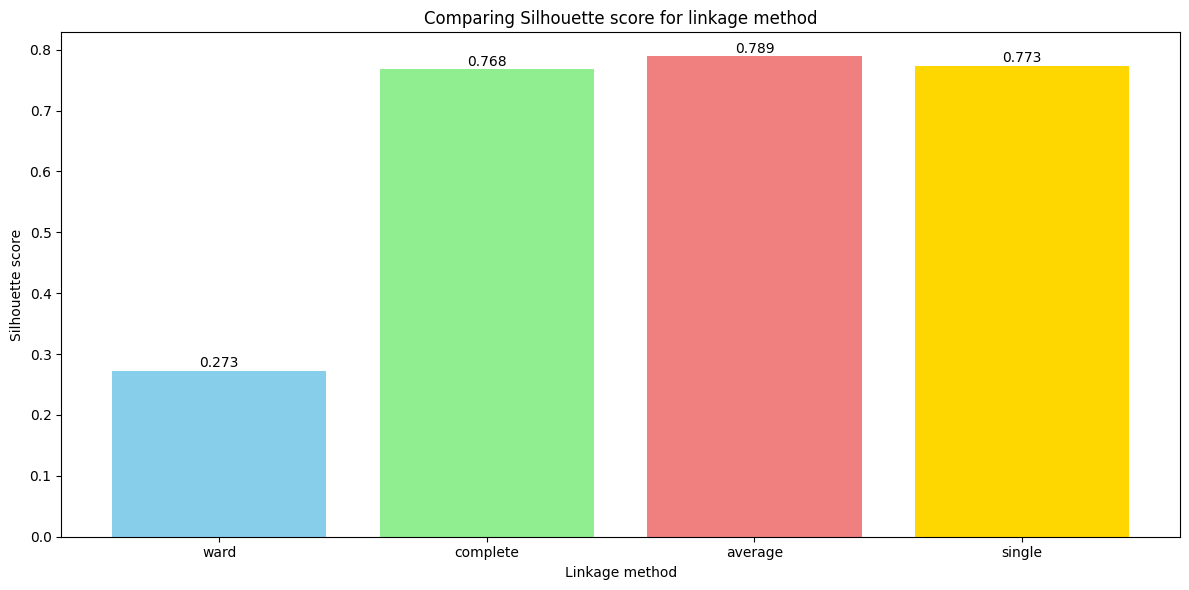

Best linkage method: average (Silhouette: 0.7890)


In [328]:
def compare_linkage_methods(results):
    """
    Compare different linkage methods for hierarchical clustering
    """
    plt.figure(figsize=(12, 6))

    methods = list(results.keys())
    silhouette_scores = [results[method]['silhouette'] for method in methods]

    bars = plt.bar(methods, silhouette_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.title('Comparing Silhouette score for linkage method')
    plt.ylabel('Silhouette score')
    plt.xlabel('Linkage method')

    # Adding values on bars
    for bar, score in zip(bars, silhouette_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{score:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Identifying the best method
    best_method = max(results.keys(), key=lambda x: results[x]['silhouette'])
    print(f"Best linkage method: {best_method} (Silhouette: {results[best_method]['silhouette']:.4f})")

    return best_method

# Comparing methods
best_linkage = compare_linkage_methods(results)